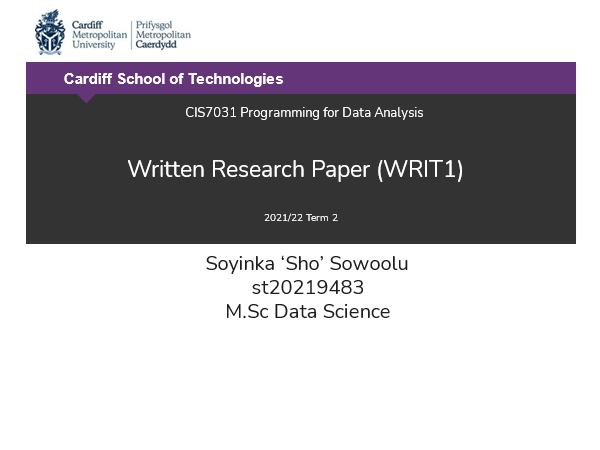




# Task 1
## 1. Analytical Question

### 1.1 Data
The dataset to be analysed contains data about World Energy Consumption from 1900 to 2019. "The energy transition is a pathway toward transformation of the global energy sector from fossil-based to zero-carbon by the second half of this century. At its heart is the need to reduce energy-related CO2 emissions to limit climate change" (International Renewable Energy Agency, ud)

The link to the dataset:
https://www.kaggle.com/pralabhpoudel/world-energy-consumption


### 1.2 Problem Question
> Is energy transition really taking place or new cleaner energy sources just being added to a similarly growing fossil fuel sources in the world energy mix?

> Can a reliable energy mix prediction model be derived from this data?

If it is possible to predict future trajectory of the energy mix then it can be influenced with governement and global policies if predicted outcomes are not looking desirable

### 1.3 Evaluation
This will basically be a problem to predict a future value which finds application with Regression. We will be using regression evaluation metrics like MSE, MAE and R-Squared to evaluate the performance of our model(s)


# Task 2

## 2. Exploratory Data Analysis

### 2.1 Import the python libraries required 

In [1]:
# Pandas, Numpy, Matplotlib and Seaborn libraries already installed in Anaconda package so we will just be importing these

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.patches as mpatches

### 2.2 Import the dataset into the IDE

The dataset to be analysed is saved in the same directory as the jupyter notebook containing the python code, so it can be called directly without the full path

In [2]:
# Import Dataset into the notebook as a pandas dataframe

df=pd.read_csv('World Energy Consumption.csv')

### 2.3 Exploratory Data Analysis
#### 2.3.1 Non-graphical Exploration

> inspect the dataset 

In [8]:
# inspect the top 10 rows of the dataframe

df.head()

iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
0      AFG  Afghanistan  1900                   NaN                   NaN   
1      AFG  Afghanistan  1901                   NaN                   0.0   
2      AFG  Afghanistan  1902                   NaN                   0.0   
3      AFG  Afghanistan  1903                   NaN                   0.0   
4      AFG  Afghanistan  1904                   NaN                   0.0   

   gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   oil_prod_change_twh  energy_cons_change_pct  ...  solar_elec_per_capita  \
0                  NaN                     NaN  ...                    NaN   
1                  NaN                     NaN  ...                    NaN   
2                  NaN                     NaN  ...                    NaN   
3                  NaN                     NaN  ...                    NaN   
4                  NaN                     NaN  ...                    NaN   

   solar_energy_per_capita  gdp  wind_share_elec  wind_cons_change_pct  \
0                      NaN  NaN              NaN                   NaN   
1                      NaN  NaN              NaN                   NaN   
2                      NaN  NaN              NaN                   NaN   
3                      NaN  NaN              NaN                   NaN   
4                      NaN  NaN              NaN                   NaN   

   wind_share_energy  wind_cons_change_twh  wind_consumption  \
0                NaN                   NaN               NaN   
1                NaN                   NaN               NaN   
2                NaN                   NaN               NaN   
3                NaN                   NaN               NaN   
4                NaN                   NaN               NaN   

   wind_elec_per_capita  wind_energy_per_capita  
0                   NaN                     NaN  
1                   NaN                     NaN  
2                   NaN                     NaN  
3                   NaN                     NaN  
4                   NaN                     NaN  

[5 rows x 122 columns]

In [9]:
#inspect the bottom 5 rows of the dataframe

df.tail()

iso_code   country  year  coal_prod_change_pct  coal_prod_change_twh  \
17427      ZWE  Zimbabwe  2015               -25.013               -10.847   
17428      ZWE  Zimbabwe  2016               -37.694               -12.257   
17429      ZWE  Zimbabwe  2017                 8.375                 1.697   
17430      ZWE  Zimbabwe  2018                22.555                 4.952   
17431      ZWE  Zimbabwe  2019               -35.015                -9.422   

       gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
17427                  NaN                  NaN                  NaN   
17428                  NaN                  NaN                  NaN   
17429                  NaN                  NaN                  NaN   
17430                  NaN                  NaN                  NaN   
17431                  NaN                  NaN                  NaN   

       oil_prod_change_twh  energy_cons_change_pct  ...  \
17427                  NaN                  -0.789  ...   
17428                  NaN                 -14.633  ...   
17429                  NaN                     NaN  ...   
17430                  NaN                     NaN  ...   
17431                  NaN                     NaN  ...   

       solar_elec_per_capita  solar_energy_per_capita           gdp  \
17427                  0.579                      NaN  2.503057e+10   
17428                  0.641                      NaN  2.515176e+10   
17429                  0.773                      NaN           NaN   
17430                  0.970                      NaN           NaN   
17431                  0.956                      NaN           NaN   

       wind_share_elec  wind_cons_change_pct  wind_share_energy  \
17427              0.0                   NaN                NaN   
17428              0.0                   NaN                NaN   
17429              0.0                   NaN                NaN   
17430              0.0                   NaN                NaN   
17431              0.0                   NaN                NaN   

       wind_cons_change_twh  wind_consumption  wind_elec_per_capita  \
17427                   NaN               NaN                   0.0   
17428                   NaN               NaN                   0.0   
17429                   NaN               NaN                   0.0   
17430                   NaN               NaN                   0.0   
17431                   NaN               NaN                   0.0   

       wind_energy_per_capita  
17427                     NaN  
17428                     NaN  
17429                     NaN  
17430                     NaN  
17431                     NaN  

[5 rows x 122 columns]

*This confirms that our dataset year ranges from* **1900 to 2019**. Countries list starts alpahabetically from **Aghanistan to Zimbabwe**

>The objective of this analysis is about energy transition and the current drive to transition from fossil fuels to renewable and clean energy .While historical transitions between major energy sources have occurred, most of these shifts lasted over a century or longer and were stimulated by resource scarcity, high labor costs,and discovery of new technologies. The energy transition of the 21st century is driven by damage to the climate and environment by fossil fuels and will need to be more rapid ( Barry Solomon et al 2011). 

**With the above in mind we will be starting with a review of the last 5 years of the dataset for exploration**

The data of interest should be from 2015 -2019

In [3]:
# Reduce the dataset to the last 5 years 

int_years=[2015,2016,2017,2018,2019]
df =df[df['year'].isin(int_years)]
df 

iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
115        AFG  Afghanistan  2015               -10.043                -0.885   
116        AFG  Afghanistan  2016                24.396                 1.933   
117        AFG  Afghanistan  2017                   NaN                   NaN   
118        AFG  Afghanistan  2018                   NaN                   NaN   
119        AFG  Afghanistan  2019                   NaN                   NaN   
...        ...          ...   ...                   ...                   ...   
17427      ZWE     Zimbabwe  2015               -25.013               -10.847   
17428      ZWE     Zimbabwe  2016               -37.694               -12.257   
17429      ZWE     Zimbabwe  2017                 8.375                 1.697   
17430      ZWE     Zimbabwe  2018                22.555                 4.952   
17431      ZWE     Zimbabwe  2019               -35.015                -9.422   

       gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
115                    NaN                  NaN                  NaN   
116                    NaN                  NaN                  NaN   
117                    NaN                  NaN                  NaN   
118                    NaN                  NaN                  NaN   
119                    NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
17427                  NaN                  NaN                  NaN   
17428                  NaN                  NaN                  NaN   
17429                  NaN                  NaN                  NaN   
17430                  NaN                  NaN                  NaN   
17431                  NaN                  NaN                  NaN   

       oil_prod_change_twh  energy_cons_change_pct  ...  \
115                    NaN                  10.917  ...   
116                    NaN                   8.567  ...   
117                    NaN                     NaN  ...   
118                    NaN                     NaN  ...   
119                    NaN                     NaN  ...   
...                    ...                     ...  ...   
17427                  NaN                  -0.789  ...   
17428                  NaN                 -14.633  ...   
17429                  NaN                     NaN  ...   
17430                  NaN                     NaN  ...   
17431                  NaN                     NaN  ...   

       solar_elec_per_capita  solar_energy_per_capita           gdp  \
115                    0.959                      NaN  6.278339e+10   
116                    0.989                      NaN  6.429743e+10   
117                    1.047                      NaN           NaN   
118                    0.995                      NaN           NaN   
119                    1.051                      NaN           NaN   
...                      ...                      ...           ...   
17427                  0.579                      NaN  2.503057e+10   
17428                  0.641                      NaN  2.515176e+10   
17429                  0.773                      NaN           NaN   
17430                  0.970                      NaN           NaN   
17431                  0.956                      NaN           NaN   

       wind_share_elec  wind_cons_change_pct  wind_share_energy  \
115                0.0                   NaN                NaN   
116                0.0                   NaN                NaN   
117                0.0                   NaN                NaN   
118                0.0                   NaN                NaN   
119                0.0                   NaN                NaN   
...                ...                   ...                ...   
17427              0.0                   NaN                NaN   
17428              0.0                   NaN                NaN   
174

>We would check for the general information of the dataset -number of rows, columns, data types etc.

In [11]:
# Check the general information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 115 to 17431
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 1.1+ MB


>We do not have categorical data with the only object type data being **country code (iso_code)** and **country name (country)**. 

>**Date(year)** is presented as an **integer** while it should be a **categorical data (datetime)**.

>The other numerical data type are floats (continous data).

>**With the large number of columns (data points) there is need to check these features to determine which will be of importance to our task**

In [4]:
#display a list of all columns

pd.set_option('display.max_rows', 122)
df.iloc[:0,3:].T

Empty DataFrame
Columns: []
Index: [coal_prod_change_pct, coal_prod_change_twh, gas_prod_change_pct, gas_prod_change_twh, oil_prod_change_pct, oil_prod_change_twh, energy_cons_change_pct, energy_cons_change_twh, biofuel_share_elec, biofuel_elec_per_capita, biofuel_cons_change_pct, biofuel_share_energy, biofuel_cons_change_twh, biofuel_consumption, biofuel_cons_per_capita, carbon_intensity_elec, coal_share_elec, coal_cons_change_pct, coal_share_energy, coal_cons_change_twh, coal_consumption, coal_elec_per_capita, coal_cons_per_capita, coal_production, coal_prod_per_capita, electricity_generation, biofuel_electricity, coal_electricity, fossil_electricity, gas_electricity, hydro_electricity, nuclear_electricity, oil_electricity, other_renewable_electricity, other_renewable_exc_biofuel_electricity, renewables_electricity, solar_electricity, wind_electricity, energy_per_gdp, energy_per_capita, fossil_cons_change_pct, fossil_share_energy, fossil_cons_change_twh, fossil_fuel_consumption, fossil_energy_per_capita, fossil_cons_per_capita, fossil_share_elec, gas_share_elec, gas_cons_change_pct, gas_share_energy, gas_cons_change_twh, gas_consumption, gas_elec_per_capita, gas_energy_per_capita, gas_production, gas_prod_per_capita, hydro_share_elec, hydro_cons_change_pct, hydro_share_energy, hydro_cons_change_twh, hydro_consumption, hydro_elec_per_capita, hydro_energy_per_capita, low_carbon_share_elec, low_carbon_electricity, low_carbon_elec_per_capita, low_carbon_cons_change_pct, low_carbon_share_energy, low_carbon_cons_change_twh, low_carbon_consumption, low_carbon_energy_per_capita, nuclear_share_elec, nuclear_cons_change_pct, nuclear_share_energy, nuclear_cons_change_twh, nuclear_consumption, nuclear_elec_per_capita, nuclear_energy_per_capita, oil_share_elec, oil_cons_change_pct, oil_share_energy, oil_cons_change_twh, oil_consumption, oil_elec_per_capita, oil_energy_per_capita, oil_production, oil_prod_per_capita, other_renewables_elec_per_capita, other_renewables_share_elec, other_renewables_cons_change_pct, other_renewables_share_energy, other_renewables_cons_change_twh, other_renewable_consumption, other_renewables_energy_per_capita, per_capita_electricity, population, primary_energy_consumption, renewables_elec_per_capita, renewables_share_elec, renewables_cons_change_pct, ...]

>#### Upon the review of the above feature listing (column headers) we can segment the data points as follows for further exploration
 >- Electricity Share data 
> - Energy Share data data
> - Energy Consumption data
> - Economic Performance data
 
 


**Extract the Electricity Share data**

In [5]:
# 1. Electricty Share --Select the share of electricity mix for each source for each year and country

dfShare_Elec=df.loc[:, df.columns.str.contains('share_elec')| df.columns.str.contains('year')| df.columns.str.contains('country')]
dfShare_Elec.head()

country  year  biofuel_share_elec  coal_share_elec  \
115  Afghanistan  2015                 0.0              0.0   
116  Afghanistan  2016                 0.0              0.0   
117  Afghanistan  2017                 0.0              0.0   
118  Afghanistan  2018                 0.0              0.0   
119  Afghanistan  2019                 0.0              0.0   

     fossil_share_elec  gas_share_elec  hydro_share_elec  \
115             12.224          12.224            84.975   
116             12.397          12.397            84.711   
117             13.376          13.376            83.599   
118             13.453          13.453            83.229   
119             14.729          14.729            81.395   

     low_carbon_share_elec  nuclear_share_elec  oil_share_elec  \
115                 87.776                 0.0             0.0   
116                 87.603                 0.0             0.0   
117                 86.624                 0.0             0.0   
118                 86.547                 0.0             0.0   
119                 85.271                 0.0             0.0   

     other_renewables_share_elec  renewables_share_elec  solar_share_elec  \
115                          0.0                 87.776             2.801   
116                          0.0                 87.603             2.893   
117                          0.0                 86.624             3.025   
118                          0.0                 86.547             3.318   
119                          0.0                 85.271             3.876   

     wind_share_elec  
115              0.0  
116              0.0  
117              0.0  
118              0.0  
119              0.0

**Extract the Energy Share data**

In [6]:
# 2. Energy Share --Select the share of Energy mix for each source for each year and country

dfShare_Ener=df.loc[:, df.columns.str.contains('share_energy')| df.columns.str.contains('year')| df.columns.str.contains('country')]
dfShare_Ener.head()

country  year  biofuel_share_energy  coal_share_energy  \
115  Afghanistan  2015                   NaN                NaN   
116  Afghanistan  2016                   NaN                NaN   
117  Afghanistan  2017                   NaN                NaN   
118  Afghanistan  2018                   NaN                NaN   
119  Afghanistan  2019                   NaN                NaN   

     fossil_share_energy  gas_share_energy  hydro_share_energy  \
115                  NaN               NaN                 NaN   
116                  NaN               NaN                 NaN   
117                  NaN               NaN                 NaN   
118                  NaN               NaN                 NaN   
119                  NaN               NaN                 NaN   

     low_carbon_share_energy  nuclear_share_energy  oil_share_energy  \
115                      NaN                   NaN               NaN   
116                      NaN                   NaN               NaN   
117                      NaN                   NaN               NaN   
118                      NaN                   NaN               NaN   
119                      NaN                   NaN               NaN   

     other_renewables_share_energy  renewables_share_energy  \
115                            NaN                      NaN   
116                            NaN                      NaN   
117                            NaN                      NaN   
118                            NaN                      NaN   
119                            NaN                      NaN   

     solar_share_energy  wind_share_energy  
115                 NaN                NaN  
116                 NaN                NaN  
117                 NaN                NaN  
118                 NaN                NaN  
119                 NaN                NaN

**Extract the Energy Consumption data**

In [7]:
# 3. Energy Consumption --Select the share of Energy consumption for each source for each year and country

dfShare_Cons=df.loc[:, df.columns.str.contains('consumption')| df.columns.str.contains('year')| df.columns.str.contains('country')]
dfShare_Cons.head()

country  year  biofuel_consumption  coal_consumption  \
115  Afghanistan  2015                  NaN               NaN   
116  Afghanistan  2016                  NaN               NaN   
117  Afghanistan  2017                  NaN               NaN   
118  Afghanistan  2018                  NaN               NaN   
119  Afghanistan  2019                  NaN               NaN   

     fossil_fuel_consumption  gas_consumption  hydro_consumption  \
115                      NaN              NaN                NaN   
116                      NaN              NaN                NaN   
117                      NaN              NaN                NaN   
118                      NaN              NaN                NaN   
119                      NaN              NaN                NaN   

     low_carbon_consumption  nuclear_consumption  oil_consumption  \
115                     NaN                  NaN              NaN   
116                     NaN                  NaN              NaN   
117                     NaN                  NaN              NaN   
118                     NaN                  NaN              NaN   
119                     NaN                  NaN              NaN   

     other_renewable_consumption  primary_energy_consumption  \
115                          NaN                      32.917   
116                          NaN                      35.737   
117                          NaN                         NaN   
118                          NaN                         NaN   
119                          NaN                         NaN   

     renewables_consumption  solar_consumption  wind_consumption  
115                     NaN                NaN               NaN  
116                     NaN                NaN               NaN  
117                     NaN                NaN               NaN  
118                     NaN                NaN               NaN  
119                     NaN                NaN               NaN

**Extract the Economic Performance data**

In [8]:
# 4. Economic Performance -- Select the economic performance data for each year and country

dfEco_Perf=df.loc[:, df.columns.str.contains('per_capita')| df.columns.str.contains('year')| df.columns.str.contains('country')| df.columns.str.contains('gdp')]
dfEco_Perf.head()

country  year  biofuel_elec_per_capita  biofuel_cons_per_capita  \
115  Afghanistan  2015                      0.0                      NaN   
116  Afghanistan  2016                      0.0                      NaN   
117  Afghanistan  2017                      0.0                      NaN   
118  Afghanistan  2018                      0.0                      NaN   
119  Afghanistan  2019                      0.0                      NaN   

     coal_elec_per_capita  coal_cons_per_capita  coal_prod_per_capita  \
115                   0.0                   NaN               230.278   
116                   0.0                   NaN               278.610   
117                   0.0                   NaN                   NaN   
118                   0.0                   NaN                   NaN   
119                   0.0                   NaN                   NaN   

     energy_per_gdp  energy_per_capita  fossil_energy_per_capita  ...  \
115           0.524            956.510                       NaN  ...   
116           0.556           1010.014                       NaN  ...   
117             NaN                NaN                       NaN  ...   
118             NaN                NaN                       NaN  ...   
119             NaN                NaN                       NaN  ...   

     other_renewables_elec_per_capita  other_renewables_energy_per_capita  \
115                               0.0                                 NaN   
116                               0.0                                 NaN   
117                               0.0                                 NaN   
118                               0.0                                 NaN   
119                               0.0                                 NaN   

     per_capita_electricity  renewables_elec_per_capita  \
115                  34.230                      30.046   
116                  34.197                      29.958   
117                  34.604                      29.976   
118                  29.996                      25.960   
119                  27.128                      23.132   

     renewables_energy_per_capita  solar_elec_per_capita  \
115                           NaN                  0.959   
116                           NaN                  0.989   
117                           NaN                  1.047   
118                           NaN                  0.995   
119                           NaN                  1.051   

     solar_energy_per_capita           gdp  wind_elec_per_capita  \
115                      NaN  6.278339e+10                   0.0   
116                      NaN  6.429743e+10                   0.0   
117                      NaN           NaN                   0.0   
118                      NaN           NaN                   0.0   
119                      NaN           NaN                   0.0   

     wind_energy_per_capita  
115                     NaN  
116                     NaN  
117                     NaN  
118                     NaN  
119                     NaN  

[5 rows x 33 columns]

>The **"electricity Share"** segment is the one with the most available data while the **"energy share"** , **"energy consumption"** and **"economic performance"** segments has a lot of missing values. 

>The electricity share mix can be used to represent the energy mix as this is actually the prevalent form of energy utilised. We may also prepocess data in the **"economic performance"** segment as this can be a potential factor in energy creation thus affecting the energy mix.

### Therefore, the purpose of the analysis we will be looking at the subset of the dataset -Electrcity Share

#### 2.3.2  Graphical Exploratory Data Analysis with Data Preprocessing

>Inspect the dataset for missing (null) values

In [9]:
# Check for the total null values in the main dataset

df.isnull().sum()

iso_code                                    110
country                                       0
year                                          0
coal_prod_change_pct                        794
coal_prod_change_twh                        735
gas_prod_change_pct                         779
gas_prod_change_twh                         805
oil_prod_change_pct                         742
oil_prod_change_twh                         805
energy_cons_change_pct                      399
energy_cons_change_twh                      397
biofuel_share_elec                          132
biofuel_elec_per_capita                     142
biofuel_cons_change_pct                    1032
biofuel_share_energy                        757
biofuel_cons_change_twh                     584
biofuel_consumption                         584
biofuel_cons_per_capita                     584
carbon_intensity_elec                      1032
coal_share_elec                              77
coal_cons_change_pct                    

>There is no missing values in the country and year so we can go ahead and continue work with our electricity share data

In [10]:
# Check the amount of null values in the electricity share dataset 

dfShare_Elec.isna().sum()

country                          0
year                             0
biofuel_share_elec             132
coal_share_elec                 77
fossil_share_elec               77
gas_share_elec                  77
hydro_share_elec                32
low_carbon_share_elec           37
nuclear_share_elec              32
oil_share_elec                  77
other_renewables_share_elec     37
renewables_share_elec           37
solar_share_elec                32
wind_share_elec                 32
dtype: int64

>**Missing values:** We would make a visualization of the spread of the null values in each of the data segments to make an informed decision on how to treat the null values

<AxesSubplot:>

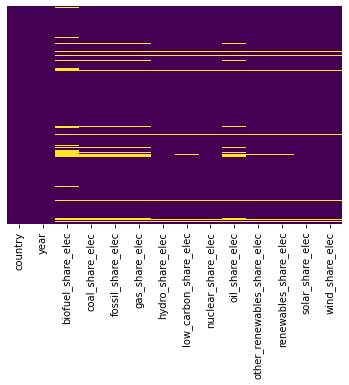

In [11]:
sns.heatmap(dfShare_Elec.isnull(),yticklabels=False,cbar=False,cmap='viridis')

>Maximum null value amount is **132 rows** for **biofuel_share_elec** so if this NaN values are dropped we will now have a dataset of **1,040 rows** as well we would have removed data for some years for affected countries.

>Since the data format for the features is a percentage (share) we can fill the null values with a zero share electricity share of the electricity source for the year this occurs**

In [87]:
# Replace all the NaN values with average value 

dfShare_Elec = dfShare_Elec.fillna(0)
dfShare_Elec

country  biofuel_share_elec  coal_share_elec  fossil_share_elec  \
Year                                                                        
1900  Afghanistan                0.00             0.00               0.00   
1901  Afghanistan                0.00             0.00               0.00   
1902  Afghanistan                0.00             0.00               0.00   
1903  Afghanistan                0.00             0.00               0.00   
1904  Afghanistan                0.00             0.00               0.00   
...           ...                 ...              ...                ...   
2015     Zimbabwe                1.36            45.93              45.93   
2016     Zimbabwe                2.15            54.42              54.42   
2017     Zimbabwe                2.07            44.03              44.03   
2018     Zimbabwe                2.05            43.05              43.05   
2019     Zimbabwe                2.29            42.07              42.07   

      gas_share_elec  hydro_share_elec  nuclear_share_elec  oil_share_elec  \
Year                                                                         
1900            0.00              0.00                0.00            0.00   
1901            0.00              0.00                0.00            0.00   
1902            0.00              0.00                0.00            0.00   
1903            0.00              0.00                0.00            0.00   
1904            0.00              0.00                0.00            0.00   
...              ...               ...                 ...             ...   
2015            0.00             52.62                0.00            0.00   
2016            0.00             43.29                0.00            0.00   
2017            0.00             53.75                0.00            0.00   
2018            0.00             54.75                0.00            0.00   
2019            0.00             55.49                0.00            0.00   

      other_renewables_share_elec  renewables_share_elec  solar_share_elec  \
Year                                                                         
1900                         0.00                   0.00              0.00   
1901                         0.00                   0.00              0.00   
1902                         0.00                   0.00              0.00   
1903                         0.00                   0.00              0.00   
1904                         0.00                   0.00              0.00   
...                           ...                    ...               ...   
2015                         1.36                  54.07              0.09   
2016                         2.15                  45.58              0.13   
2017                         2.07                  55.97              0.15   
2018                         2.05                  56.95              0.15   
2019                         2.29                  57.93              0.15   

      wind_share_elec  
Year                   
1900             0.00  
1901             0.00  
1902             0.00  
1903             0.00  
1904             0.00  
...               ...  
2015             0.00  
2016             0.00  
2017             0.00  
2018             0.00  
2019             0.00  

[16036 rows x 12 columns]

>**Round up float:** We will improve the readbility by making the float 2 decimal places

In [88]:
#  format the float values to 2 decimal places

pd.options.display.float_format = '{:,.2f}'.format
dfShare_Elec

country  biofuel_share_elec  coal_share_elec  fossil_share_elec  \
Year                                                                        
1900  Afghanistan                0.00             0.00               0.00   
1901  Afghanistan                0.00             0.00               0.00   
1902  Afghanistan                0.00             0.00               0.00   
1903  Afghanistan                0.00             0.00               0.00   
1904  Afghanistan                0.00             0.00               0.00   
...           ...                 ...              ...                ...   
2015     Zimbabwe                1.36            45.93              45.93   
2016     Zimbabwe                2.15            54.42              54.42   
2017     Zimbabwe                2.07            44.03              44.03   
2018     Zimbabwe                2.05            43.05              43.05   
2019     Zimbabwe                2.29            42.07              42.07   

      gas_share_elec  hydro_share_elec  nuclear_share_elec  oil_share_elec  \
Year                                                                         
1900            0.00              0.00                0.00            0.00   
1901            0.00              0.00                0.00            0.00   
1902            0.00              0.00                0.00            0.00   
1903            0.00              0.00                0.00            0.00   
1904            0.00              0.00                0.00            0.00   
...              ...               ...                 ...             ...   
2015            0.00             52.62                0.00            0.00   
2016            0.00             43.29                0.00            0.00   
2017            0.00             53.75                0.00            0.00   
2018            0.00             54.75                0.00            0.00   
2019            0.00             55.49                0.00            0.00   

      other_renewables_share_elec  renewables_share_elec  solar_share_elec  \
Year                                                                         
1900                         0.00                   0.00              0.00   
1901                         0.00                   0.00              0.00   
1902                         0.00                   0.00              0.00   
1903                         0.00                   0.00              0.00   
1904                         0.00                   0.00              0.00   
...                           ...                    ...               ...   
2015                         1.36                  54.07              0.09   
2016                         2.15                  45.58              0.13   
2017                         2.07                  55.97              0.15   
2018                         2.05                  56.95              0.15   
2019                         2.29                  57.93              0.15   

      wind_share_elec  
Year                   
1900             0.00  
1901             0.00  
1902             0.00  
1903             0.00  
1904             0.00  
...               ...  
2015             0.00  
2016             0.00  
2017             0.00  
2018             0.00  
2019             0.00  

[16036 rows x 12 columns]

In [14]:
# Lets confirm that there are no more NULL values in our dataframe

dfShare_Elec.isna().sum()

country                        0
year                           0
biofuel_share_elec             0
coal_share_elec                0
fossil_share_elec              0
gas_share_elec                 0
hydro_share_elec               0
low_carbon_share_elec          0
nuclear_share_elec             0
oil_share_elec                 0
other_renewables_share_elec    0
renewables_share_elec          0
solar_share_elec               0
wind_share_elec                0
dtype: int64

In [15]:
# Reconfirm the general information about the dataset

dfShare_Elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 115 to 17431
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1172 non-null   object 
 1   year                         1172 non-null   int64  
 2   biofuel_share_elec           1172 non-null   float64
 3   coal_share_elec              1172 non-null   float64
 4   fossil_share_elec            1172 non-null   float64
 5   gas_share_elec               1172 non-null   float64
 6   hydro_share_elec             1172 non-null   float64
 7   low_carbon_share_elec        1172 non-null   float64
 8   nuclear_share_elec           1172 non-null   float64
 9   oil_share_elec               1172 non-null   float64
 10  other_renewables_share_elec  1172 non-null   float64
 11  renewables_share_elec        1172 non-null   float64
 12  solar_share_elec             1172 non-null   float64
 13  wind_share_elec

>**Data Transformation:** The outstanding issue is the datatype for the year which is showing as an **"integer"** rather than **'datetime'**

In [51]:
# Convert the year column to datetime data type

dfShare_Elec['year']=pd.to_datetime(dfShare_Elec["year"], format='%Y')

In [17]:
# confirm that the year column data type is changed from Integer to datetime

dfShare_Elec.dtypes

country                                object
year                           datetime64[ns]
biofuel_share_elec                    float64
coal_share_elec                       float64
fossil_share_elec                     float64
gas_share_elec                        float64
hydro_share_elec                      float64
low_carbon_share_elec                 float64
nuclear_share_elec                    float64
oil_share_elec                        float64
other_renewables_share_elec           float64
renewables_share_elec                 float64
solar_share_elec                      float64
wind_share_elec                       float64
dtype: object

In [18]:
# We can then get the general descriptive statistics of the dataset

dfShare_Elec.describe(exclude='datetime')

country  biofuel_share_elec  coal_share_elec  fossil_share_elec  \
count          1172            1,172.00         1,172.00           1,172.00   
unique          241                 NaN              NaN                NaN   
top     Afghanistan                 NaN              NaN                NaN   
freq              5                 NaN              NaN                NaN   
mean            NaN                2.15            13.08              71.01   
std             NaN                4.23            26.63              53.95   
min             NaN                0.00             0.00               0.00   
25%             NaN                0.00             0.00              41.73   
50%             NaN                0.48             0.00              71.01   
75%             NaN                2.15            13.46              96.15   
max             NaN               33.91           283.01             512.93   

        gas_share_elec  hydro_share_elec  low_carbon_share_elec  \
count         1,172.00          1,172.00               1,172.00   
unique             NaN               NaN                    NaN   
top                NaN               NaN                    NaN   
freq               NaN               NaN                    NaN   
mean             23.80             24.81                  35.72   
std              39.18             29.60                  32.26   
min               0.00              0.00                   0.00   
25%               0.00              0.01                   4.17   
50%               8.28             11.35                  30.77   
75%              32.28             42.06                  60.29   
max             310.46             99.99                 100.00   

        nuclear_share_elec  oil_share_elec  other_renewables_share_elec  \
count             1,172.00        1,172.00                     1,172.00   
unique                 NaN             NaN                          NaN   
top                    NaN             NaN                          NaN   
freq                   NaN             NaN                          NaN   
mean                  3.51           34.13                         2.98   
std                  10.55           38.72                         6.39   
min                   0.00            0.00                         0.00   
25%                   0.00            1.19                         0.00   
50%                   0.00           13.72                         0.33   
75%                   0.00           67.41                         2.84   
max                  76.22          190.31                        49.05   

        renewables_share_elec  solar_share_elec  wind_share_elec  
count                1,172.00          1,172.00         1,172.00  
unique                    NaN               NaN              NaN  
top                       NaN               NaN              NaN  
freq                      NaN               NaN              NaN  
mean                    32.19              1.52             2.76  
std                     31.14              2.72             6.10  
min                      0.00              0.00             0.00  
25%                      3.98              0.04             0.00  
50%                     22.99              0.46             0.09  
75%                     54.56              1.84             2.76  
max                    100.00             25.71            53.33

>We will carry out a close look at the data values to see (if any) relationship between them for example if any is derived from any of the others data points.

In [27]:
# We will do a data listing to do a visual review of the data relationship

dfShare_Elec

country       year  biofuel_share_elec  coal_share_elec  \
115    Afghanistan 2015-01-01                0.00             0.00   
116    Afghanistan 2016-01-01                0.00             0.00   
117    Afghanistan 2017-01-01                0.00             0.00   
118    Afghanistan 2018-01-01                0.00             0.00   
119    Afghanistan 2019-01-01                0.00             0.00   
...            ...        ...                 ...              ...   
17427     Zimbabwe 2015-01-01                1.36            45.93   
17428     Zimbabwe 2016-01-01                2.15            54.42   
17429     Zimbabwe 2017-01-01                2.07            44.03   
17430     Zimbabwe 2018-01-01                2.05            43.05   
17431     Zimbabwe 2019-01-01                2.29            42.07   

       fossil_share_elec  gas_share_elec  hydro_share_elec  \
115                12.22           12.22             84.97   
116                12.40           12.40             84.71   
117                13.38           13.38             83.60   
118                13.45           13.45             83.23   
119                14.73           14.73             81.39   
...                  ...             ...               ...   
17427              45.93            0.00             52.62   
17428              54.42            0.00             43.29   
17429              44.03            0.00             53.75   
17430              43.05            0.00             54.75   
17431              42.07            0.00             55.49   

       low_carbon_share_elec  nuclear_share_elec  oil_share_elec  \
115                    87.78                0.00            0.00   
116                    87.60                0.00            0.00   
117                    86.62                0.00            0.00   
118                    86.55                0.00            0.00   
119                    85.27                0.00            0.00   
...                      ...                 ...             ...   
17427                  54.07                0.00            0.00   
17428                  45.58                0.00            0.00   
17429                  55.97                0.00            0.00   
17430                  56.95                0.00            0.00   
17431                  57.93                0.00            0.00   

       other_renewables_share_elec  renewables_share_elec  solar_share_elec  \
115                           0.00                  87.78              2.80   
116                           0.00                  87.60              2.89   
117                           0.00                  86.62              3.02   
118                           0.00                  86.55              3.32   
119                           0.00                  85.27              3.88   
...                            ...                    ...               ...   
17427                         1.36                  54.07              0.09   
17428                         2.15                  45.58              0.13   
17429                         2.07                  55.97              0.15   
17430                         2.05                  56.95              0.15   
17431                         2.29                  57.93              0.15   

       wind_share_elec  
115               0.00  
116               0.00  
117               0.00  
118               0.00  
119               0.00  
...                ...  
17427             0.00  
17428             0.00  
17429             0.00  
17430             0.00  
17431             0.00  

[1172 rows x 14 columns]

>From the table above we can see that:
>- Fossil_share_elec = (gas_share_elec + oil_share_elec + coal_share_elec)
>- Renewables_share_elec = low_carbon_share_elec = (biofuel_share_elec + hydro_share_elec + nuclear_share_elec + other_renewables_share_elec + solar_share_elec + wind_share_elec)

>Though there is slight difference in the descriptive statistice value of the **Renewables_share_elec** and **low_carbon_share_elec** logically this should be the same and we can explain away the difference to errors. Therefore as this would not materially affect our analysis we can drop the **low_carbon_share_elec** column. 

In [19]:
# Drop the low_carbon_share_elec column since it is a duplication of Renewables_share_elec

dfShare_Elec.drop(['low_carbon_share_elec'], axis=1, inplace =True)

>#### Dealing with unusual data values from the descriptive statistics 

>The unexpected maximum values which is above 100 from the descriptive statistics above requires investigation and we will have to handle these outlier values as this would affect the mean value calculated. The data set scale is a percentage and should not have a maximum value above 100. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'biofuel_share_elec'),
  Text(1, 0, 'coal_share_elec'),
  Text(2, 0, 'fossil_share_elec'),
  Text(3, 0, 'gas_share_elec'),
  Text(4, 0, 'hydro_share_elec'),
  Text(5, 0, 'nuclear_share_elec'),
  Text(6, 0, 'oil_share_elec'),
  Text(7, 0, 'other_renewables_share_elec'),
  Text(8, 0, 'renewables_share_elec'),
  Text(9, 0, 'solar_share_elec'),
  Text(10, 0, 'wind_share_elec')])

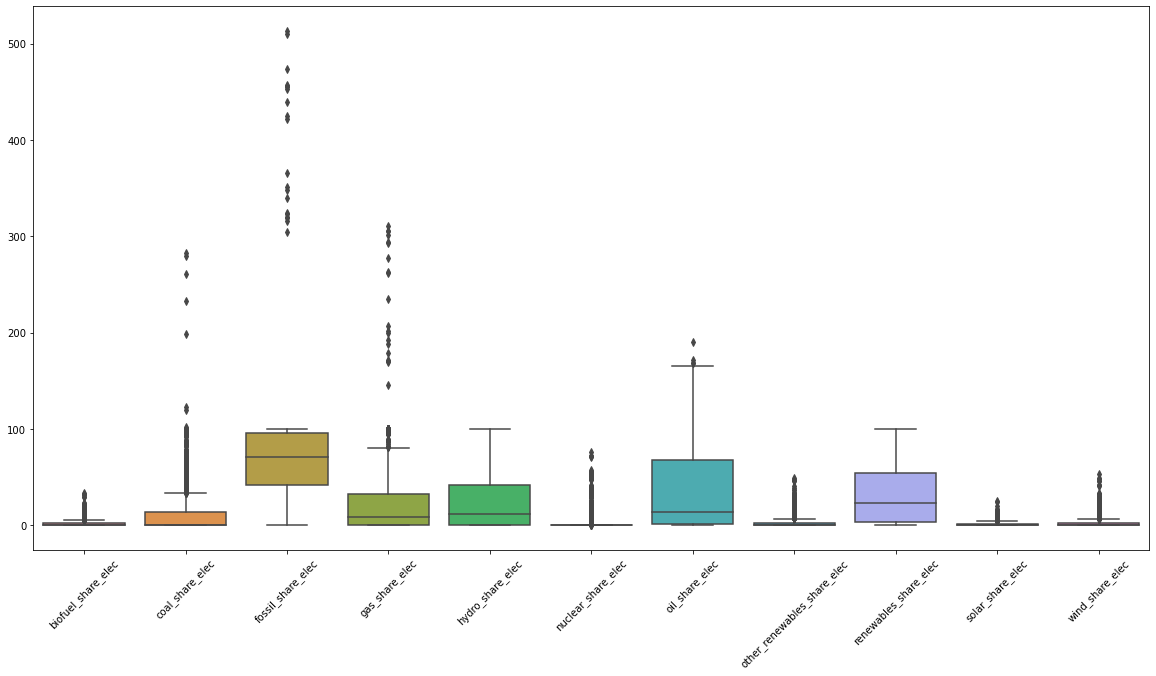

In [20]:
# Plot the boxplot to visualise the outliers in the dataset 

plt.figure(figsize=(20,10))
sns.boxplot(data=dfShare_Elec) 
plt.xticks(rotation = 45)

>The following are the data points have values above 100 as such outlier handling will be processed for them:
>- coal_share_elec
>- fossil_share_elec
>- gas_share_elec
>- oil_share_elec

In [22]:
max_vals=dfShare_Elec['coal_share_elec'].quantile(0.99)

In [23]:
dfShare_Elec[dfShare_Elec['coal_share_elec']>max_vals]

country       year  biofuel_share_elec  coal_share_elec  \
2109               Botswana 2015-01-01                0.00            99.89   
2111               Botswana 2017-01-01                0.00            99.82   
2112               Botswana 2018-01-01                0.00            99.83   
2113               Botswana 2019-01-01                0.00            99.83   
5450         Europe (other) 2015-01-01                2.15           283.01   
5451         Europe (other) 2016-01-01                2.15           260.84   
5452         Europe (other) 2017-01-01                2.15           279.75   
5453         Europe (other) 2018-01-01                2.15           233.29   
5454         Europe (other) 2019-01-01                2.15           198.18   
11865  Other Asia & Pacific 2017-01-01                2.15           101.87   
11866  Other Asia & Pacific 2018-01-01                2.15           119.87   
11867  Other Asia & Pacific 2019-01-01                2.15           123.13   

       fossil_share_elec  gas_share_elec  hydro_share_elec  \
2109               99.89            0.00              0.00   
2111               99.82            0.00              0.00   
2112               99.83            0.00              0.00   
2113               99.83            0.00              0.00   
5450              452.69          145.47             37.84   
5451              454.70          169.73             40.03   
5452              512.93          207.11             34.60   
5453              424.69          170.27             41.92   
5454              421.73          202.09             38.44   
11865             323.92          171.38             50.73   
11866             351.11          188.22             50.64   
11867             348.12          192.44             52.55   

       nuclear_share_elec  oil_share_elec  other_renewables_share_elec  \
2109                 0.00            0.00                         0.00   
2111                 0.00            0.00                         0.00   
2112                 0.00            0.00                         0.00   
2113                 0.00            0.00                         0.00   
5450                 0.00           24.21                         0.12   
5451                 0.00           24.12                         0.14   
5452                 0.00           26.07                         0.20   
5453                 0.00           21.12                         0.21   
5454                 0.00           21.45                         0.26   
11865                0.00           50.67                         0.15   
11866                0.00           43.03                         0.14   
11867                0.00           32.56                         0.14   

       renewables_share_elec  solar_share_elec  wind_share_elec  
2109                    0.11              0.11             0.00  
2111                    0.18              0.18             0.00  
2112                    0.17              0.17             0.00  
2113                    0.17              0.17             0.00  
5450                   38.31              0.28             0.07  
5451                   40.62              0.35             0.10  
5452                   35.62              0.46             0.35  
5453                   43.09              0.28             0.68  
5454                   40.72              0.33             1.69  
11865                  51.47              0.38             0.21  
11866                  51.57              0.46             0.33  
11867                  53.73              0.58             0.46

>This shows the country columns contains **continental and regional data** some of which are having the wrong values i.e value above 100. We will inspect the list of countries to identify which are **continents and regions** so they can be dropped

In [32]:
# Display full listing of the 'country' column
dfShare_Elec['country'].to_string()

"115                           Afghanistan\n116                           Afghanistan\n117                           Afghanistan\n118                           Afghanistan\n119                           Afghanistan\n235                                Africa\n236                                Africa\n237                                Africa\n238                                Africa\n239                                Africa\n355                               Albania\n356                               Albania\n357                               Albania\n358                               Albania\n359                               Albania\n475                               Algeria\n476                               Algeria\n477                               Algeria\n478                               Algeria\n479                               Algeria\n515                        American Samoa\n516                        American Samoa\n517                        American Samoa\n518       

>We will drop all the **continent and regional** listings as the data for these have errors with percentages above 100. This will be the first step towards solving the outlier issue and hopefully this will be the only cause.






In [302]:
# Create a list of the keywords of continents and regions we want to drop and loop through to drop each selection

reg_con_to_drop = ['other','Other','Africa','Asia Pacific','Europe','Middle Africa','Middle East','North America','South & Central America','Western Africa','Western Sahara']

# Loop through the country column to drop continents and region

for drop in reg_con_to_drop[0:]:
    dfShare_Elec=dfShare_Elec[(dfShare_Elec['country'].str.contains(drop)==False)]

dfShare_Elec['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'CIS', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central America', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands ', 'Fiji',

In [303]:
len(dfShare_Elec['country'].unique())

222

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'biofuel_share_elec'),
  Text(1, 0, 'coal_share_elec'),
  Text(2, 0, 'fossil_share_elec'),
  Text(3, 0, 'gas_share_elec'),
  Text(4, 0, 'hydro_share_elec'),
  Text(5, 0, 'nuclear_share_elec'),
  Text(6, 0, 'oil_share_elec'),
  Text(7, 0, 'other_renewables_share_elec'),
  Text(8, 0, 'renewables_share_elec'),
  Text(9, 0, 'solar_share_elec'),
  Text(10, 0, 'wind_share_elec')])

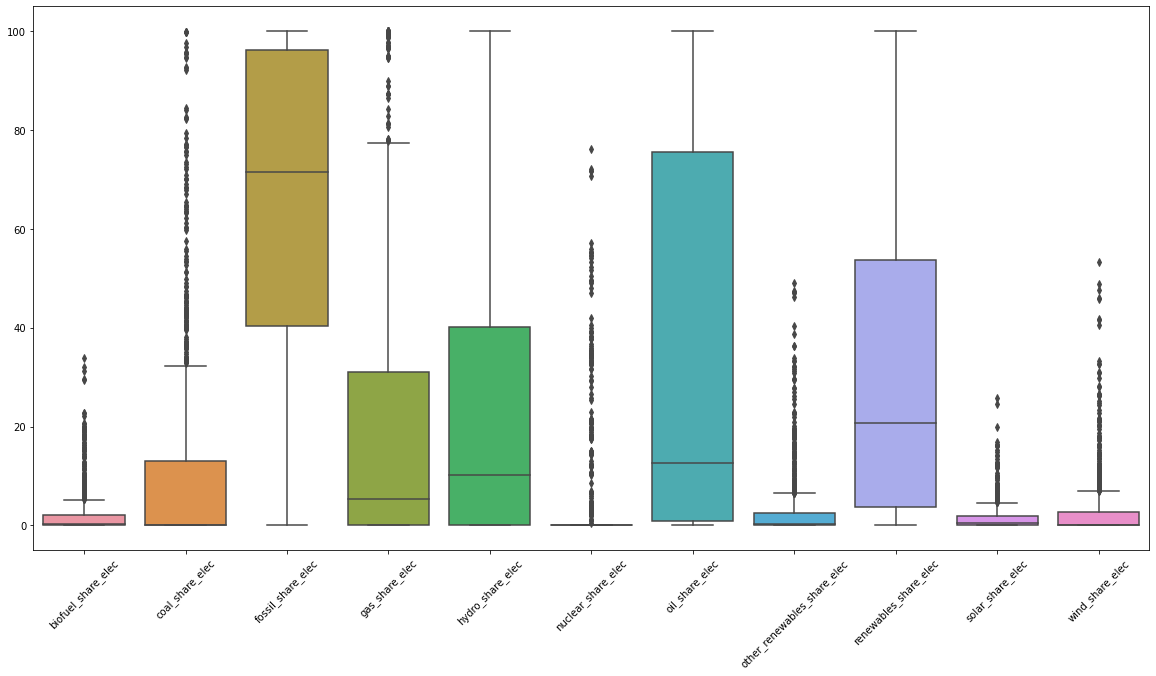

In [36]:
# Confirm to see if the error(outlier) data issue is taken care of by plotting the box plot again

plt.figure(figsize=(20,10))
sns.boxplot(data=dfShare_Elec) 
plt.xticks(rotation = 45)

>We now have all the values within the 100% value range as expected.

>Next we will carry out a **GRAPHICAL EXPLORATORY DATA ANALYSIS** to see relationship between variables and trends to aid our modelling

<AxesSubplot:>

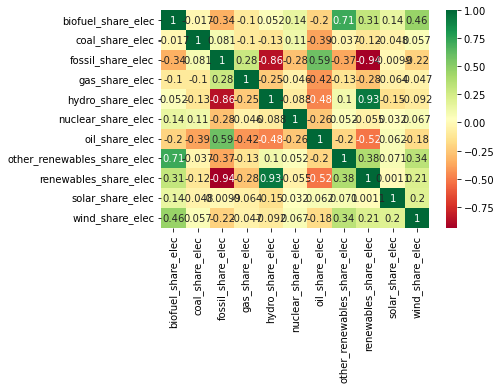

In [35]:
# Check the correlation of all the data points

sns.heatmap(dfShare_Elec.corr(),annot=True,cmap='RdYlGn')

> As expected there is correlation with the constituents of fossil fuel and renewables respectively.There is really do direct correlation between individual electricity sources e.g oil_share_elec vs wind_share-elec


>#### Let's plot the electricity mix trend per year 

In [37]:
# group the Data by year

dfShare_Elec_Year=dfShare_Elec.groupby(['year']).mean()
dfShare_Elec_Year

biofuel_share_elec  coal_share_elec  fossil_share_elec  \
year                                                                 
2015-01-01                2.06            11.25              66.71   
2016-01-01                2.11            11.16              66.08   
2017-01-01                2.15            11.01              65.47   
2018-01-01                2.27            10.65              64.55   
2019-01-01                2.29            10.31              64.03   

            gas_share_elec  hydro_share_elec  nuclear_share_elec  \
year                                                               
2015-01-01           19.91             23.93                3.54   
2016-01-01           19.72             24.12                3.54   
2017-01-01           20.03             23.86                3.55   
2018-01-01           19.87             24.14                3.48   
2019-01-01           20.04             23.74                3.58   

            oil_share_elec  other_renewables_share_elec  \
year                                                      
2015-01-01           35.56                         2.93   
2016-01-01           35.19                         3.01   
2017-01-01           34.43                         3.04   
2018-01-01           34.03                         3.19   
2019-01-01           33.68                         3.24   

            renewables_share_elec  solar_share_elec  wind_share_elec  
year                                                                  
2015-01-01                  30.31              1.03             2.40  
2016-01-01                  30.95              1.34             2.48  
2017-01-01                  31.21              1.49             2.82  
2018-01-01                  32.26              1.88             3.05  
2019-01-01                  32.58              2.13             3.48

>We can see the aggregation in the dataset as follows:

>- **Fossil**  = Coal + Gas + Oil
>- **Renewables** = Biofuel + Hydro + Nuclear +  Solar + Wind + Other Renewables

>The main fact about our data is that it is a time-series data as such we will explore how the data points trend over time while they are not truly directly correlated.

>The subset dataset does not have the economic indices that could create an indirect correlation between these sources of electricity so we will stick with a time-series review.

>**Check to see the fossil fuel trend between 2015 and 2019**

<AxesSubplot:title={'center':'Fossils Trend'}, xlabel='year', ylabel='share(%)'>

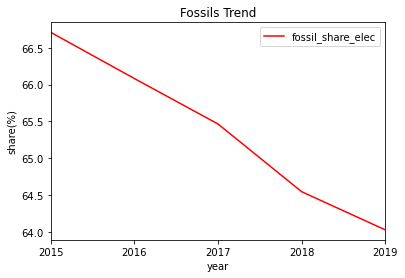

In [304]:
# Plot the time based trend of electricity from fossil fuels

(dfShare_Elec_Year['fossil_share_elec']).plot(title='Fossils Trend',kind='line',color='red',legend='upper right',ylabel='share(%)')

>**Check to see the renewables trend between 2015 and 2019**

<AxesSubplot:title={'center':'Renewable Trend'}, xlabel='year', ylabel='share(%)'>

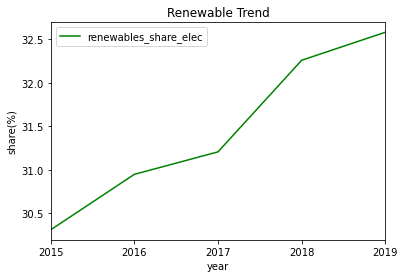

In [306]:
# Plot the time based trend of electricity from renewables

(dfShare_Elec_Year['renewables_share_elec']).plot(title='Renewable Trend',kind='line',color='green',legend='upper left',ylabel='share(%)')

>##### We will drill down on each of the group to see which of the sub-units accounts mainly or otherwise for these trends

(array([16436., 16617., 16801., 16983., 17167., 17348., 17532., 17713.,
        17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

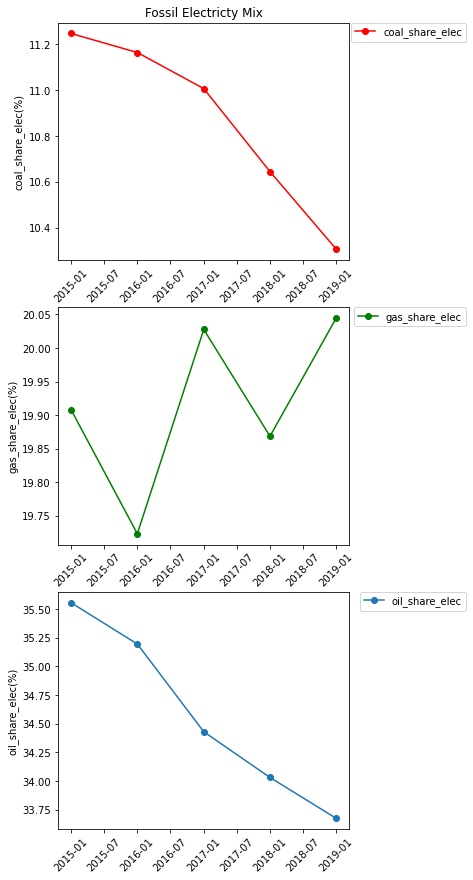

In [308]:
# Which of the constitutes of fossil electricity accounts for the drop in fossil fuels?

plt.subplot(3,1,1)
plt.plot(dfShare_Elec_Year['coal_share_elec'],'r-o',label='coal_share_elec')
plt.title('Fossil Electricty Mix')
plt.ylabel('coal_share_elec(%)')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.xticks(rotation = 45)

plt.subplot(3,1,2)
plt.plot(dfShare_Elec_Year['gas_share_elec'],'g-o',label='gas_share_elec')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.ylabel('gas_share_elec(%)')
plt.xticks(rotation = 45)

plt.subplot(3,1,3)
plt.plot(dfShare_Elec_Year['oil_share_elec'],'-o',label='oil_share_elec')
plt.ylabel('oil_share_elec(%)')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.subplots_adjust(bottom=-1.90, right=0.8, top=0.9)
plt.xticks(rotation = 45)

(array([16436., 16617., 16801., 16983., 17167., 17348., 17532., 17713.,
        17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

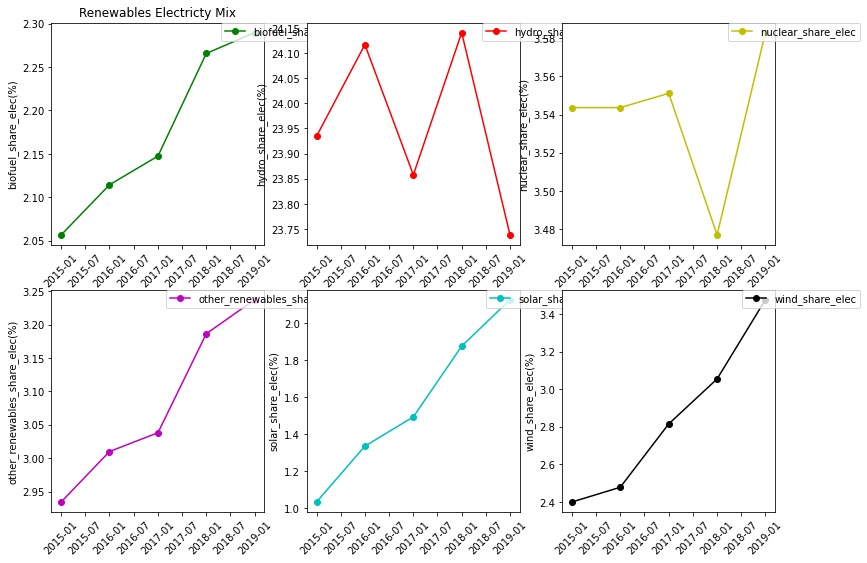

In [309]:
# Which of the constituents of renewables electricity accounts for the rise in renewables?

plt.subplot(2,3,1)
plt.plot(dfShare_Elec_Year['biofuel_share_elec'],'g-o',label='biofuel_share_elec')
plt.title('Renewables Electricty Mix')
plt.ylabel('biofuel_share_elec(%)')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.xticks(rotation = 45)

plt.subplot(2,3,2)
plt.plot(dfShare_Elec_Year['hydro_share_elec'],'r-o',label='hydro_share_elec')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.ylabel('hydro_share_elec(%)')
plt.xticks(rotation = 45)

plt.subplot(2,3,3)
plt.plot(dfShare_Elec_Year['nuclear_share_elec'],'y-o',label='nuclear_share_elec')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.subplots_adjust(bottom=-0.80, right=0.8, top=0.9)
plt.ylabel('nuclear_share_elec(%)')
plt.xticks(rotation = 45)

plt.subplot(2,3,4)
plt.plot(dfShare_Elec_Year['other_renewables_share_elec'],'m-o',label='other_renewables_share_elec')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.subplots_adjust(bottom=-0.80, right=0.8, top=0.9)
plt.ylabel('other_renewables_share_elec(%)')
plt.xticks(rotation = 45)

plt.subplot(2,3,5)
plt.plot(dfShare_Elec_Year['solar_share_elec'],'c-o',label='solar_share_elec')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.subplots_adjust(bottom=-0.80, right=0.8, top=0.9)
plt.ylabel('solar_share_elec(%)')
plt.xticks(rotation = 45)

plt.subplot(2,3,6)
plt.plot(dfShare_Elec_Year['wind_share_elec'],'k-o',label='wind_share_elec')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
plt.subplots_adjust(bottom=-0.80, right=1.8, top=0.9)
plt.ylabel('wind_share_elec(%)')
plt.xticks(rotation = 45)


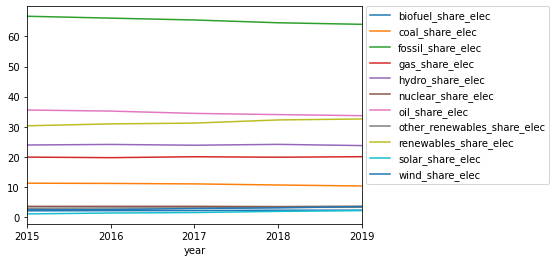

In [43]:
# Plot the electricty share trends in one view for these years

dfShare_Elec_Year.plot.line()
plt.legend(bbox_to_anchor=(1.56, 1), loc='upper right', borderaxespad=0)

>The EDA already revealing that there is an increase the cleaner electricity with a reduction in the fossil fuels save for Gas albeit the gradient of the line for the growth and decline of fossil fuels and renewables respectively

>We will look at the data in respect of countries


In [62]:
# We need to look at the data in respect of the countries as well
try:
    dfShare_Elec_Country=dfShare_Elec_Country.drop(columns='year',axis=1)

except:
    pass
dfShare_Elec_Country=dfShare_Elec.groupby(['country']).mean()
dfShare_Elec_Country.head()

biofuel_share_elec  coal_share_elec  fossil_share_elec  \
country                                                                  
Afghanistan                   0.00             0.00              13.24   
Albania                       0.00             0.00               0.00   
Algeria                       0.00             0.00              99.25   
American Samoa                0.00             0.00             100.00   
Angola                        1.52             0.00              31.43   

                gas_share_elec  hydro_share_elec  nuclear_share_elec  \
country                                                                
Afghanistan              13.24             83.58                0.00   
Albania                   0.00             99.90                0.00   
Algeria                  99.25              0.19                0.00   
American Samoa            0.00              0.00                0.00   
Angola                   17.12             66.89                0.00   

                oil_share_elec  other_renewables_share_elec  \
country                                                       
Afghanistan               0.00                         0.00   
Albania                   0.00                         0.00   
Algeria                   0.00                         0.00   
American Samoa          100.00                         0.00   
Angola                   14.32                         1.52   

                renewables_share_elec  solar_share_elec  wind_share_elec  
country                                                                   
Afghanistan                     86.76              3.18             0.00  
Albania                        100.00              0.10             0.00  
Algeria                          0.75              0.54             0.02  
American Samoa                   0.00              0.00             0.00  
Angola                          68.57              0.17             0.00

>**We will look at the top 20 fossil electricity countries and the top 20 Renewables electricity countries**


In [63]:
# Top 20 fossil electricity countries cummulative for 2015-2019

dfShare_Elec_CountryF=dfShare_Elec_Country.sort_values(by='fossil_share_elec',ascending=False)
dfShare_Elec_CountryF=dfShare_Elec_CountryF.head(20,)
dfShare_Elec_CountryF

biofuel_share_elec  coal_share_elec  \
country                                                          
Macau                                    0.00             0.00   
Niue                                     0.00             0.00   
Bermuda                                  0.00             0.00   
Saint Helena                             0.00             0.00   
Nauru                                    0.00             0.00   
Montserrat                               0.00             0.00   
Saint Pierre and Miquelon                0.00             0.00   
Tonga                                    0.00             0.00   
Turks and Caicos Islands                 0.00             0.00   
Gibraltar                                0.00             0.00   
American Samoa                           0.00             0.00   
Turkmenistan                             0.00             0.00   
Oman                                     0.00             0.00   
Libya                                    0.00             0.00   
Bahrain                                  0.00             0.00   
Saudi Arabia                             0.00             0.00   
Brunei                                   0.00             0.00   
Trinidad and Tobago                      0.00             0.00   
Palestine                                0.07             0.00   
Kuwait                                   0.00             0.00   

                           fossil_share_elec  gas_share_elec  \
country                                                        
Macau                                 100.00            0.00   
Niue                                  100.00            0.00   
Bermuda                               100.00            0.00   
Saint Helena                          100.00            0.00   
Nauru                                 100.00            0.00   
Montserrat                            100.00            0.00   
Saint Pierre and Miquelon             100.00            0.00   
Tonga                                 100.00            0.00   
Turks and Caicos Islands              100.00            0.00   
Gibraltar                             100.00            0.00   
American Samoa                        100.00            0.00   
Turkmenistan                           99.99           34.13   
Oman                                   99.99           99.99   
Libya                                  99.97           94.82   
Bahrain                                99.97           99.87   
Saudi Arabia                           99.96           52.33   
Brunei                                 99.95           99.95   
Trinidad and Tobago                    99.94           87.32   
Palestine                              99.93            0.00   
Kuwait                                 99.89           99.89   

                           hydro_share_elec  nuclear_share_elec  \
country                                                           
Macau                                  0.00                0.00   
Niue                                   0.00                0.00   
Bermuda                                0.00                0.00   
Saint Helena                           0.00                0.00   
Nauru                                  0.00                0.00   
Montserrat                             0.00                0.00   
Saint Pierre and Miquelon              0.00                0.00   
Tonga                                  0.00                0.00   
Turks and Caicos Islands               0.00                0.00   
Gibraltar                              0.00                0.00   
American Samoa                         0.00                0.00   
Turkmenistan                           0.01                0.00   
Oman                                   0.00                0.00   
Libya                                  0.00                0.00   
Bahrain                                0.00                0.00   
Saudi Arabia              

>#### Visualisation of the top 20 countries for fossil fuel electricity

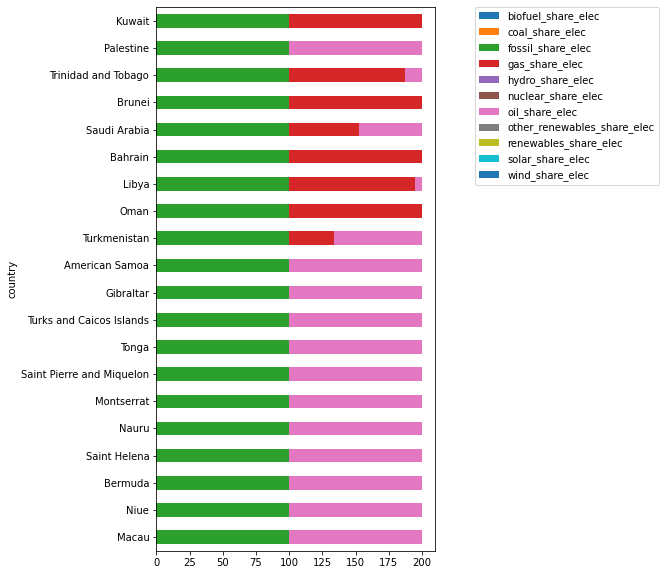

In [64]:
# Visualisation of the top 20 fossils countries

dfShare_Elec_CountryF.plot(figsize=(5,10),kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right', borderaxespad=0)

In [65]:
# Top 20 Renewables electricity countries cummulative 

dfShare_Elec_CountryR=dfShare_Elec_Country.sort_values(by='renewables_share_elec',ascending=False)
dfShare_Elec_CountryR=dfShare_Elec_CountryR.head(20,)
dfShare_Elec_CountryR

biofuel_share_elec  coal_share_elec  \
country                                                             
Lesotho                                     0.00             0.00   
Nepal                                       0.00             0.00   
Albania                                     0.00             0.00   
Bhutan                                      0.00             0.00   
Paraguay                                    1.15             0.00   
Iceland                                     0.00             0.00   
Ethiopia                                    0.23             0.00   
Democratic Republic of Congo                0.24             0.00   
Costa Rica                                  1.57             0.00   
Norway                                      0.31             0.00   
Namibia                                     0.00             1.72   
Uruguay                                    17.36             0.00   
Belize                                     31.27             0.00   
Tajikistan                                  0.00             0.00   
Uganda                                     12.34             0.00   
Malawi                                      2.87             0.00   
Kyrgyzstan                                  0.00             9.31   
Zambia                                      0.54             5.91   
Afghanistan                                 0.00             0.00   
Kenya                                       1.20             0.00   

                              fossil_share_elec  gas_share_elec  \
country                                                           
Lesotho                                    0.00            0.00   
Nepal                                      0.00            0.00   
Albania                                    0.00            0.00   
Bhutan                                     0.00            0.00   
Paraguay                                   0.00            0.00   
Iceland                                    0.01            0.00   
Ethiopia                                   0.03            0.00   
Democratic Republic of Congo               0.10            0.06   
Costa Rica                                 1.01            0.00   
Norway                                     1.79            1.79   
Namibia                                    2.58            0.00   
Uruguay                                    3.01            1.23   
Belize                                     4.08            0.00   
Tajikistan                                 4.56            0.00   
Uganda                                     6.23            0.00   
Malawi                                     9.29            9.29   
Kyrgyzstan                                10.01            0.00   
Zambia                                    10.76            0.00   
Afghanistan                               13.24           13.24   
Kenya                                     14.94            0.00   

                              hydro_share_elec  nuclear_share_elec  \
country                                                              
Lesotho                                  99.81                0.00   
Nepal                                    98.66                0.00   
Albania                                  99.90                0.00   
Bhutan                                   99.98                0.00   
Paraguay                                 98.84                0.00   
Iceland                                  71.66                0.00   
Ethiopia                                 94.53                0.00   
Democratic Republic of Congo             99.59                0.00   
Costa Rica                               73.02                0.00   
Norway                                   95.50                0.00   
Namibia                                  94.63                0.00   
Uruguay                                  52.72                0.00   
Belize                                   64.46          

>##### Visualisation of the top 20 countries for renewable electricity 

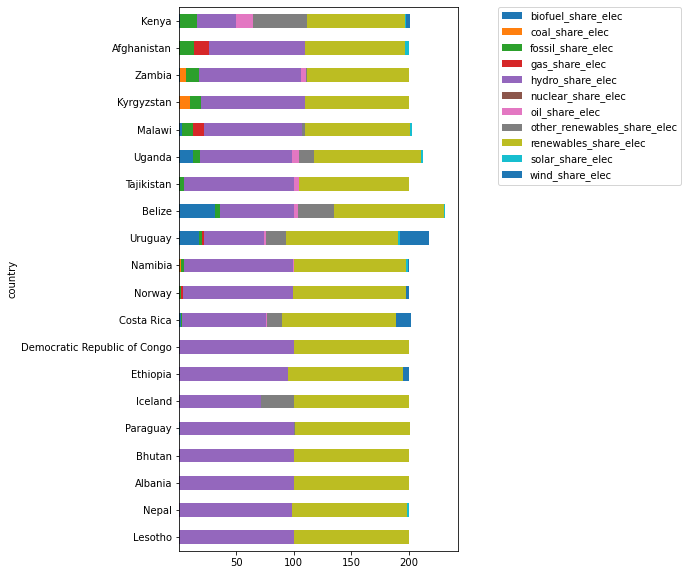

In [48]:
# Visualisation of the top 20 countries for renewable electricity 

dfShare_Elec_CountryR.plot(figsize=(5,10),kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right', borderaxespad=0)

>#### Wind and Solar while growing, is still a little water in the ocean of the electricity mix -which are the top countries for this source of renewables?

In [66]:
# Top 20 Solar electricity mix countries cummalative for 2015-2019

dfShare_Elec_CountryS=dfShare_Elec_Country.sort_values(by='solar_share_elec',ascending=False)
dfShare_Elec_CountryS=dfShare_Elec_CountryS.head(20,)
dfShare_Elec_CountryS

biofuel_share_elec  coal_share_elec  fossil_share_elec  \
country                                                                    
Cook Islands                    0.00             0.00              81.44   
Kiribati                        0.00             0.00              84.27   
Luxembourg                     18.36             0.00              39.92   
Malta                           0.60             0.00              89.13   
Honduras                        9.27             0.00              39.77   
Mauritania                      0.00             0.00              62.56   
Rwanda                          0.32             0.00              45.48   
Yemen                           0.00             0.00              91.46   
Reunion                         7.91             0.00              67.36   
Italy                           6.71            11.12              61.61   
Greece                          0.55            33.61              71.41   
Germany                         7.98            36.88              53.76   
French Polynesia                0.00             0.00              64.29   
Guadeloupe                      3.76             0.00              87.23   
Japan                           3.93            30.26              76.35   
Vanuatu                         2.00             0.00              84.01   
Spain                           2.15            13.35              42.70   
French Guiana                   1.07             0.00              43.73   
Eritrea                         0.00             0.00              94.50   
Chile                           7.26            24.43              54.37   

                  gas_share_elec  hydro_share_elec  nuclear_share_elec  \
country                                                                  
Cook Islands                0.00              0.00                0.00   
Kiribati                    0.00              0.00                0.00   
Luxembourg                 32.20             10.21                0.00   
Malta                      51.16              0.00                0.00   
Honduras                    1.88             32.01                0.00   
Mauritania                 29.70             17.92                0.00   
Rwanda                     14.33             45.49                0.00   
Yemen                      35.01              0.00                0.00   
Reunion                     0.00             16.06                0.00   
Italy                      44.67             15.29                0.00   
Greece                     26.97              9.69                0.00   
Germany                    12.71              3.07               12.71   
French Polynesia            0.00             29.65                0.00   
Guadeloupe                  0.00              0.00                0.00   
Japan                      35.62              8.32                2.88   
Vanuatu                     0.00              0.00                0.00   
Spain                      22.84             10.42               21.11   
French Guiana              30.48             50.12                0.00   
Eritrea                     0.00              0.00                0.00   
Chile                      15.14             29.01                0.00   

                  oil_share_elec  other_renewables_share_elec  \
country                                                         
Cook Islands               81.44                         0.00   
Kiribati                   84.27                         0.00   
Luxembourg                  7.72                        18.36   
Malta                      37.97                         0.60   
Honduras                   37.89                        10.77   
Mauritania                 32.86                         0.00   
Rwanda                     31.15                         0.32   
Yemen                      56.45                         0.00   
Reunion                    67.36                         7.91   
I

In [67]:
# Top 20 Wind electricity mix countries cummalative for 2015-2019

dfShare_Elec_CountryW=dfShare_Elec_Country.sort_values(by='wind_share_elec',ascending=False)
dfShare_Elec_CountryW=dfShare_Elec_CountryW.head(20,)
dfShare_Elec_CountryW

biofuel_share_elec  coal_share_elec  fossil_share_elec  \
country                                                                        
Denmark                            17.85            21.87              31.95   
Lithuania                          15.42             0.00              32.44   
Netherlands Antilles                0.00             0.00              68.84   
Ireland                             2.36            10.74              69.76   
Uruguay                            17.36             0.00               3.01   
Portugal                            5.77            21.53              50.95   
Luxembourg                         18.36             0.00              39.92   
Spain                               2.15            13.35              42.70   
Nicaragua                          14.06             0.00              42.75   
Germany                             7.98            36.88              53.76   
United Kingdom                      9.34             9.17              50.20   
Aruba                               0.11             0.00              83.83   
Costa Rica                          1.57             0.00               1.01   
Greece                              0.55            33.61              71.41   
Romania                             0.80            25.10              41.70   
Morocco                             0.04            44.27              82.42   
Sweden                              7.24             0.20               2.16   
Mauritania                          0.00             0.00              62.56   
Croatia                             4.37            15.27              33.64   
Austria                             7.21             3.11              23.03   

                      gas_share_elec  hydro_share_elec  nuclear_share_elec  \
country                                                                      
Denmark                         6.64              0.06                0.00   
Lithuania                      24.68             13.40                0.00   
Netherlands Antilles            0.00              0.00                0.00   
Ireland                        50.36              2.50                0.00   
Uruguay                         1.23             52.72                0.00   
Portugal                       26.77             18.54                0.00   
Luxembourg                     32.20             10.21                0.00   
Spain                          22.84             10.42               21.11   
Nicaragua                       5.89              9.10                0.00   
Germany                        12.71              3.07               12.71   
United Kingdom                 38.96              1.75               20.24   
Aruba                           0.00              0.00                0.00   
Costa Rica                      0.00             73.02                0.00   
Greece                         26.97              9.69                0.00   
Romania                        15.51             25.91               17.95   
Morocco                        26.02              4.86                0.00   
Sweden                          0.27             40.61               39.32   
Mauritania                     29.70             17.92                0.00   
Croatia                        17.34             51.95                0.00   
Austria                        14.61             58.83                0.00   

                      oil_share_elec  other_renewables_share_elec  \
country                                                             
Denmark                         3.44                        17.85   
Lithuania                       7.76                        15.42   
Netherlands Antilles           68.84                         0.00   
Ireland                         8.66                         2.36   
Uruguay                         1.79                        17.36   
Portugal                        2.65                         

## 3.0 Statistical/computation model to predict electricity source/mix per country 

### 3.1 Final review of dataset

In [51]:
# View our final data set

dfShare_Elec

country       year  biofuel_share_elec  coal_share_elec  \
115    Afghanistan 2015-01-01                0.00             0.00   
116    Afghanistan 2016-01-01                0.00             0.00   
117    Afghanistan 2017-01-01                0.00             0.00   
118    Afghanistan 2018-01-01                0.00             0.00   
119    Afghanistan 2019-01-01                0.00             0.00   
...            ...        ...                 ...              ...   
17427     Zimbabwe 2015-01-01                1.36            45.93   
17428     Zimbabwe 2016-01-01                2.15            54.42   
17429     Zimbabwe 2017-01-01                2.07            44.03   
17430     Zimbabwe 2018-01-01                2.05            43.05   
17431     Zimbabwe 2019-01-01                2.29            42.07   

       fossil_share_elec  gas_share_elec  hydro_share_elec  \
115                12.22           12.22             84.97   
116                12.40           12.40             84.71   
117                13.38           13.38             83.60   
118                13.45           13.45             83.23   
119                14.73           14.73             81.39   
...                  ...             ...               ...   
17427              45.93            0.00             52.62   
17428              54.42            0.00             43.29   
17429              44.03            0.00             53.75   
17430              43.05            0.00             54.75   
17431              42.07            0.00             55.49   

       nuclear_share_elec  oil_share_elec  other_renewables_share_elec  \
115                  0.00            0.00                         0.00   
116                  0.00            0.00                         0.00   
117                  0.00            0.00                         0.00   
118                  0.00            0.00                         0.00   
119                  0.00            0.00                         0.00   
...                   ...             ...                          ...   
17427                0.00            0.00                         1.36   
17428                0.00            0.00                         2.15   
17429                0.00            0.00                         2.07   
17430                0.00            0.00                         2.05   
17431                0.00            0.00                         2.29   

       renewables_share_elec  solar_share_elec  wind_share_elec  
115                    87.78              2.80             0.00  
116                    87.60              2.89             0.00  
117                    86.62              3.02             0.00  
118                    86.55              3.32             0.00  
119                    85.27              3.88             0.00  
...                      ...               ...              ...  
17427                  54.07              0.09             0.00  
17428                  45.58              0.13             0.00  
17429                  55.97              0.15             0.00  
17430                  56.95              0.15             0.00  
17431                  57.93              0.15             0.00  

[1072 rows x 13 columns]

Time-series prediction is required. Therefore we will make the date the index of the dataframe

In [71]:
dfShare_Elec['Year']=dfShare_Elec.year.dt.year
dfShare_Elec=dfShare_Elec.drop('year',axis=1)
dfShare_Elec

country  biofuel_share_elec  coal_share_elec  fossil_share_elec  \
Year                                                                        
2015  Afghanistan                0.00             0.00              12.22   
2016  Afghanistan                0.00             0.00              12.40   
2017  Afghanistan                0.00             0.00              13.38   
2018  Afghanistan                0.00             0.00              13.45   
2019  Afghanistan                0.00             0.00              14.73   
...           ...                 ...              ...                ...   
2015     Zimbabwe                1.36            45.93              45.93   
2016     Zimbabwe                2.15            54.42              54.42   
2017     Zimbabwe                2.07            44.03              44.03   
2018     Zimbabwe                2.05            43.05              43.05   
2019     Zimbabwe                2.29            42.07              42.07   

      gas_share_elec  hydro_share_elec  nuclear_share_elec  oil_share_elec  \
Year                                                                         
2015           12.22             84.97                0.00            0.00   
2016           12.40             84.71                0.00            0.00   
2017           13.38             83.60                0.00            0.00   
2018           13.45             83.23                0.00            0.00   
2019           14.73             81.39                0.00            0.00   
...              ...               ...                 ...             ...   
2015            0.00             52.62                0.00            0.00   
2016            0.00             43.29                0.00            0.00   
2017            0.00             53.75                0.00            0.00   
2018            0.00             54.75                0.00            0.00   
2019            0.00             55.49                0.00            0.00   

      other_renewables_share_elec  renewables_share_elec  solar_share_elec  \
Year                                                                         
2015                         0.00                  87.78              2.80   
2016                         0.00                  87.60              2.89   
2017                         0.00                  86.62              3.02   
2018                         0.00                  86.55              3.32   
2019                         0.00                  85.27              3.88   
...                           ...                    ...               ...   
2015                         1.36                  54.07              0.09   
2016                         2.15                  45.58              0.13   
2017                         2.07                  55.97              0.15   
2018                         2.05                  56.95              0.15   
2019                         2.29                  57.93              0.15   

      wind_share_elec  Year  
Year                         
2015             0.00  2015  
2016             0.00  2016  
2017             0.00  2017  
2018             0.00  2018  
2019             0.00  2019  
...               ...   ...  
2015             0.00  2015  
2016             0.00  2016  
2017             0.00  2017  
2018             0.00  2018  
2019             0.00  2019  

[1072 rows x 13 columns]

In [72]:
# We will make the date(year) the index of the dataframe to be able to do a time series forecasting

dfShare_Elec =dfShare_Elec.set_index('Year')
dfShare_Elec

country  biofuel_share_elec  coal_share_elec  fossil_share_elec  \
Year                                                                        
2015  Afghanistan                0.00             0.00              12.22   
2016  Afghanistan                0.00             0.00              12.40   
2017  Afghanistan                0.00             0.00              13.38   
2018  Afghanistan                0.00             0.00              13.45   
2019  Afghanistan                0.00             0.00              14.73   
...           ...                 ...              ...                ...   
2015     Zimbabwe                1.36            45.93              45.93   
2016     Zimbabwe                2.15            54.42              54.42   
2017     Zimbabwe                2.07            44.03              44.03   
2018     Zimbabwe                2.05            43.05              43.05   
2019     Zimbabwe                2.29            42.07              42.07   

      gas_share_elec  hydro_share_elec  nuclear_share_elec  oil_share_elec  \
Year                                                                         
2015           12.22             84.97                0.00            0.00   
2016           12.40             84.71                0.00            0.00   
2017           13.38             83.60                0.00            0.00   
2018           13.45             83.23                0.00            0.00   
2019           14.73             81.39                0.00            0.00   
...              ...               ...                 ...             ...   
2015            0.00             52.62                0.00            0.00   
2016            0.00             43.29                0.00            0.00   
2017            0.00             53.75                0.00            0.00   
2018            0.00             54.75                0.00            0.00   
2019            0.00             55.49                0.00            0.00   

      other_renewables_share_elec  renewables_share_elec  solar_share_elec  \
Year                                                                         
2015                         0.00                  87.78              2.80   
2016                         0.00                  87.60              2.89   
2017                         0.00                  86.62              3.02   
2018                         0.00                  86.55              3.32   
2019                         0.00                  85.27              3.88   
...                           ...                    ...               ...   
2015                         1.36                  54.07              0.09   
2016                         2.15                  45.58              0.13   
2017                         2.07                  55.97              0.15   
2018                         2.05                  56.95              0.15   
2019                         2.29                  57.93              0.15   

      wind_share_elec  
Year                   
2015             0.00  
2016             0.00  
2017             0.00  
2018             0.00  
2019             0.00  
...               ...  
2015             0.00  
2016             0.00  
2017             0.00  
2018             0.00  
2019             0.00  

[1072 rows x 12 columns]

In [73]:
dfShare_Elec.index

Int64Index([2015, 2016, 2017, 2018, 2019, 2015, 2016, 2017, 2018, 2019,
            ...
            2015, 2016, 2017, 2018, 2019, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year', length=1072)

### 3.2 Statistcal Analysis of a single country for one source of Electricity for Validation of Steps


>From the data structure available we would need to predict the value of each electricity source and country individually respectively. 

>Our approach will be to do this for one country and one energy source at first and if satisfied with the outcome,loop through the main dataframe for a full p>ediction at one run.

>While we used the data from 2015-2019 for the EDA, however for the purpose of the statistical analysis we would require more data for the predictive model. See below link :
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


>We will start with the prediction for United States for Biofuel as a validation of modelling steps

#### 3.2.1 Get the dataset ready by carrying out the preprocessing steps

>For a good model, we will require more time based data, so we will bring back the data from 1900 to 2019. We will import the data set again and apply the following preprocessing steps as discovered from our earlier steps:
>1. Extract the electricity share segment with the year and country
>2. Replace the null values with the average and adjust floats to 2 decimal places
>3. Convert the data type for year from integer to datetime
>4. Drop the low_carbon_share_elec column since its same with renewables_share_elec
>5. Drop the continents and regions information with has errors causing outliers
>6. Make the date(year) the index of the dataframe

>data is then ready for use.


In [89]:
# import the raw data set
df=pd.read_csv('World Energy Consumption.csv')

# Extract the electricity share segment with the year and country
dfShare_Elec=df.loc[:, df.columns.str.contains('share_elec')| df.columns.str.contains('year')| df.columns.str.contains('country')]

# Replace the null values with zero and adjust floats to 2 decimal places
dfShare_Elec = dfShare_Elec.fillna(0)



pd.options.display.float_format = '{:,.2f}'.format

# Convert the data type for year from integer to datetime
dfShare_Elec['year']=pd.to_datetime(dfShare_Elec["year"], format='%Y')

# Drop the low_carbon_share_elec column since its same with renewables_share_elec
dfShare_Elec.drop(['low_carbon_share_elec'], axis=1, inplace =True)

# Drop the continents and regions information with has errors causing outliers
reg_con_to_drop = ['other','Other','Africa','Asia Pacific','Europe','Middle Africa','Middle East','North America','South & Central America','Western Africa','Western Sahara']

for drop in reg_con_to_drop[0:]:
    dfShare_Elec=dfShare_Elec[(dfShare_Elec['country'].str.contains(drop)==False)]
    

# Make the date(year) and country the indices of the dataframe i.e. use multiindexing 
dfShare_Elec['Year']=dfShare_Elec.year.dt.year
dfShare_Elec=dfShare_Elec.drop('year',axis=1)
dfShare_Elec =dfShare_Elec.set_index('Year')
dfShare_Elec

country  biofuel_share_elec  coal_share_elec  fossil_share_elec  \
Year                                                                        
1900  Afghanistan                0.00             0.00               0.00   
1901  Afghanistan                0.00             0.00               0.00   
1902  Afghanistan                0.00             0.00               0.00   
1903  Afghanistan                0.00             0.00               0.00   
1904  Afghanistan                0.00             0.00               0.00   
...           ...                 ...              ...                ...   
2015     Zimbabwe                1.36            45.93              45.93   
2016     Zimbabwe                2.15            54.42              54.42   
2017     Zimbabwe                2.07            44.03              44.03   
2018     Zimbabwe                2.05            43.05              43.05   
2019     Zimbabwe                2.29            42.07              42.07   

      gas_share_elec  hydro_share_elec  nuclear_share_elec  oil_share_elec  \
Year                                                                         
1900            0.00              0.00                0.00            0.00   
1901            0.00              0.00                0.00            0.00   
1902            0.00              0.00                0.00            0.00   
1903            0.00              0.00                0.00            0.00   
1904            0.00              0.00                0.00            0.00   
...              ...               ...                 ...             ...   
2015            0.00             52.62                0.00            0.00   
2016            0.00             43.29                0.00            0.00   
2017            0.00             53.75                0.00            0.00   
2018            0.00             54.75                0.00            0.00   
2019            0.00             55.49                0.00            0.00   

      other_renewables_share_elec  renewables_share_elec  solar_share_elec  \
Year                                                                         
1900                         0.00                   0.00              0.00   
1901                         0.00                   0.00              0.00   
1902                         0.00                   0.00              0.00   
1903                         0.00                   0.00              0.00   
1904                         0.00                   0.00              0.00   
...                           ...                    ...               ...   
2015                         1.36                  54.07              0.09   
2016                         2.15                  45.58              0.13   
2017                         2.07                  55.97              0.15   
2018                         2.05                  56.95              0.15   
2019                         2.29                  57.93              0.15   

      wind_share_elec  
Year                   
1900             0.00  
1901             0.00  
1902             0.00  
1903             0.00  
1904             0.00  
...               ...  
2015             0.00  
2016             0.00  
2017             0.00  
2018             0.00  
2019             0.00  

[16036 rows x 12 columns]

#### 3.2.2 Extract the country of interest historical data

In [90]:
# Extract the data set record for United States's biofuel share for 1900-2019

dfShare_US=dfShare_Elec[['biofuel_share_elec']][dfShare_Elec['country']=='United States']
dfShare_US

biofuel_share_elec
Year                    
1900                0.00
1901                0.00
1902                0.00
1903                0.00
1904                0.00
1905                0.00
1906                0.00
1907                0.00
1908                0.00
1909                0.00
1910                0.00
1911                0.00
1912                0.00
1913                0.00
1914                0.00
1915                0.00
1916                0.00
1917                0.00
1918                0.00
1919                0.00
1920                0.00
1921                0.00
1922                0.00
1923                0.00
1924                0.00
1925                0.00
1926                0.00
1927                0.00
1928                0.00
1929                0.00
1930                0.00
1931                0.00
1932                0.00
1933                0.00
1934                0.00
1935                0.00
1936                0.00
1937                0.00
1938                0.00
1939                0.00
1940                0.00
1941                0.00
1942                0.00
1943                0.00
1944                0.00
1945                0.00
1946                0.00
1947                0.00
1948                0.00
1949                0.00
1950                0.00
1951                0.00
1952                0.00
1953                0.00
1954                0.00
1955                0.00
1956                0.00
1957                0.00
1958                0.00
1959                0.00
1960                0.00
1961                0.00
1962                0.00
1963                0.00
1964                0.00
1965                0.00
1966                0.00
1967                0.00
1968                0.00
1969                0.00
1970                0.00
1971                0.00
1972                0.00
1973                0.00
1974                0.00
1975                0.00
1976                0.00
1977                0.00
1978                0.00
1979                0.00
1980                0.00
1981                0.00
1982                0.00
1983                0.00
1984                0.00
1985                0.00
1986                0.00
1987                0.00
1988                0.00
1989                0.00
1990                0.00
1991                0.00
1992                0.00
1993                0.00
1994                0.00
1995                0.00
1996                0.00
1997                0.00
1998                0.00
1999                0.00
2000                1.60
2001                1.33
2002                1.39
2003                1.37
2004                1.35
2005                1.34
2006                1.35
2007                1.34
2008                1.34
2009                1.38
2010                1.36
2011                1.38
2012                1.42
2013                1.50
2014                1.56
2015                1.55
2016                1.53
2017                1.55
2018                1.47
2019                1.38
2020                1.38

#### 3.2.2 Create time series data model to predict (t) using (t-1) data. 

>We will use a model that predicts current year's value based on :
>- last year value and;
>- difference between last year's value and year before last year's value.

In [91]:
# create the new column with last year's values

dfShare_US.loc[:,'last year']=dfShare_US.loc[:,'biofuel_share_elec'].shift()
dfShare_US

biofuel_share_elec  last year
Year                               
1900                0.00        NaN
1901                0.00       0.00
1902                0.00       0.00
1903                0.00       0.00
1904                0.00       0.00
1905                0.00       0.00
1906                0.00       0.00
1907                0.00       0.00
1908                0.00       0.00
1909                0.00       0.00
1910                0.00       0.00
1911                0.00       0.00
1912                0.00       0.00
1913                0.00       0.00
1914                0.00       0.00
1915                0.00       0.00
1916                0.00       0.00
1917                0.00       0.00
1918                0.00       0.00
1919                0.00       0.00
1920                0.00       0.00
1921                0.00       0.00
1922                0.00       0.00
1923                0.00       0.00
1924                0.00       0.00
1925                0.00       0.00
1926                0.00       0.00
1927                0.00       0.00
1928                0.00       0.00
1929                0.00       0.00
1930                0.00       0.00
1931                0.00       0.00
1932                0.00       0.00
1933                0.00       0.00
1934                0.00       0.00
1935                0.00       0.00
1936                0.00       0.00
1937                0.00       0.00
1938                0.00       0.00
1939                0.00       0.00
1940                0.00       0.00
1941                0.00       0.00
1942                0.00       0.00
1943                0.00       0.00
1944                0.00       0.00
1945                0.00       0.00
1946                0.00       0.00
1947                0.00       0.00
1948                0.00       0.00
1949                0.00       0.00
1950                0.00       0.00
1951                0.00       0.00
1952                0.00       0.00
1953                0.00       0.00
1954                0.00       0.00
1955                0.00       0.00
1956                0.00       0.00
1957                0.00       0.00
1958                0.00       0.00
1959                0.00       0.00
1960                0.00       0.00
1961                0.00       0.00
1962                0.00       0.00
1963                0.00       0.00
1964                0.00       0.00
1965                0.00       0.00
1966                0.00       0.00
1967                0.00       0.00
1968                0.00       0.00
1969                0.00       0.00
1970                0.00       0.00
1971                0.00       0.00
1972                0.00       0.00
1973                0.00       0.00
1974                0.00       0.00
1975                0.00       0.00
1976                0.00       0.00
1977                0.00       0.00
1978                0.00       0.00
1979                0.00       0.00
1980                0.00       0.00
1981                0.00       0.00
1982                0.00       0.00
1983                0.00       0.00
1984                0.00       0.00
1985                0.00       0.00
1986                0.00       0.00
1987                0.00       0.00
1988                0.00       0.00
1989                0.00       0.00
1990                0.00       0.00
1991                0.00       0.00
1992                0.00       0.00
1993                0.00       0.00
1994                0.00       0.00
1995                0.00       0.00
1996                0.00       0.00
1997                0.00       0.00
1998                0.00       0.00
1999                0.00       0.00
2000                1.60       0.00
2001                1.33       1.60
2002                1.39       1.33
2003                1.37       1.39
2004                1.35       1.37
2005                1.34       1.35
2006                1.35       1.34
2007                1.34       1.35
2008                1.34       1.34
2009      

In [93]:
# create the another  column with difference between last year's value and year before last year's value

dfShare_US.loc[:,'last year_diff'] = dfShare_US.loc[:,'last year'].diff()
dfShare_US

biofuel_share_elec  last year  last year_diff
Year                                               
1900                0.00        NaN             NaN
1901                0.00       0.00             NaN
1902                0.00       0.00            0.00
1903                0.00       0.00            0.00
1904                0.00       0.00            0.00
1905                0.00       0.00            0.00
1906                0.00       0.00            0.00
1907                0.00       0.00            0.00
1908                0.00       0.00            0.00
1909                0.00       0.00            0.00
1910                0.00       0.00            0.00
1911                0.00       0.00            0.00
1912                0.00       0.00            0.00
1913                0.00       0.00            0.00
1914                0.00       0.00            0.00
1915                0.00       0.00            0.00
1916                0.00       0.00            0.00
1917                0.00       0.00            0.00
1918                0.00       0.00            0.00
1919                0.00       0.00            0.00
1920                0.00       0.00            0.00
1921                0.00       0.00            0.00
1922                0.00       0.00            0.00
1923                0.00       0.00            0.00
1924                0.00       0.00            0.00
1925                0.00       0.00            0.00
1926                0.00       0.00            0.00
1927                0.00       0.00            0.00
1928                0.00       0.00            0.00
1929                0.00       0.00            0.00
1930                0.00       0.00            0.00
1931                0.00       0.00            0.00
1932                0.00       0.00            0.00
1933                0.00       0.00            0.00
1934                0.00       0.00            0.00
1935                0.00       0.00            0.00
1936                0.00       0.00            0.00
1937                0.00       0.00            0.00
1938                0.00       0.00            0.00
1939                0.00       0.00            0.00
1940                0.00       0.00            0.00
1941                0.00       0.00            0.00
1942                0.00       0.00            0.00
1943                0.00       0.00            0.00
1944                0.00       0.00            0.00
1945                0.00       0.00            0.00
1946                0.00       0.00            0.00
1947                0.00       0.00            0.00
1948                0.00       0.00            0.00
1949                0.00       0.00            0.00
1950                0.00       0.00            0.00
1951                0.00       0.00            0.00
1952                0.00       0.00            0.00
1953                0.00       0.00            0.00
1954                0.00       0.00            0.00
1955                0.00       0.00            0.00
1956                0.00       0.00            0.00
1957                0.00       0.00            0.00
1958                0.00       0.00            0.00
1959                0.00       0.00            0.00
1960                0.00       0.00            0.00
1961                0.00       0.00            0.00
1962                0.00       0.00            0.00
1963                0.00       0.00            0.00
1964                0.00       0.00            0.00
1965                0.00       0.00            0.00
1966                0.00       0.00            0.00
1967                0.00       0.00            0.00
1968                0.00       0.00            0.00
1969                0.00       0.00            0.00
1970                0.00       0.00            0.00
1971                0.00       0.00            0.00
1972                0.00       0.00            0.00
1973                0.00       0.00            0.00
1974                0.00       0.00            0.00
19

#### 3.2.3 Drop the null values created based on operation above

In [94]:
# drop null values

dfShare_US=dfShare_US.dropna()
dfShare_US

biofuel_share_elec  last year  last year_diff
Year                                               
1902                0.00       0.00            0.00
1903                0.00       0.00            0.00
1904                0.00       0.00            0.00
1905                0.00       0.00            0.00
1906                0.00       0.00            0.00
1907                0.00       0.00            0.00
1908                0.00       0.00            0.00
1909                0.00       0.00            0.00
1910                0.00       0.00            0.00
1911                0.00       0.00            0.00
1912                0.00       0.00            0.00
1913                0.00       0.00            0.00
1914                0.00       0.00            0.00
1915                0.00       0.00            0.00
1916                0.00       0.00            0.00
1917                0.00       0.00            0.00
1918                0.00       0.00            0.00
1919                0.00       0.00            0.00
1920                0.00       0.00            0.00
1921                0.00       0.00            0.00
1922                0.00       0.00            0.00
1923                0.00       0.00            0.00
1924                0.00       0.00            0.00
1925                0.00       0.00            0.00
1926                0.00       0.00            0.00
1927                0.00       0.00            0.00
1928                0.00       0.00            0.00
1929                0.00       0.00            0.00
1930                0.00       0.00            0.00
1931                0.00       0.00            0.00
1932                0.00       0.00            0.00
1933                0.00       0.00            0.00
1934                0.00       0.00            0.00
1935                0.00       0.00            0.00
1936                0.00       0.00            0.00
1937                0.00       0.00            0.00
1938                0.00       0.00            0.00
1939                0.00       0.00            0.00
1940                0.00       0.00            0.00
1941                0.00       0.00            0.00
1942                0.00       0.00            0.00
1943                0.00       0.00            0.00
1944                0.00       0.00            0.00
1945                0.00       0.00            0.00
1946                0.00       0.00            0.00
1947                0.00       0.00            0.00
1948                0.00       0.00            0.00
1949                0.00       0.00            0.00
1950                0.00       0.00            0.00
1951                0.00       0.00            0.00
1952                0.00       0.00            0.00
1953                0.00       0.00            0.00
1954                0.00       0.00            0.00
1955                0.00       0.00            0.00
1956                0.00       0.00            0.00
1957                0.00       0.00            0.00
1958                0.00       0.00            0.00
1959                0.00       0.00            0.00
1960                0.00       0.00            0.00
1961                0.00       0.00            0.00
1962                0.00       0.00            0.00
1963                0.00       0.00            0.00
1964                0.00       0.00            0.00
1965                0.00       0.00            0.00
1966                0.00       0.00            0.00
1967                0.00       0.00            0.00
1968                0.00       0.00            0.00
1969                0.00       0.00            0.00
1970                0.00       0.00            0.00
1971                0.00       0.00            0.00
1972                0.00       0.00            0.00
1973                0.00       0.00            0.00
1974                0.00       0.00            0.00
1975                0.00       0.00            0.00
1976                0.00       0.00            0.00
19

### 3.3 Split the Data for Training and Test


>We will now split this data into training and test data sets. The machine learning algoritms to be used and compared are :

>- RandomForest Regression (Desion Tree based)
>- KNN
>- Linear Regression

#### 3.3.3 Train Test Data Split

>We will train with 1900-2017 and test with 2018-2019 data.

>We will not be using the train_test_split function as this will account for time-series data having a order to it and the randomnisation would not preserve this ordering. 



In [256]:
X_traindf = dfShare_US[:116].drop(['biofuel_share_elec'], axis = 1)
y_traindf = dfShare_US['biofuel_share_elec'][0:116]
X_testdf = dfShare_US[117:119].drop(['biofuel_share_elec'], axis = 1)
y_testdf = dfShare_US['biofuel_share_elec'][117:119]

#### 3.3.1 Convert Pandas to Numpy array to handle with Sklearn


In [257]:
# We will convert the Pandas data frame to a Numpy array

X_train= X_traindf[['last year', 'last year_diff']] .values
X_test =X_testdf[['last year', 'last year_diff']] .values

In [258]:
y_train = y_traindf.values
y_test = y_testdf.values

>**View results of split and conversion to numpy**

In [259]:
X_train,X_train.shape

(array([[ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.   ,  0.   ],
        [ 0.

In [260]:
X_test,X_test.shape

(array([[ 1.472, -0.075],
        [ 1.382, -0.09 ]]),
 (2, 2))

In [261]:
y_train

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.597,
       1.331, 1.392, 1.374, 1.348, 1.338, 1.35 , 1.336, 1.336, 1.379,
       1.36 , 1.382, 1.424, 1.497, 1.559, 1.555, 1.532, 1.547])

In [262]:
y_test,y_test.shape

(array([1.382, 1.384]), (2,))

#### 3.3.2 Normalise the data set using z-score

In [263]:
# normalise the data using z-score to put all in close range. The data are already on same scale (percentages)

X_train=stats.zscore(X_train)
X_test=stats.zscore(X_test)
y_train=stats.zscore(y_train)
y_test=stats.zscore(y_test)

>**View the results of normalisation**

In [264]:
X_train

array([[-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.13426125e-01, -8.78732782e-02],
       [-4.

In [265]:
X_test

array([[ 1.,  1.],
       [-1., -1.]])

In [266]:
y_train

array([-0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42752201,
       -0.42752201, -0.42752201, -0.42752201, -0.42752201, -0.42

In [267]:
y_test

array([-1.,  1.])

In [268]:
# Confirm the shape of data in the split

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116, 2) (116,)
Test set: (2, 2) (2,)


### 3.4 Model Prediction and Evaluation

>#### 3.4.1 Use RandomForest Regression model





In [269]:
from sklearn.ensemble import RandomForestRegressor
#Train the Model
model =RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)
model=model.fit(X_train,y_train)


>##### Predict y using the X_test data 

In [211]:
y_pred = model.predict(X_test)
y_pred

array([ 2.23455949, -0.39860078])

>#### Check the accuracy 
>Compare this predicted values with the y_test 

In [277]:
# Calculate and print the accuracgy metrices

print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("r2: %.2f" % metrics.r2_score(y_test, y_pred))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred-y_test)))

MAERF=np.mean(np.absolute(y_pred-y_test))
R2RF=metrics.r2_score(y_test, y_pred)
MSERF=metrics.mean_squared_error(y_test, y_pred)


MSE: 3.01
r2: -2.01
Mean absolute error: 1.71


>#### 3.4.2 Use KNN Regression model

In [278]:
k=25
neigh = KNeighborsRegressor(n_neighbors = k,weights='distance').fit(X_train,y_train)

>##### Predict y using the X_test data 

In [279]:
y_pred = neigh.predict(X_test)
y_pred

array([ 0.70774489, -0.42752201])

>#### Check the accuracy 
>Compare this predicted values with the y_test 

In [280]:
# Calculate and print the accuracgy metrices

print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("r2: %.2f" % metrics.r2_score(y_test, y_pred))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred-y_test)))

MAEKNN=np.mean(np.absolute(y_pred-y_test))
R2KNN=metrics.r2_score(y_test, y_pred)
MSEKNN=metrics.mean_squared_error(y_test, y_pred)

MSE: 2.48
r2: -1.48
Mean absolute error: 1.57


>Using different values of k i.e. k =1 to 20 

In [281]:
model.score(X_test,y_test)

-5.209229636444028

In [282]:
# Assess the model for different values of k

Ks = 20
ave_acc = np.zeros((Ks-1))
for n in range(1,Ks):
        #Train Model and Predict  
    neigh = KNeighborsRegressor(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    ave_acc[n-1] = metrics.mean_squared_error(y_test, y_pred)
    
    ave_acc

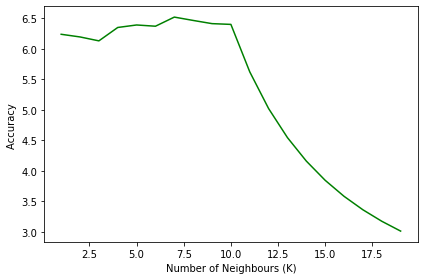

In [283]:
# Visualisation for different values of k

plt.plot(range(1,Ks),ave_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

TThe curve does not follow the expected trend neither is a elbow visible. The integrity of the data might just be inadequate to provide a good model.



>#### 3.4.3 Use Multiple Regression Model

In [284]:
# Assign the regression funtion and fit the regression line by training the data

regr=LinearRegression()
regr.fit(X_train,y_train)

# The coefficients

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [ 0.96932621 -0.0499334 ]
Intercept: 3.0235565593418184e-17


In [285]:
# Predict from the regression model

y_prediction =  regr.predict(X_test)
y_prediction

array([ 0.91939281, -0.91939281])

In [286]:
# Calculate and print the accuracgy metrices

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_prediction-y_test)**2))
print("R2-score: %.2f" % r2_score(y_prediction,y_test))

MAELR=np.mean(np.absolute(y_prediction-y_test))
R2LR=r2_score(y_prediction,y_test)
MSELR=np.mean((y_prediction-y_test)**2)

Mean absolute error: 1.92
Residual sum of squares (MSE): 3.68
R2-score: -3.36


In [288]:
# Compare the results from KNN and LR 

ModelResults={'MAE':[MAEKNN,MAELR,MAERF],'R2':[R2KNN,R2LR,R2RF],'MSE':[MSEKNN,MSELR,MSERF]}
ModelResults=pd.DataFrame(ModelResults,index=['KNN','LR','RF'])
ModelResults

MAE    R2  MSE
KNN 1.57 -1.48 2.48
LR  1.92 -3.36 3.68
RF  1.71 -2.01 3.01

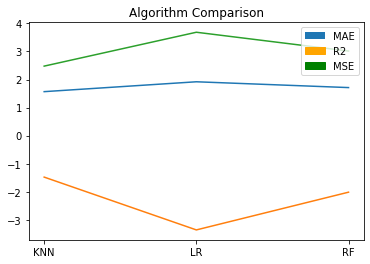

In [289]:
# Plot the comparison of the algorithms

plt.plot(ModelResults)
plt.title('Algorithm Comparison')


MAE = mpatches.Patch(label='MAE')
R2 = mpatches.Patch(color='orange', label='R2')
MSE = mpatches.Patch(color='green', label='MSE')
plt.legend(handles=[MAE,R2,MSE], loc=1)

plt.show() 

## 3.5  Putting it all together for the full data set

>To reduce the processing time, we will focus on the following countries selected by top GDP in Asia, Europe & South America and also include the USA as follow:
>- USA
>- United Kingdom
>- China
>- India
>- Germany
>- France
>- Brazil
>- Mexico

In [292]:
dfShare_Elec

country  biofuel_share_elec  coal_share_elec  fossil_share_elec  \
Year                                                                        
1900  Afghanistan                0.00             0.00               0.00   
1901  Afghanistan                0.00             0.00               0.00   
1902  Afghanistan                0.00             0.00               0.00   
1903  Afghanistan                0.00             0.00               0.00   
1904  Afghanistan                0.00             0.00               0.00   
...           ...                 ...              ...                ...   
2015     Zimbabwe                1.36            45.93              45.93   
2016     Zimbabwe                2.15            54.42              54.42   
2017     Zimbabwe                2.07            44.03              44.03   
2018     Zimbabwe                2.05            43.05              43.05   
2019     Zimbabwe                2.29            42.07              42.07   

      gas_share_elec  hydro_share_elec  nuclear_share_elec  oil_share_elec  \
Year                                                                         
1900            0.00              0.00                0.00            0.00   
1901            0.00              0.00                0.00            0.00   
1902            0.00              0.00                0.00            0.00   
1903            0.00              0.00                0.00            0.00   
1904            0.00              0.00                0.00            0.00   
...              ...               ...                 ...             ...   
2015            0.00             52.62                0.00            0.00   
2016            0.00             43.29                0.00            0.00   
2017            0.00             53.75                0.00            0.00   
2018            0.00             54.75                0.00            0.00   
2019            0.00             55.49                0.00            0.00   

      other_renewables_share_elec  renewables_share_elec  solar_share_elec  \
Year                                                                         
1900                         0.00                   0.00              0.00   
1901                         0.00                   0.00              0.00   
1902                         0.00                   0.00              0.00   
1903                         0.00                   0.00              0.00   
1904                         0.00                   0.00              0.00   
...                           ...                    ...               ...   
2015                         1.36                  54.07              0.09   
2016                         2.15                  45.58              0.13   
2017                         2.07                  55.97              0.15   
2018                         2.05                  56.95              0.15   
2019                         2.29                  57.93              0.15   

      wind_share_elec  
Year                   
1900             0.00  
1901             0.00  
1902             0.00  
1903             0.00  
1904             0.00  
...               ...  
2015             0.00  
2016             0.00  
2017             0.00  
2018             0.00  
2019             0.00  

[16036 rows x 12 columns]

 
RF: Predicted Value from model for : United States and  biofuel_share_elec
[ 2.23455949 -0.39860078]
 
country  United States  Energy Source  biofuel_share_elec MSE: 6.21
country  United States  Energy Source  biofuel_share_elec r2: -5.21
country  United States  Energy Source  biofuel_share_elec Mean absolute error: 2.32
 
KNN: Predicted Value from model for : United States and  biofuel_share_elec
[ 2.27557577 -0.42752201]
 
country  United States  Energy Source  biofuel_share_elec MSE: 6.38
country  United States  Energy Source  biofuel_share_elec r2: -5.38
country  United States  Energy Source  biofuel_share_elec Mean absolute error: 2.35
Coefficients: [ 0.96932621 -0.0499334 ]
Intercept: 3.0235565593418184e-17
 
LR: Predicted Value from model for : United States and  biofuel_share_elec
 
[ 0.91939281 -0.91939281]
 
country  United States  Energy Source  biofuel_share_elec Mean absolute error: 1.92
country  United States  Energy Source  biofuel_share_elec Residual sum of squares (M

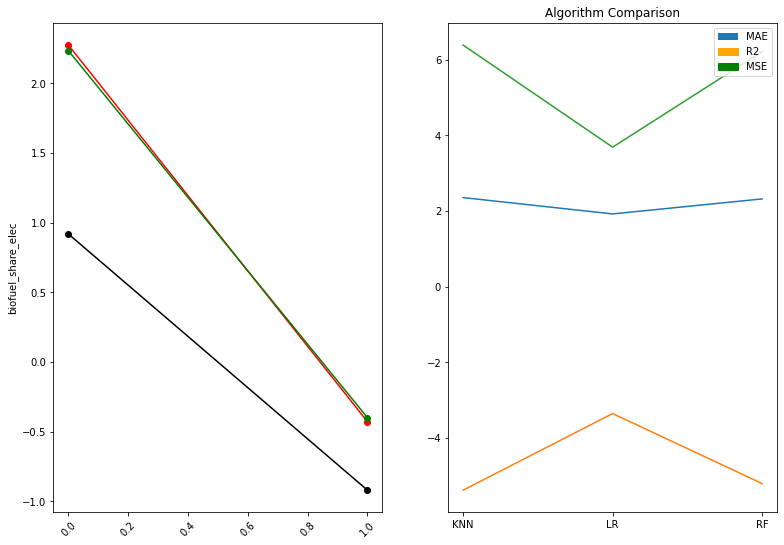

 
RF: Predicted Value from model for : United States and  coal_share_elec
[ 0.98239881 -0.5903707 ]
 
country  United States  Energy Source  coal_share_elec MSE: 0.08
country  United States  Energy Source  coal_share_elec r2: 0.92
country  United States  Energy Source  coal_share_elec Mean absolute error: 0.21
 
KNN: Predicted Value from model for : United States and  coal_share_elec
[ 1.31792929 -0.62038315]
 
country  United States  Energy Source  coal_share_elec MSE: 0.12
country  United States  Energy Source  coal_share_elec r2: 0.88
country  United States  Energy Source  coal_share_elec Mean absolute error: 0.35
Coefficients: [9.70937806e-01 3.68336928e-04]
Intercept: -2.3267252713788665e-16
 
LR: Predicted Value from model for : United States and  coal_share_elec
 
[ 0.97130614 -0.97130614]
 
country  United States  Energy Source  coal_share_elec Mean absolute error: 0.03
country  United States  Energy Source  coal_share_elec Residual sum of squares (MSE): 0.00
country  United St

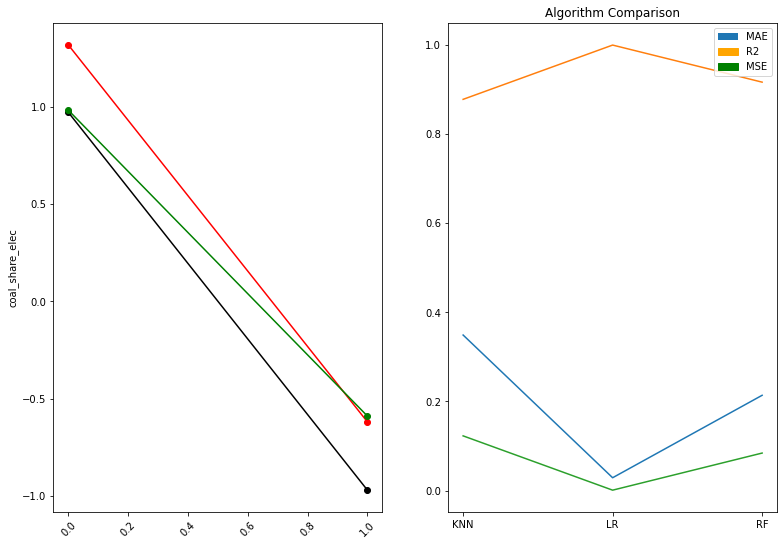

 
RF: Predicted Value from model for : United States and  fossil_share_elec
[ 1.41547953 -0.60316268]
 
country  United States  Energy Source  fossil_share_elec MSE: 0.17
country  United States  Energy Source  fossil_share_elec r2: 0.83
country  United States  Energy Source  fossil_share_elec Mean absolute error: 0.41
 
KNN: Predicted Value from model for : United States and  fossil_share_elec
[ 1.57830968 -0.63015027]
 
country  United States  Energy Source  fossil_share_elec MSE: 0.24
country  United States  Energy Source  fossil_share_elec r2: 0.76
country  United States  Energy Source  fossil_share_elec Mean absolute error: 0.47
Coefficients: [ 0.97759147 -0.00343494]
Intercept: 1.4579169361348007e-16
 
LR: Predicted Value from model for : United States and  fossil_share_elec
 
[ 0.97415654 -0.97415654]
 
country  United States  Energy Source  fossil_share_elec Mean absolute error: 0.03
country  United States  Energy Source  fossil_share_elec Residual sum of squares (MSE): 0.00
cou

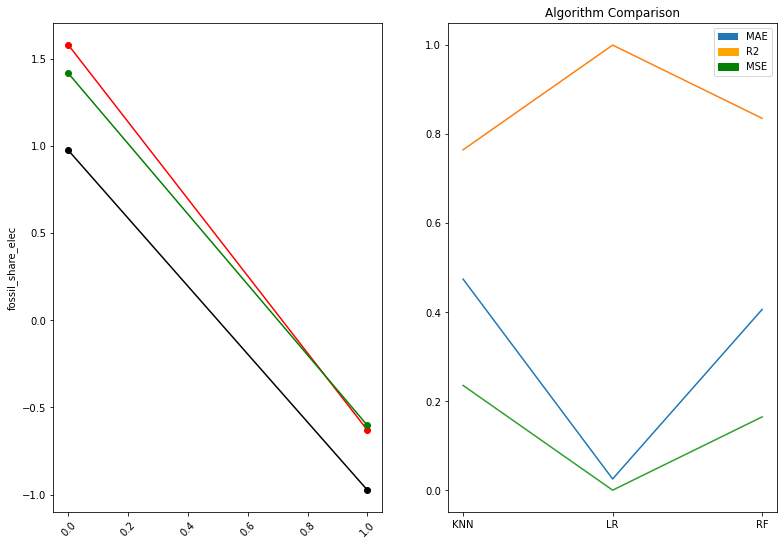

 
RF: Predicted Value from model for : United States and  gas_share_elec
[-0.56175276  1.02023202]
 
country  United States  Energy Source  gas_share_elec MSE: 0.10
country  United States  Energy Source  gas_share_elec r2: 0.90
country  United States  Energy Source  gas_share_elec Mean absolute error: 0.23
 
KNN: Predicted Value from model for : United States and  gas_share_elec
[-0.57672449  1.22631667]
 
country  United States  Energy Source  gas_share_elec MSE: 0.12
country  United States  Energy Source  gas_share_elec r2: 0.88
country  United States  Energy Source  gas_share_elec Mean absolute error: 0.32
Coefficients: [ 1.00236998 -0.03836204]
Intercept: 1.6939401759752253e-16
 
LR: Predicted Value from model for : United States and  gas_share_elec
 
[-0.96400795  0.96400795]
 
country  United States  Energy Source  gas_share_elec Mean absolute error: 0.04
country  United States  Energy Source  gas_share_elec Residual sum of squares (MSE): 0.00
country  United States  Energy Sourc

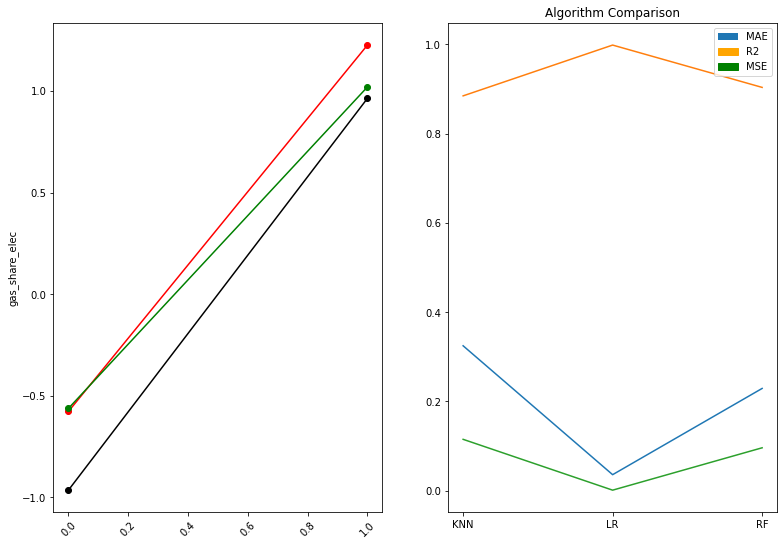

 
RF: Predicted Value from model for : United States and  hydro_share_elec
[ 1.21841093 -0.57979414]
 
country  United States  Energy Source  hydro_share_elec MSE: 3.71
country  United States  Energy Source  hydro_share_elec r2: -2.71
country  United States  Energy Source  hydro_share_elec Mean absolute error: 1.90
 
KNN: Predicted Value from model for : United States and  hydro_share_elec
[ 1.19397175 -0.61599036]
 
country  United States  Energy Source  hydro_share_elec MSE: 3.71
country  United States  Energy Source  hydro_share_elec r2: -2.71
country  United States  Energy Source  hydro_share_elec Mean absolute error: 1.90
Coefficients: [0.94895176 0.00978794]
Intercept: 1.0467069063089585e-16
 
LR: Predicted Value from model for : United States and  hydro_share_elec
 
[ 0.93916382 -0.93916382]
 
country  United States  Energy Source  hydro_share_elec Mean absolute error: 1.94
country  United States  Energy Source  hydro_share_elec Residual sum of squares (MSE): 3.76
country  Unite

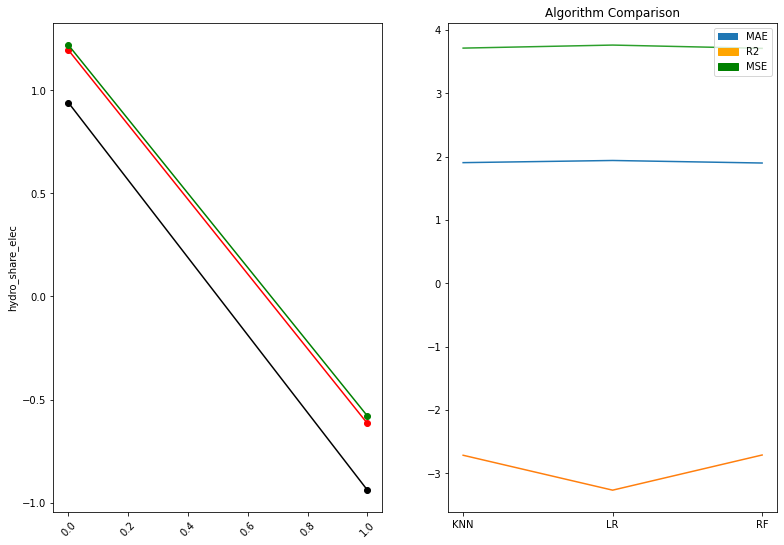

 
RF: Predicted Value from model for : United States and  nuclear_share_elec
[-0.60841191  1.37052135]
 
country  United States  Energy Source  nuclear_share_elec MSE: 0.15
country  United States  Energy Source  nuclear_share_elec r2: 0.85
country  United States  Energy Source  nuclear_share_elec Mean absolute error: 0.38
 
KNN: Predicted Value from model for : United States and  nuclear_share_elec
[-0.62906555  1.51829195]
 
country  United States  Energy Source  nuclear_share_elec MSE: 0.20
country  United States  Energy Source  nuclear_share_elec r2: 0.80
country  United States  Energy Source  nuclear_share_elec Mean absolute error: 0.44
Coefficients: [0.98428841 0.00983421]
Intercept: 2.2339765658531595e-16
 
LR: Predicted Value from model for : United States and  nuclear_share_elec
 
[-0.99412262  0.99412262]
 
country  United States  Energy Source  nuclear_share_elec Mean absolute error: 0.01
country  United States  Energy Source  nuclear_share_elec Residual sum of squares (MSE):

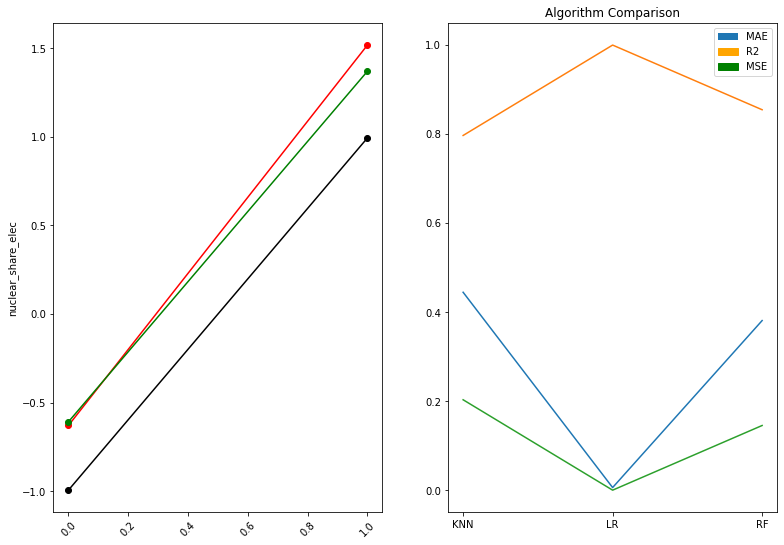

 
RF: Predicted Value from model for : United States and  oil_share_elec
[ 1.28980256 -0.50170522]
 
country  United States  Energy Source  oil_share_elec MSE: 0.17
country  United States  Energy Source  oil_share_elec r2: 0.83
country  United States  Energy Source  oil_share_elec Mean absolute error: 0.39
 
KNN: Predicted Value from model for : United States and  oil_share_elec
[ 1.63949122 -0.5403542 ]
 
country  United States  Energy Source  oil_share_elec MSE: 0.31
country  United States  Energy Source  oil_share_elec r2: 0.69
country  United States  Energy Source  oil_share_elec Mean absolute error: 0.55
Coefficients: [0.93421057 0.04877255]
Intercept: 3.5565876571823764e-17
 
LR: Predicted Value from model for : United States and  oil_share_elec
 
[ 0.98298313 -0.98298313]
 
country  United States  Energy Source  oil_share_elec Mean absolute error: 0.02
country  United States  Energy Source  oil_share_elec Residual sum of squares (MSE): 0.00
country  United States  Energy Source 

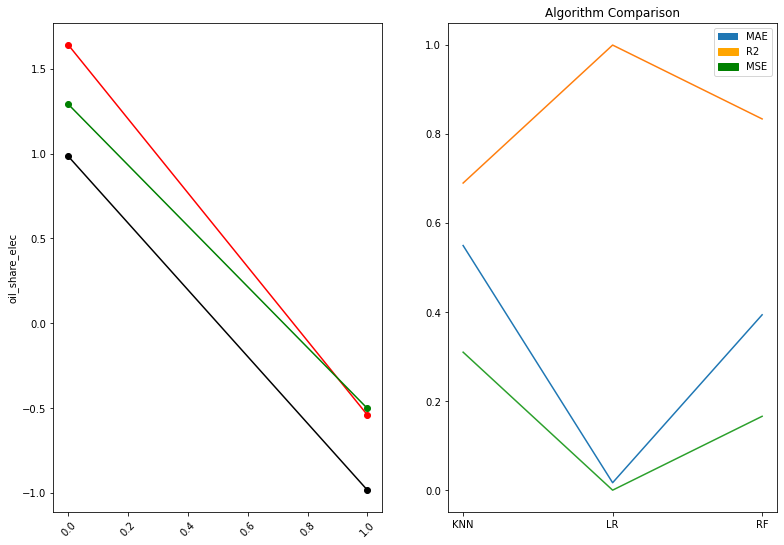

 
RF: Predicted Value from model for : United States and  other_renewables_share_elec
[ 1.23996816 -0.6070018 ]
 
country  United States  Energy Source  other_renewables_share_elec MSE: 3.80
country  United States  Energy Source  other_renewables_share_elec r2: -2.80
country  United States  Energy Source  other_renewables_share_elec Mean absolute error: 1.92
 
KNN: Predicted Value from model for : United States and  other_renewables_share_elec
[ 1.45096165 -0.62721095]
 
country  United States  Energy Source  other_renewables_share_elec MSE: 4.33
country  United States  Energy Source  other_renewables_share_elec r2: -3.33
country  United States  Energy Source  other_renewables_share_elec Mean absolute error: 2.04
Coefficients: [0.98484471 0.00258006]
Intercept: 1.2679878257469453e-16
 
LR: Predicted Value from model for : United States and  other_renewables_share_elec
 
[ 0.98742477 -0.98742477]
 
country  United States  Energy Source  other_renewables_share_elec Mean absolute error: 1

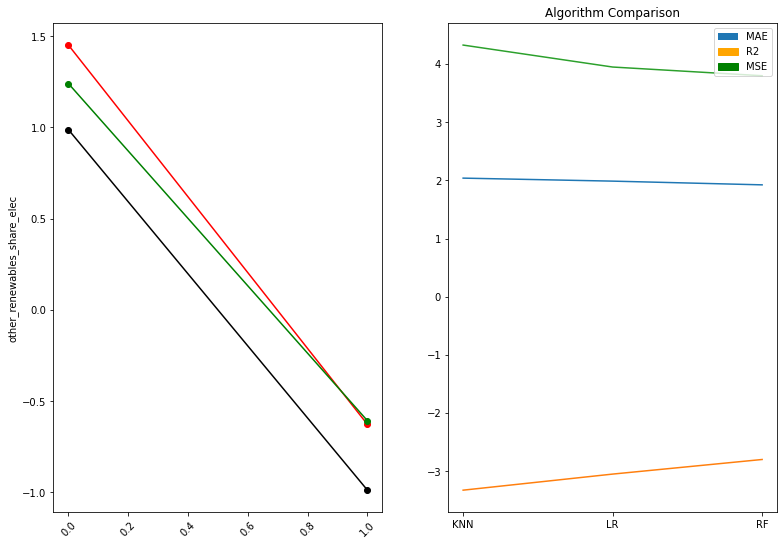

 
RF: Predicted Value from model for : United States and  renewables_share_elec
[-0.58645079  1.23957735]
 
country  United States  Energy Source  renewables_share_elec MSE: 0.11
country  United States  Energy Source  renewables_share_elec r2: 0.89
country  United States  Energy Source  renewables_share_elec Mean absolute error: 0.33
 
KNN: Predicted Value from model for : United States and  renewables_share_elec
[-0.61518482  1.39893918]
 
country  United States  Energy Source  renewables_share_elec MSE: 0.15
country  United States  Energy Source  renewables_share_elec r2: 0.85
country  United States  Energy Source  renewables_share_elec Mean absolute error: 0.39
Coefficients: [0.96674381 0.00620958]
Intercept: 6.31757239114246e-17
 
LR: Predicted Value from model for : United States and  renewables_share_elec
 
[-0.97295339  0.97295339]
 
country  United States  Energy Source  renewables_share_elec Mean absolute error: 0.03
country  United States  Energy Source  renewables_share_elec

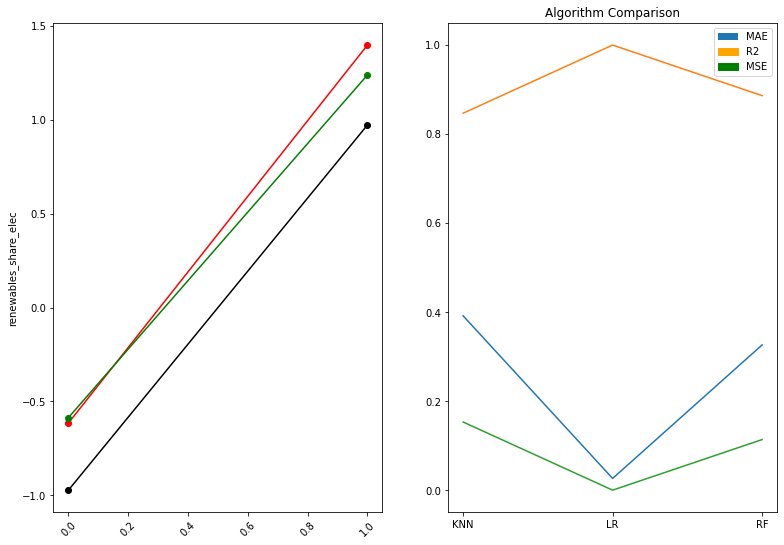

 
RF: Predicted Value from model for : United States and  solar_share_elec
[-0.20201811  1.62804317]
 
country  United States  Energy Source  solar_share_elec MSE: 0.52
country  United States  Energy Source  solar_share_elec r2: 0.48
country  United States  Energy Source  solar_share_elec Mean absolute error: 0.71
 
KNN: Predicted Value from model for : United States and  solar_share_elec
[-0.20222302  1.01784745]
 
country  United States  Energy Source  solar_share_elec MSE: 0.32
country  United States  Energy Source  solar_share_elec r2: 0.68
country  United States  Energy Source  solar_share_elec Mean absolute error: 0.41
Coefficients: [0.96533321 0.02455923]
Intercept: 2.372230323792518e-17
 
LR: Predicted Value from model for : United States and  solar_share_elec
 
[-0.98989244  0.98989244]
 
country  United States  Energy Source  solar_share_elec Mean absolute error: 0.01
country  United States  Energy Source  solar_share_elec Residual sum of squares (MSE): 0.00
country  United S

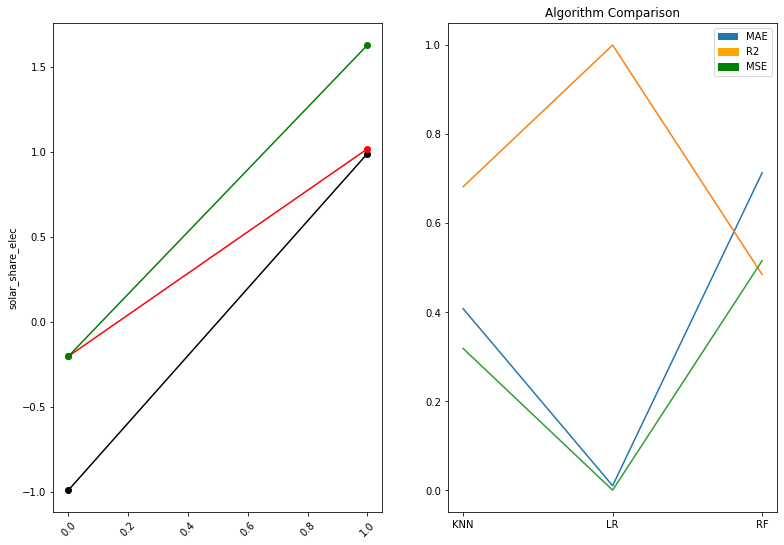

 
RF: Predicted Value from model for : United States and  wind_share_elec
[-0.31417115  1.00824596]
 
country  United States  Energy Source  wind_share_elec MSE: 0.24
country  United States  Energy Source  wind_share_elec r2: 0.76
country  United States  Energy Source  wind_share_elec Mean absolute error: 0.35
 
KNN: Predicted Value from model for : United States and  wind_share_elec
[-0.314905    0.44810408]
 
country  United States  Energy Source  wind_share_elec MSE: 0.39
country  United States  Energy Source  wind_share_elec r2: 0.61
country  United States  Energy Source  wind_share_elec Mean absolute error: 0.62
Coefficients: [0.941962   0.06256322]
Intercept: -3.595770690060262e-17
 
LR: Predicted Value from model for : United States and  wind_share_elec
 
[-1.00452521  1.00452521]
 
country  United States  Energy Source  wind_share_elec Mean absolute error: 0.00
country  United States  Energy Source  wind_share_elec Residual sum of squares (MSE): 0.00
country  United States  Ene

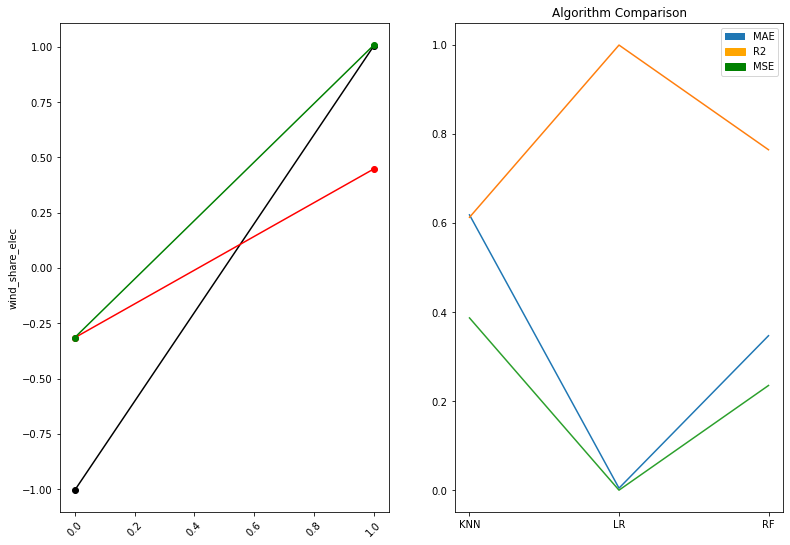

 
RF: Predicted Value from model for : United Kingdom and  biofuel_share_elec
[-0.00340373  0.65642173]
 
country  United Kingdom  Energy Source  biofuel_share_elec MSE: 0.56
country  United Kingdom  Energy Source  biofuel_share_elec r2: 0.44
country  United Kingdom  Energy Source  biofuel_share_elec Mean absolute error: 0.67
 
KNN: Predicted Value from model for : United Kingdom and  biofuel_share_elec
[-0.3439131  0.9357382]
 
country  United Kingdom  Energy Source  biofuel_share_elec MSE: 0.22
country  United Kingdom  Energy Source  biofuel_share_elec r2: 0.78
country  United Kingdom  Energy Source  biofuel_share_elec Mean absolute error: 0.36
Coefficients: [0.95140799 0.05341091]
Intercept: -7.090439151087024e-17
 
LR: Predicted Value from model for : United Kingdom and  biofuel_share_elec
 
[-0.89799708  0.89799708]
 
country  United Kingdom  Energy Source  biofuel_share_elec Mean absolute error: 0.10
country  United Kingdom  Energy Source  biofuel_share_elec Residual sum of squar

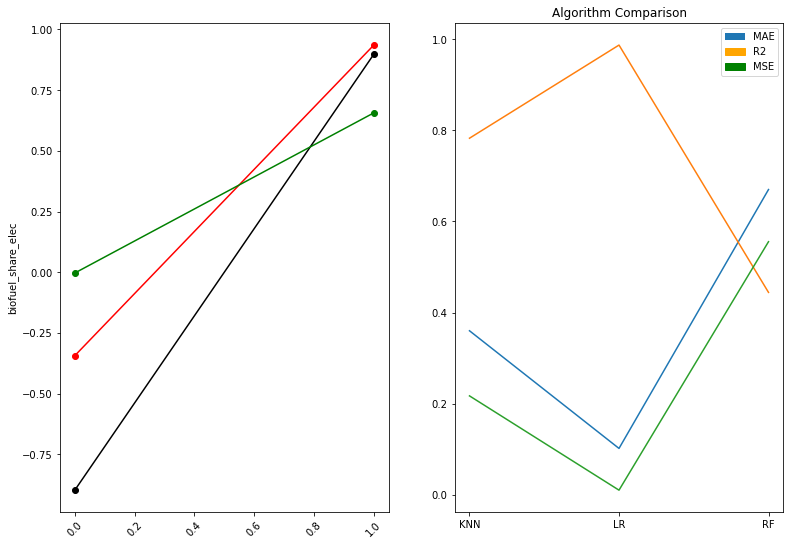

 
RF: Predicted Value from model for : United Kingdom and  coal_share_elec
[ 1.14419667 -0.41747845]
 
country  United Kingdom  Energy Source  coal_share_elec MSE: 0.18
country  United Kingdom  Energy Source  coal_share_elec r2: 0.82
country  United Kingdom  Energy Source  coal_share_elec Mean absolute error: 0.36
 
KNN: Predicted Value from model for : United Kingdom and  coal_share_elec
[ 1.1237175  -0.57099349]
 
country  United Kingdom  Energy Source  coal_share_elec MSE: 0.10
country  United Kingdom  Energy Source  coal_share_elec r2: 0.90
country  United Kingdom  Energy Source  coal_share_elec Mean absolute error: 0.28
Coefficients: [0.94608371 0.06054174]
Intercept: -4.6898696514721464e-17
 
LR: Predicted Value from model for : United Kingdom and  coal_share_elec
 
[ 1.00662545 -1.00662545]
 
country  United Kingdom  Energy Source  coal_share_elec Mean absolute error: 0.01
country  United Kingdom  Energy Source  coal_share_elec Residual sum of squares (MSE): 0.00
country  United

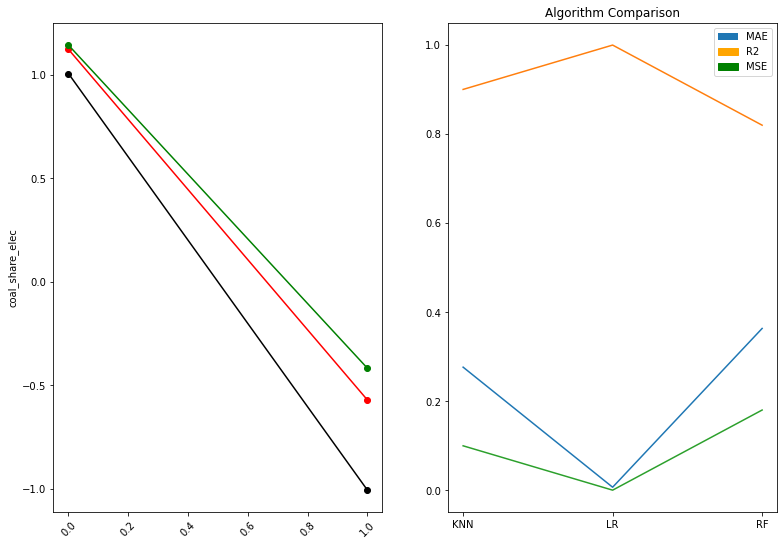

 
RF: Predicted Value from model for : United Kingdom and  fossil_share_elec
[ 1.02622403 -0.59845616]
 
country  United Kingdom  Energy Source  fossil_share_elec MSE: 0.08
country  United Kingdom  Energy Source  fossil_share_elec r2: 0.92
country  United Kingdom  Energy Source  fossil_share_elec Mean absolute error: 0.21
 
KNN: Predicted Value from model for : United Kingdom and  fossil_share_elec
[ 1.16860223 -0.62612094]
 
country  United Kingdom  Energy Source  fossil_share_elec MSE: 0.08
country  United Kingdom  Energy Source  fossil_share_elec r2: 0.92
country  United Kingdom  Energy Source  fossil_share_elec Mean absolute error: 0.27
Coefficients: [0.9741529 0.0071502]
Intercept: 6.24484417549305e-17
 
LR: Predicted Value from model for : United Kingdom and  fossil_share_elec
 
[ 0.9670027 -0.9670027]
 
country  United Kingdom  Energy Source  fossil_share_elec Mean absolute error: 0.03
country  United Kingdom  Energy Source  fossil_share_elec Residual sum of squares (MSE): 0.00


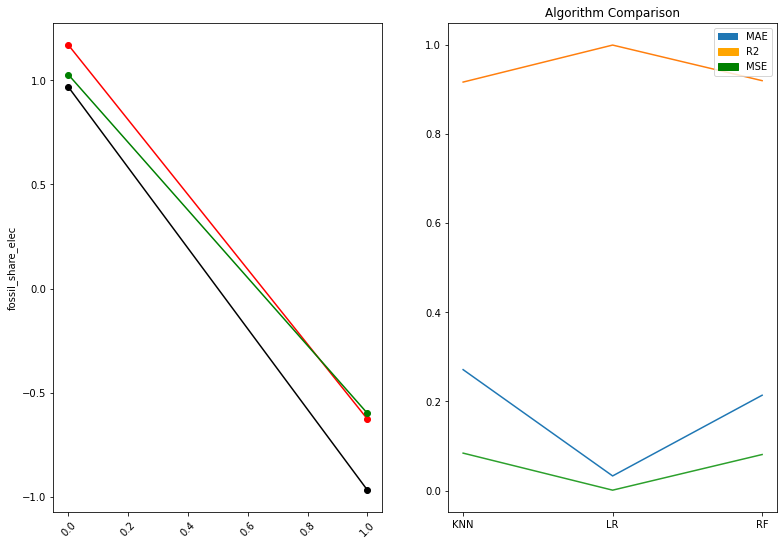

 
RF: Predicted Value from model for : United Kingdom and  gas_share_elec
[-0.50232087  1.39001637]
 
country  United Kingdom  Energy Source  gas_share_elec MSE: 3.98
country  United Kingdom  Energy Source  gas_share_elec r2: -2.98
country  United Kingdom  Energy Source  gas_share_elec Mean absolute error: 1.95
 
KNN: Predicted Value from model for : United Kingdom and  gas_share_elec
[-0.4887426   1.26374042]
 
country  United Kingdom  Energy Source  gas_share_elec MSE: 3.67
country  United Kingdom  Energy Source  gas_share_elec r2: -2.67
country  United Kingdom  Energy Source  gas_share_elec Mean absolute error: 1.88
Coefficients: [0.9780363  0.03614839]
Intercept: 1.8277655750407367e-16
 
LR: Predicted Value from model for : United Kingdom and  gas_share_elec
 
[-1.01418469  1.01418469]
 
country  United Kingdom  Energy Source  gas_share_elec Mean absolute error: 2.01
country  United Kingdom  Energy Source  gas_share_elec Residual sum of squares (MSE): 4.06
country  United Kingdom  

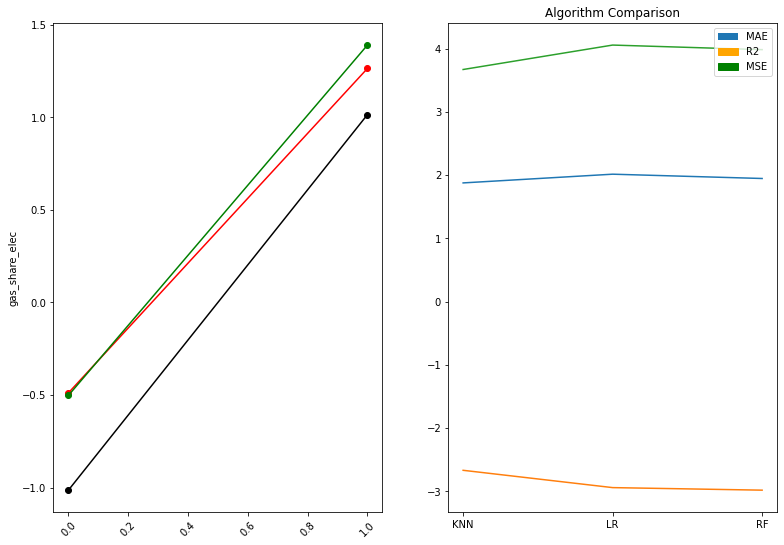

 
RF: Predicted Value from model for : United Kingdom and  hydro_share_elec
[-0.59401366  1.14395109]
 
country  United Kingdom  Energy Source  hydro_share_elec MSE: 0.09
country  United Kingdom  Energy Source  hydro_share_elec r2: 0.91
country  United Kingdom  Energy Source  hydro_share_elec Mean absolute error: 0.27
 
KNN: Predicted Value from model for : United Kingdom and  hydro_share_elec
[-0.61836818  1.30794704]
 
country  United Kingdom  Energy Source  hydro_share_elec MSE: 0.12
country  United Kingdom  Energy Source  hydro_share_elec r2: 0.88
country  United Kingdom  Energy Source  hydro_share_elec Mean absolute error: 0.34
Coefficients: [ 0.96924891 -0.0552222 ]
Intercept: 2.0141798972361415e-16
 
LR: Predicted Value from model for : United Kingdom and  hydro_share_elec
 
[-0.91402672  0.91402672]
 
country  United Kingdom  Energy Source  hydro_share_elec Mean absolute error: 0.09
country  United Kingdom  Energy Source  hydro_share_elec Residual sum of squares (MSE): 0.01
cou

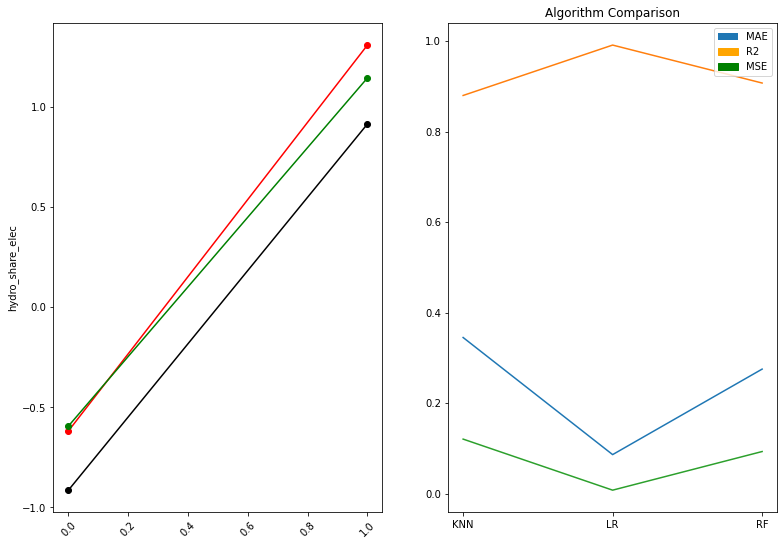

 
RF: Predicted Value from model for : United Kingdom and  nuclear_share_elec
[ 1.24229536 -0.5951456 ]
 
country  United Kingdom  Energy Source  nuclear_share_elec MSE: 0.11
country  United Kingdom  Energy Source  nuclear_share_elec r2: 0.89
country  United Kingdom  Energy Source  nuclear_share_elec Mean absolute error: 0.32
 
KNN: Predicted Value from model for : United Kingdom and  nuclear_share_elec
[ 1.52301298 -0.61934741]
 
country  United Kingdom  Energy Source  nuclear_share_elec MSE: 0.21
country  United Kingdom  Energy Source  nuclear_share_elec r2: 0.79
country  United Kingdom  Energy Source  nuclear_share_elec Mean absolute error: 0.45
Coefficients: [ 0.97819637 -0.0101068 ]
Intercept: 3.529217134058749e-16
 
LR: Predicted Value from model for : United Kingdom and  nuclear_share_elec
 
[ 0.96808957 -0.96808957]
 
country  United Kingdom  Energy Source  nuclear_share_elec Mean absolute error: 0.03
country  United Kingdom  Energy Source  nuclear_share_elec Residual sum of sq

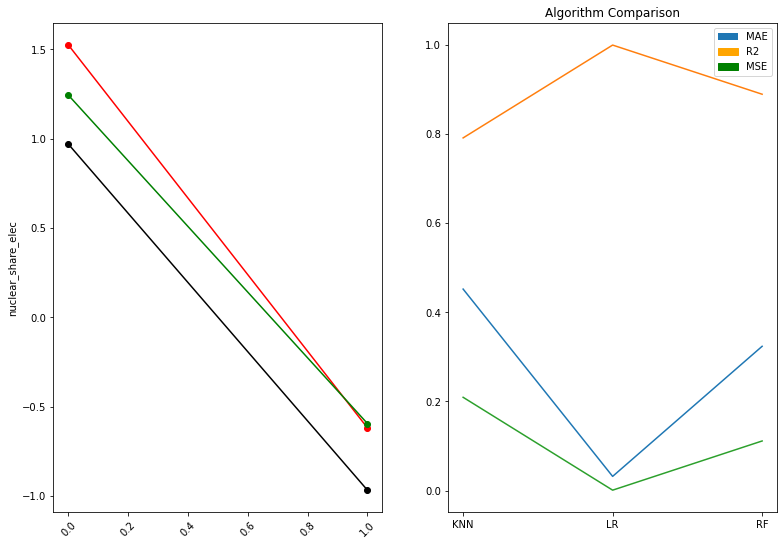

 
RF: Predicted Value from model for : United Kingdom and  oil_share_elec
[-0.39120927  0.93311582]
 
country  United Kingdom  Energy Source  oil_share_elec MSE: 0.19
country  United Kingdom  Energy Source  oil_share_elec r2: 0.81
country  United Kingdom  Energy Source  oil_share_elec Mean absolute error: 0.34
 
KNN: Predicted Value from model for : United Kingdom and  oil_share_elec
[-0.45869595  0.58124074]
 
country  United Kingdom  Energy Source  oil_share_elec MSE: 0.23
country  United Kingdom  Energy Source  oil_share_elec r2: 0.77
country  United Kingdom  Energy Source  oil_share_elec Mean absolute error: 0.48
Coefficients: [ 0.85740004 -0.11461548]
Intercept: -3.8237843139133417e-17
 
LR: Predicted Value from model for : United Kingdom and  oil_share_elec
 
[-0.74278456  0.74278456]
 
country  United Kingdom  Energy Source  oil_share_elec Mean absolute error: 0.26
country  United Kingdom  Energy Source  oil_share_elec Residual sum of squares (MSE): 0.07
country  United Kingdom 

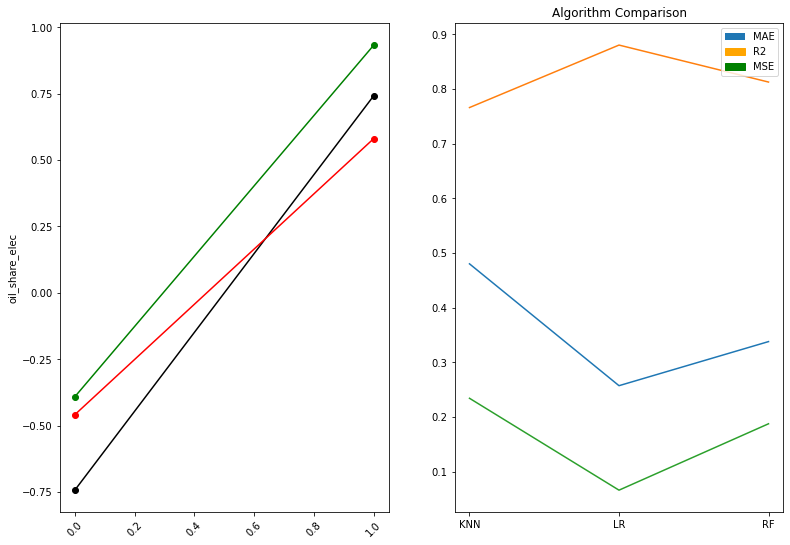

 
RF: Predicted Value from model for : United Kingdom and  other_renewables_share_elec
[-0.21465816  1.00179336]
 
country  United Kingdom  Energy Source  other_renewables_share_elec MSE: 0.31
country  United Kingdom  Energy Source  other_renewables_share_elec r2: 0.69
country  United Kingdom  Energy Source  other_renewables_share_elec Mean absolute error: 0.39
 
KNN: Predicted Value from model for : United Kingdom and  other_renewables_share_elec
[-0.08091195  0.74682325]
 
country  United Kingdom  Energy Source  other_renewables_share_elec MSE: 0.45
country  United Kingdom  Energy Source  other_renewables_share_elec r2: 0.55
country  United Kingdom  Energy Source  other_renewables_share_elec Mean absolute error: 0.59
Coefficients: [0.94016564 0.06680517]
Intercept: 2.183053004452506e-16
 
LR: Predicted Value from model for : United Kingdom and  other_renewables_share_elec
 
[-0.87336046  0.87336046]
 
country  United Kingdom  Energy Source  other_renewables_share_elec Mean absolute e

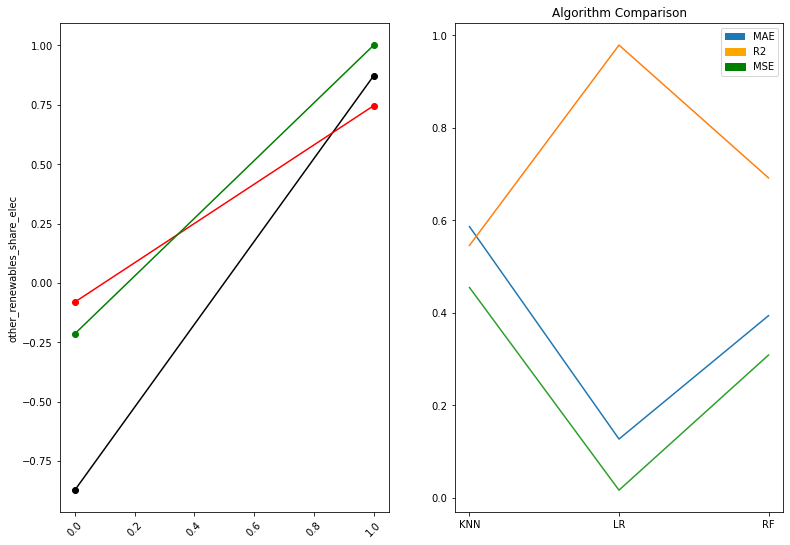

 
RF: Predicted Value from model for : United Kingdom and  renewables_share_elec
[-0.36075185  0.9783329 ]
 
country  United Kingdom  Energy Source  renewables_share_elec MSE: 0.20
country  United Kingdom  Energy Source  renewables_share_elec r2: 0.80
country  United Kingdom  Energy Source  renewables_share_elec Mean absolute error: 0.33
 
KNN: Predicted Value from model for : United Kingdom and  renewables_share_elec
[0.00280186 0.45318886]
 
country  United Kingdom  Energy Source  renewables_share_elec MSE: 0.65
country  United Kingdom  Energy Source  renewables_share_elec r2: 0.35
country  United Kingdom  Energy Source  renewables_share_elec Mean absolute error: 0.77
Coefficients: [ 1.0179072  -0.03178352]
Intercept: -6.358411458304632e-17
 
LR: Predicted Value from model for : United Kingdom and  renewables_share_elec
 
[-1.04969072  1.04969072]
 
country  United Kingdom  Energy Source  renewables_share_elec Mean absolute error: 0.05
country  United Kingdom  Energy Source  renewabl

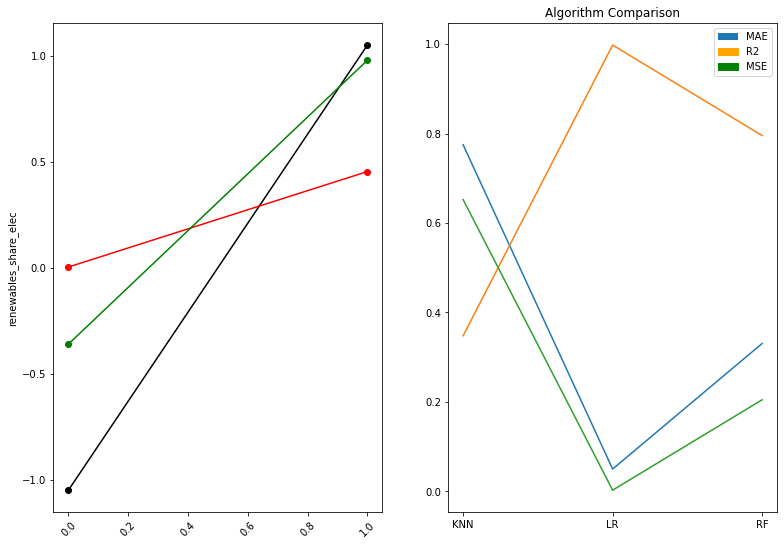

 
RF: Predicted Value from model for : United Kingdom and  solar_share_elec
[0.51695874 0.59310018]
 
country  United Kingdom  Energy Source  solar_share_elec MSE: 1.23
country  United Kingdom  Energy Source  solar_share_elec r2: -0.23
country  United Kingdom  Energy Source  solar_share_elec Mean absolute error: 0.96
 
KNN: Predicted Value from model for : United Kingdom and  solar_share_elec
[ 0.00400859 -0.18551233]
 
country  United Kingdom  Energy Source  solar_share_elec MSE: 1.21
country  United Kingdom  Energy Source  solar_share_elec r2: -0.21
country  United Kingdom  Energy Source  solar_share_elec Mean absolute error: 1.09
Coefficients: [0.47316905 0.52834467]
Intercept: -4.8753024379580534e-17
 
LR: Predicted Value from model for : United Kingdom and  solar_share_elec
 
[ 0.05517562 -0.05517562]
 
country  United Kingdom  Energy Source  solar_share_elec Mean absolute error: 1.06
country  United Kingdom  Energy Source  solar_share_elec Residual sum of squares (MSE): 1.11
coun

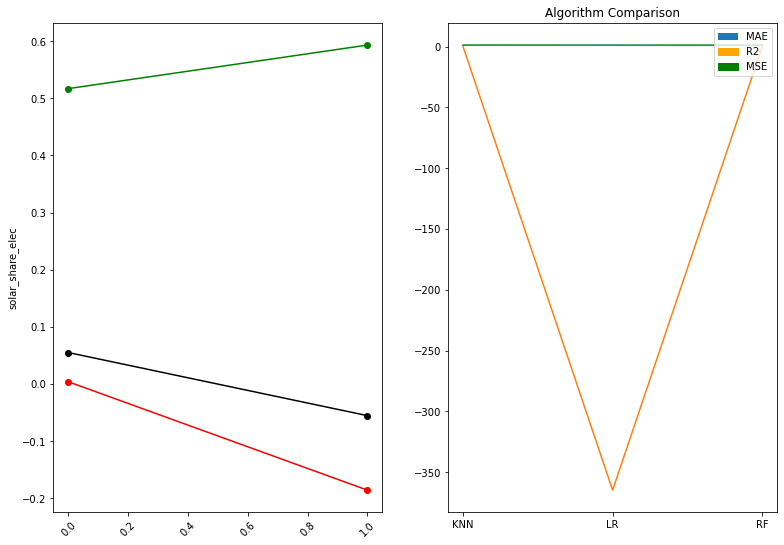

 
RF: Predicted Value from model for : United Kingdom and  wind_share_elec
[-0.2828361   0.91586343]
 
country  United Kingdom  Energy Source  wind_share_elec MSE: 0.26
country  United Kingdom  Energy Source  wind_share_elec r2: 0.74
country  United Kingdom  Energy Source  wind_share_elec Mean absolute error: 0.40
 
KNN: Predicted Value from model for : United Kingdom and  wind_share_elec
[-0.28285135  0.81460107]
 
country  United Kingdom  Energy Source  wind_share_elec MSE: 0.27
country  United Kingdom  Energy Source  wind_share_elec r2: 0.73
country  United Kingdom  Energy Source  wind_share_elec Mean absolute error: 0.45
Coefficients: [ 1.05644856 -0.09993411]
Intercept: -1.4682702760779634e-17
 
LR: Predicted Value from model for : United Kingdom and  wind_share_elec
 
[-0.95651445  0.95651445]
 
country  United Kingdom  Energy Source  wind_share_elec Mean absolute error: 0.04
country  United Kingdom  Energy Source  wind_share_elec Residual sum of squares (MSE): 0.00
country  Unit

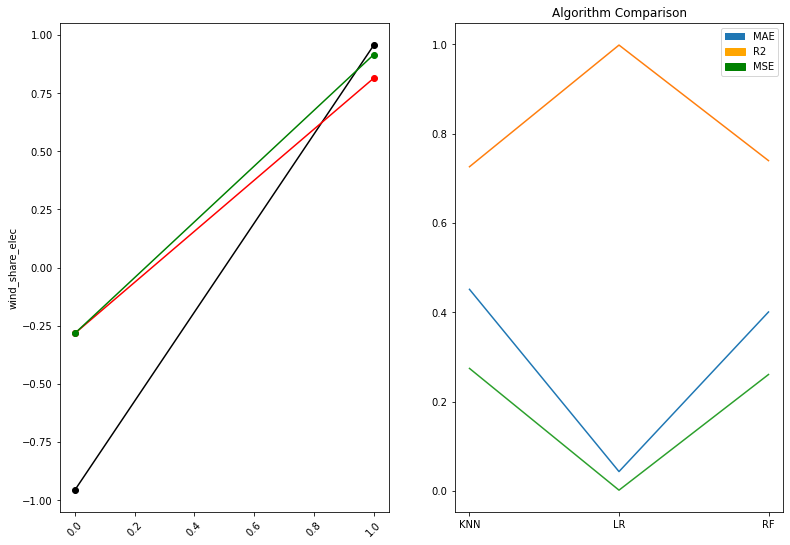

 
RF: Predicted Value from model for : China and  biofuel_share_elec
[-0.22957877  0.77261822]
 
country  China  Energy Source  biofuel_share_elec MSE: 0.32
country  China  Energy Source  biofuel_share_elec r2: 0.68
country  China  Energy Source  biofuel_share_elec Mean absolute error: 0.50
 
KNN: Predicted Value from model for : China and  biofuel_share_elec
[-0.32055836  0.83026214]
 
country  China  Energy Source  biofuel_share_elec MSE: 0.25
country  China  Energy Source  biofuel_share_elec r2: 0.75
country  China  Energy Source  biofuel_share_elec Mean absolute error: 0.42
Coefficients: [ 1.03506259 -0.08177838]
Intercept: 5.57438978348047e-17
 
LR: Predicted Value from model for : China and  biofuel_share_elec
 
[-0.95328421  0.95328421]
 
country  China  Energy Source  biofuel_share_elec Mean absolute error: 0.05
country  China  Energy Source  biofuel_share_elec Residual sum of squares (MSE): 0.00
country  China  Energy Source  biofuel_share_elec R2-score: 1.00
     MAE   R2  MS

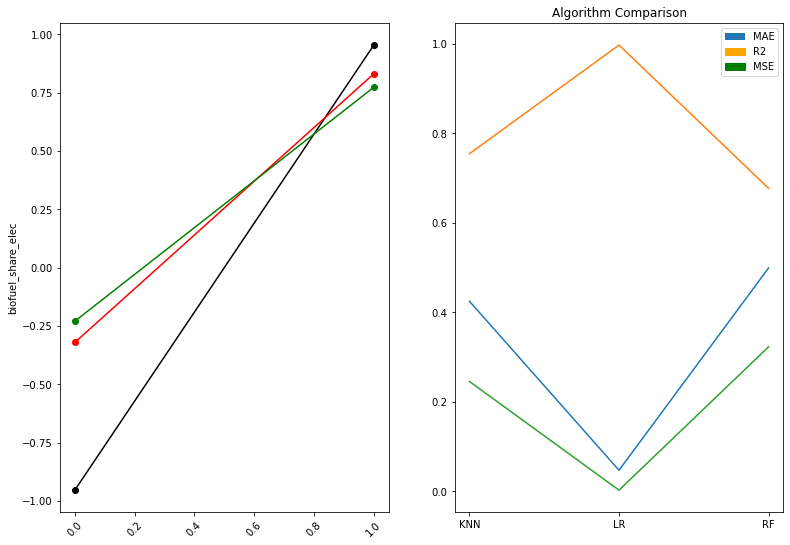

 
RF: Predicted Value from model for : China and  coal_share_elec
[ 1.36395845 -0.60651599]
 
country  China  Energy Source  coal_share_elec MSE: 0.14
country  China  Energy Source  coal_share_elec r2: 0.86
country  China  Energy Source  coal_share_elec Mean absolute error: 0.38
 
KNN: Predicted Value from model for : China and  coal_share_elec
[ 1.52845581 -0.62881032]
 
country  China  Energy Source  coal_share_elec MSE: 0.21
country  China  Energy Source  coal_share_elec r2: 0.79
country  China  Energy Source  coal_share_elec Mean absolute error: 0.45
Coefficients: [0.98298028 0.00907358]
Intercept: 9.241489048967827e-17
 
LR: Predicted Value from model for : China and  coal_share_elec
 
[ 0.99205386 -0.99205386]
 
country  China  Energy Source  coal_share_elec Mean absolute error: 0.01
country  China  Energy Source  coal_share_elec Residual sum of squares (MSE): 0.00
country  China  Energy Source  coal_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.45 0.79 0.21
LR  0.01 1.00 0.

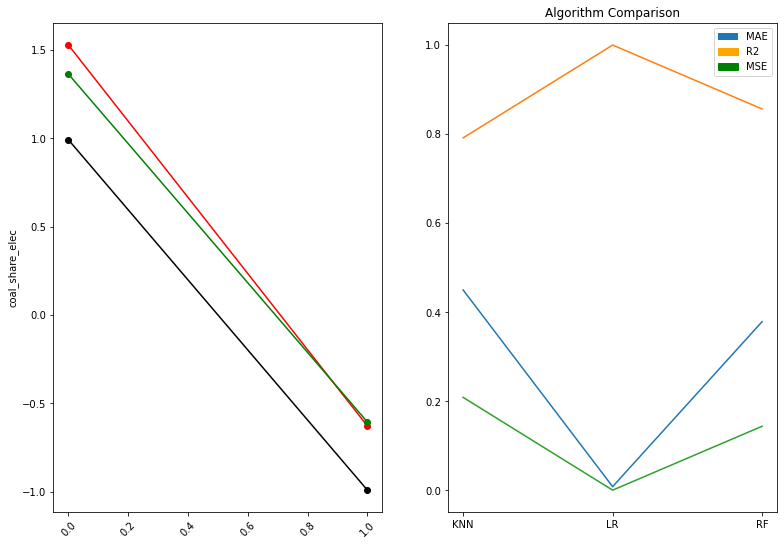

 
RF: Predicted Value from model for : China and  fossil_share_elec
[ 1.35356598 -0.60453524]
 
country  China  Energy Source  fossil_share_elec MSE: 0.14
country  China  Energy Source  fossil_share_elec r2: 0.86
country  China  Energy Source  fossil_share_elec Mean absolute error: 0.37
 
KNN: Predicted Value from model for : China and  fossil_share_elec
[ 1.61135108 -0.62982535]
 
country  China  Energy Source  fossil_share_elec MSE: 0.26
country  China  Energy Source  fossil_share_elec r2: 0.74
country  China  Energy Source  fossil_share_elec Mean absolute error: 0.49
Coefficients: [0.97922241 0.00446169]
Intercept: 1.2851677843284632e-16
 
LR: Predicted Value from model for : China and  fossil_share_elec
 
[ 0.98368409 -0.98368409]
 
country  China  Energy Source  fossil_share_elec Mean absolute error: 0.02
country  China  Energy Source  fossil_share_elec Residual sum of squares (MSE): 0.00
country  China  Energy Source  fossil_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.49 0

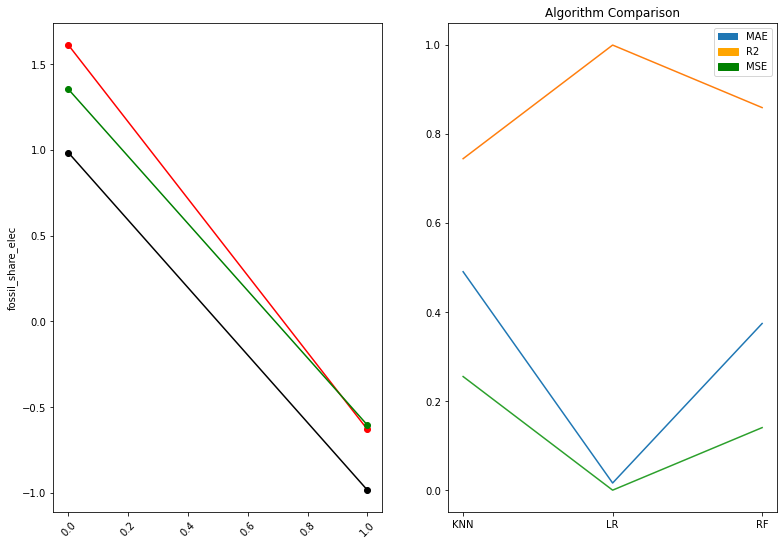

 
RF: Predicted Value from model for : China and  gas_share_elec
[-0.47460177  0.19525   ]
 
country  China  Energy Source  gas_share_elec MSE: 0.46
country  China  Energy Source  gas_share_elec r2: 0.54
country  China  Energy Source  gas_share_elec Mean absolute error: 0.67
 
KNN: Predicted Value from model for : China and  gas_share_elec
[-0.48528825  0.0829419 ]
 
country  China  Energy Source  gas_share_elec MSE: 0.55
country  China  Energy Source  gas_share_elec r2: 0.45
country  China  Energy Source  gas_share_elec Mean absolute error: 0.72
Coefficients: [ 0.99564943 -0.03302571]
Intercept: 2.170579014854135e-17
 
LR: Predicted Value from model for : China and  gas_share_elec
 
[-0.96262372  0.96262372]
 
country  China  Energy Source  gas_share_elec Mean absolute error: 0.04
country  China  Energy Source  gas_share_elec Residual sum of squares (MSE): 0.00
country  China  Energy Source  gas_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.72 0.45 0.55
LR  0.04 1.00 0.00
RF  0.6

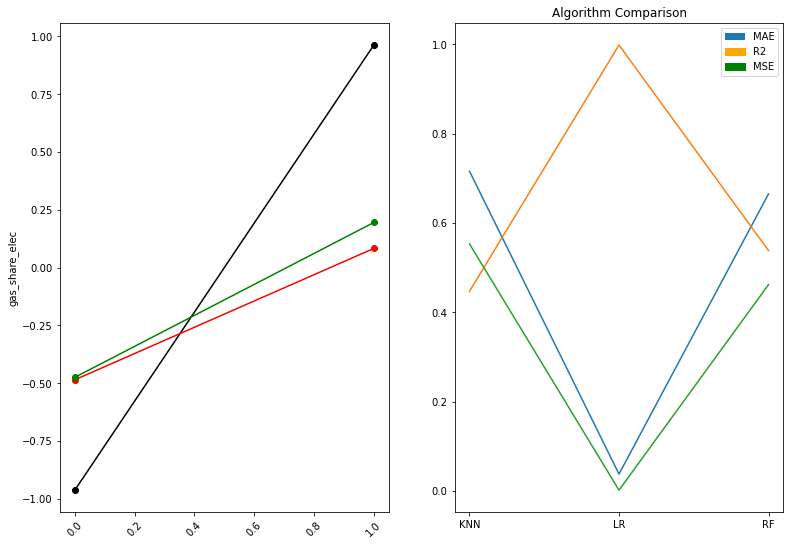

 
RF: Predicted Value from model for : China and  hydro_share_elec
[-0.59249946  1.3844659 ]
 
country  China  Energy Source  hydro_share_elec MSE: 0.16
country  China  Energy Source  hydro_share_elec r2: 0.84
country  China  Energy Source  hydro_share_elec Mean absolute error: 0.40
 
KNN: Predicted Value from model for : China and  hydro_share_elec
[-0.62521203  1.46599219]
 
country  China  Energy Source  hydro_share_elec MSE: 0.18
country  China  Energy Source  hydro_share_elec r2: 0.82
country  China  Energy Source  hydro_share_elec Mean absolute error: 0.42
Coefficients: [ 0.96649128 -0.0202413 ]
Intercept: 1.7980199220834133e-16
 
LR: Predicted Value from model for : China and  hydro_share_elec
 
[-0.94624998  0.94624998]
 
country  China  Energy Source  hydro_share_elec Mean absolute error: 0.05
country  China  Energy Source  hydro_share_elec Residual sum of squares (MSE): 0.00
country  China  Energy Source  hydro_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.42 0.82 0.18
L

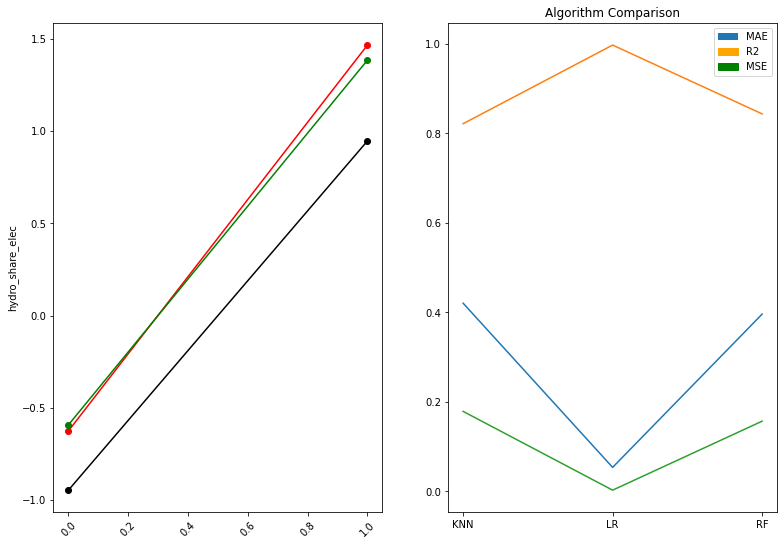

 
RF: Predicted Value from model for : China and  nuclear_share_elec
[-0.47351065  1.25015178]
 
country  China  Energy Source  nuclear_share_elec MSE: 0.17
country  China  Energy Source  nuclear_share_elec r2: 0.83
country  China  Energy Source  nuclear_share_elec Mean absolute error: 0.39
 
KNN: Predicted Value from model for : China and  nuclear_share_elec
[-0.47631865  1.3233299 ]
 
country  China  Energy Source  nuclear_share_elec MSE: 0.19
country  China  Energy Source  nuclear_share_elec r2: 0.81
country  China  Energy Source  nuclear_share_elec Mean absolute error: 0.42
Coefficients: [0.97008372 0.02234239]
Intercept: -1.4180963156497266e-16
 
LR: Predicted Value from model for : China and  nuclear_share_elec
 
[-0.99242611  0.99242611]
 
country  China  Energy Source  nuclear_share_elec Mean absolute error: 0.01
country  China  Energy Source  nuclear_share_elec Residual sum of squares (MSE): 0.00
country  China  Energy Source  nuclear_share_elec R2-score: 1.00
     MAE   R2  M

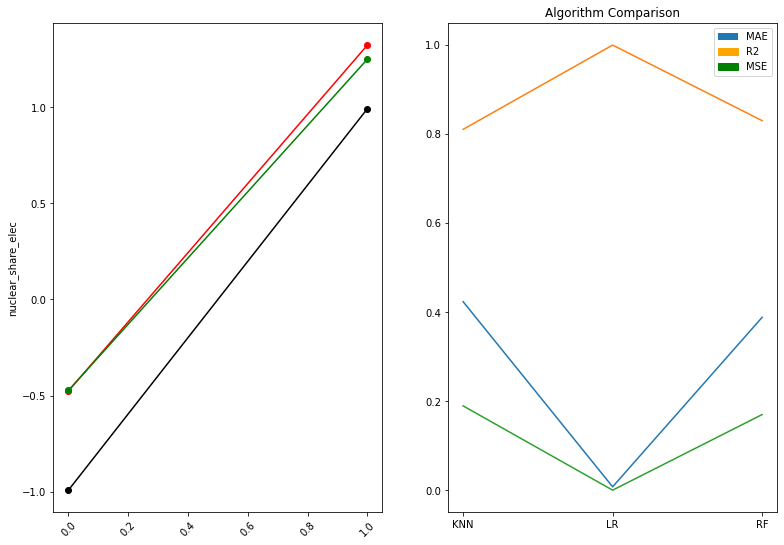

 
RF: Predicted Value from model for : China and  oil_share_elec
[-0.38435376  0.60171222]
 
country  China  Energy Source  oil_share_elec MSE: 0.27
country  China  Energy Source  oil_share_elec r2: 0.73
country  China  Energy Source  oil_share_elec Mean absolute error: 0.51
 
KNN: Predicted Value from model for : China and  oil_share_elec
[-0.45840951  0.64369143]
 
country  China  Energy Source  oil_share_elec MSE: 0.21
country  China  Energy Source  oil_share_elec r2: 0.79
country  China  Energy Source  oil_share_elec Mean absolute error: 0.45
Coefficients: [ 0.88870837 -0.02736786]
Intercept: -1.486839594331221e-17
 
LR: Predicted Value from model for : China and  oil_share_elec
 
[-0.86134051  0.86134051]
 
country  China  Energy Source  oil_share_elec Mean absolute error: 0.14
country  China  Energy Source  oil_share_elec Residual sum of squares (MSE): 0.02
country  China  Energy Source  oil_share_elec R2-score: 0.97
     MAE   R2  MSE
KNN 0.45 0.79 0.21
LR  0.14 0.97 0.02
RF  0.

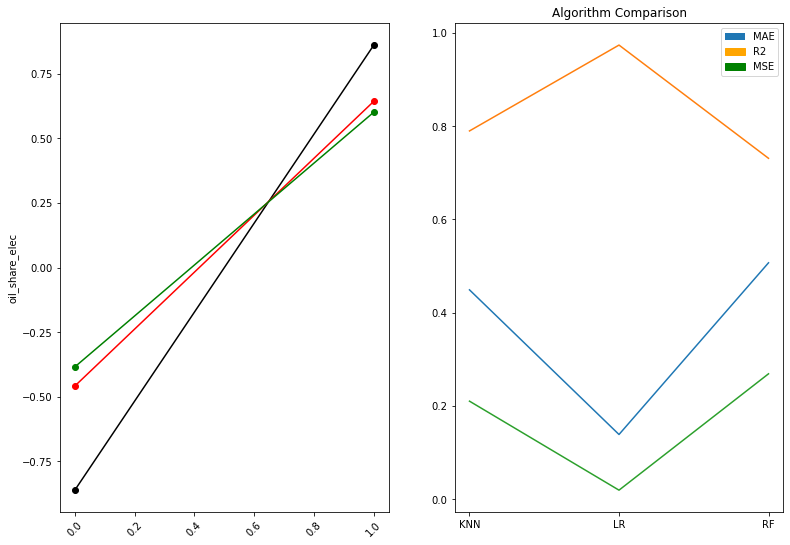

 
RF: Predicted Value from model for : China and  other_renewables_share_elec
[-0.28895385  0.61283792]
 
country  China  Energy Source  other_renewables_share_elec MSE: 0.33
country  China  Energy Source  other_renewables_share_elec r2: 0.67
country  China  Energy Source  other_renewables_share_elec Mean absolute error: 0.55
 
KNN: Predicted Value from model for : China and  other_renewables_share_elec
[-0.36595252  0.95763018]
 
country  China  Energy Source  other_renewables_share_elec MSE: 0.20
country  China  Energy Source  other_renewables_share_elec r2: 0.80
country  China  Energy Source  other_renewables_share_elec Mean absolute error: 0.34
Coefficients: [ 1.03855772 -0.10783595]
Intercept: 2.1841861771765186e-18
 
LR: Predicted Value from model for : China and  other_renewables_share_elec
 
[-0.93072177  0.93072177]
 
country  China  Energy Source  other_renewables_share_elec Mean absolute error: 0.07
country  China  Energy Source  other_renewables_share_elec Residual sum of s

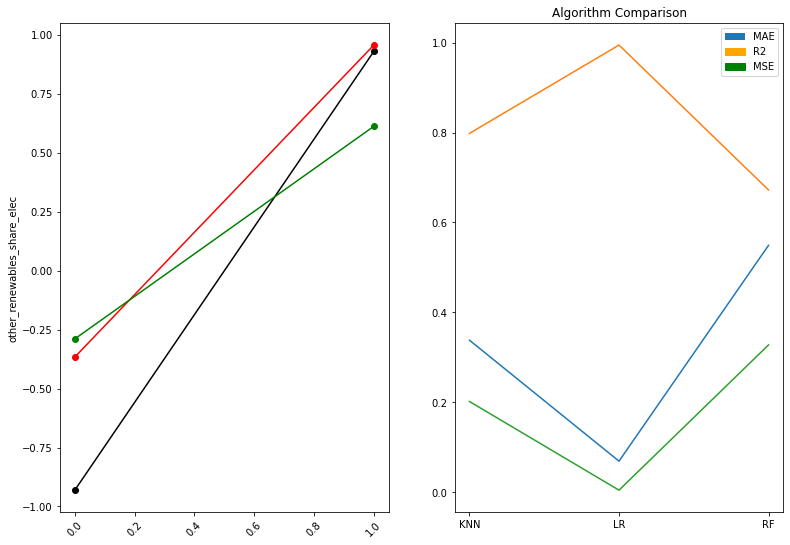

 
RF: Predicted Value from model for : China and  renewables_share_elec
[-0.59026525  1.27023717]
 
country  China  Energy Source  renewables_share_elec MSE: 0.12
country  China  Energy Source  renewables_share_elec r2: 0.88
country  China  Energy Source  renewables_share_elec Mean absolute error: 0.34
 
KNN: Predicted Value from model for : China and  renewables_share_elec
[-0.62077429  1.33965807]
 
country  China  Energy Source  renewables_share_elec MSE: 0.13
country  China  Energy Source  renewables_share_elec r2: 0.87
country  China  Energy Source  renewables_share_elec Mean absolute error: 0.36
Coefficients: [ 0.97111829 -0.01914697]
Intercept: -1.0366003221512211e-16
 
LR: Predicted Value from model for : China and  renewables_share_elec
 
[-0.95197132  0.95197132]
 
country  China  Energy Source  renewables_share_elec Mean absolute error: 0.05
country  China  Energy Source  renewables_share_elec Residual sum of squares (MSE): 0.00
country  China  Energy Source  renewables_shar

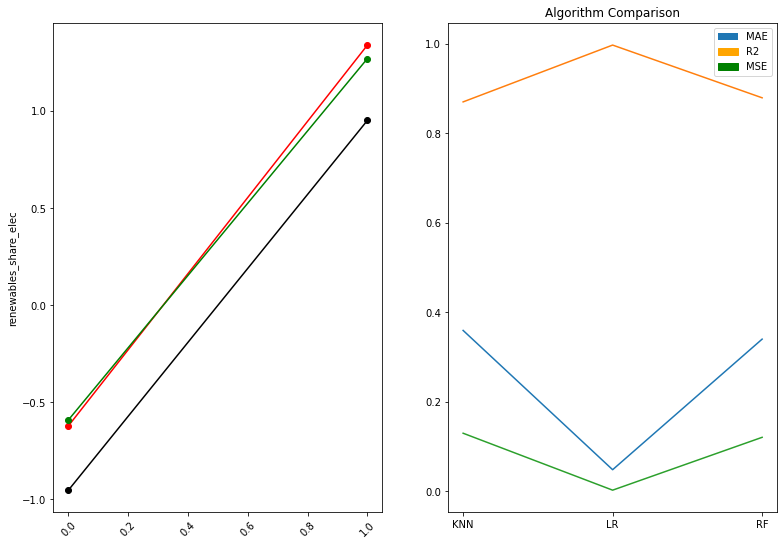

 
RF: Predicted Value from model for : China and  solar_share_elec
[0.26383132 0.63931969]
 
country  China  Energy Source  solar_share_elec MSE: 0.86
country  China  Energy Source  solar_share_elec r2: 0.14
country  China  Energy Source  solar_share_elec Mean absolute error: 0.81
 
KNN: Predicted Value from model for : China and  solar_share_elec
[ 0.04851408 -0.15308234]
 
country  China  Energy Source  solar_share_elec MSE: 1.21
country  China  Energy Source  solar_share_elec r2: -0.21
country  China  Energy Source  solar_share_elec Mean absolute error: 1.10
Coefficients: [0.8885211  0.11032855]
Intercept: 1.3588681794666435e-17
 
LR: Predicted Value from model for : China and  solar_share_elec
 
[-0.77819255  0.77819255]
 
country  China  Energy Source  solar_share_elec Mean absolute error: 0.22
country  China  Energy Source  solar_share_elec Residual sum of squares (MSE): 0.05
country  China  Energy Source  solar_share_elec R2-score: 0.92
     MAE    R2  MSE
KNN 1.10 -0.21 1.21
LR

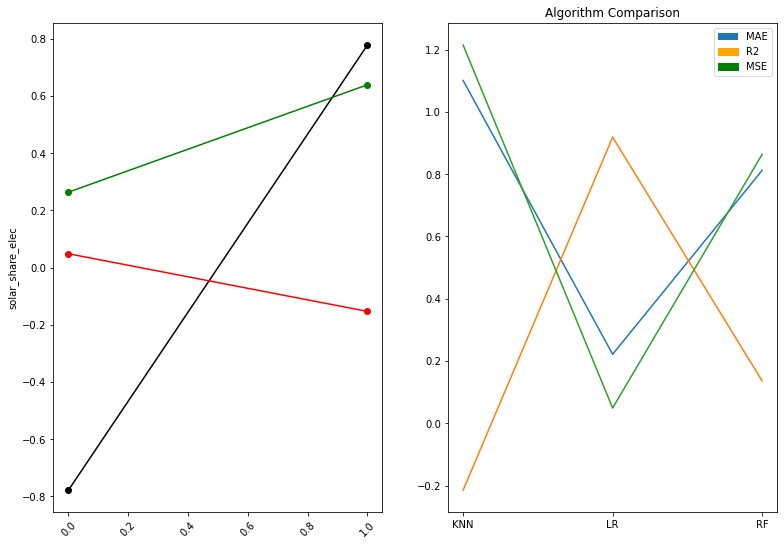

 
RF: Predicted Value from model for : China and  wind_share_elec
[0.04915117 0.69046048]
 
country  China  Energy Source  wind_share_elec MSE: 0.60
country  China  Energy Source  wind_share_elec r2: 0.40
country  China  Energy Source  wind_share_elec Mean absolute error: 0.68
 
KNN: Predicted Value from model for : China and  wind_share_elec
[ 0.01398038 -0.20358918]
 
country  China  Energy Source  wind_share_elec MSE: 1.24
country  China  Energy Source  wind_share_elec r2: -0.24
country  China  Energy Source  wind_share_elec Mean absolute error: 1.11
Coefficients: [0.89469637 0.11092939]
Intercept: -1.4243720379208076e-16
 
LR: Predicted Value from model for : China and  wind_share_elec
 
[-0.78376698  0.78376698]
 
country  China  Energy Source  wind_share_elec Mean absolute error: 0.22
country  China  Energy Source  wind_share_elec Residual sum of squares (MSE): 0.05
country  China  Energy Source  wind_share_elec R2-score: 0.92
     MAE    R2  MSE
KNN 1.11 -0.24 1.24
LR  0.22  0.9

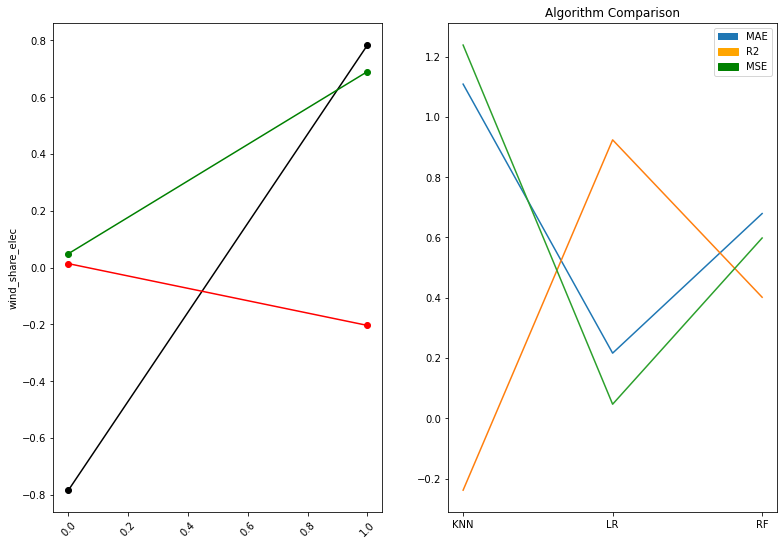

 
RF: Predicted Value from model for : India and  biofuel_share_elec
[ 0.37668893 -0.2910239 ]
 
country  India  Energy Source  biofuel_share_elec MSE: 1.78
country  India  Energy Source  biofuel_share_elec r2: -0.78
country  India  Energy Source  biofuel_share_elec Mean absolute error: 1.33
 
KNN: Predicted Value from model for : India and  biofuel_share_elec
[ 0.33462778 -0.34097168]
 
country  India  Energy Source  biofuel_share_elec MSE: 1.79
country  India  Energy Source  biofuel_share_elec r2: -0.79
country  India  Energy Source  biofuel_share_elec Mean absolute error: 1.34
Coefficients: [0.94347203 0.08610307]
Intercept: -5.045740967120393e-17
 
LR: Predicted Value from model for : India and  biofuel_share_elec
 
[ 1.0295751 -1.0295751]
 
country  India  Energy Source  biofuel_share_elec Mean absolute error: 2.03
country  India  Energy Source  biofuel_share_elec Residual sum of squares (MSE): 4.12
country  India  Energy Source  biofuel_share_elec R2-score: -2.89
     MAE    R2  

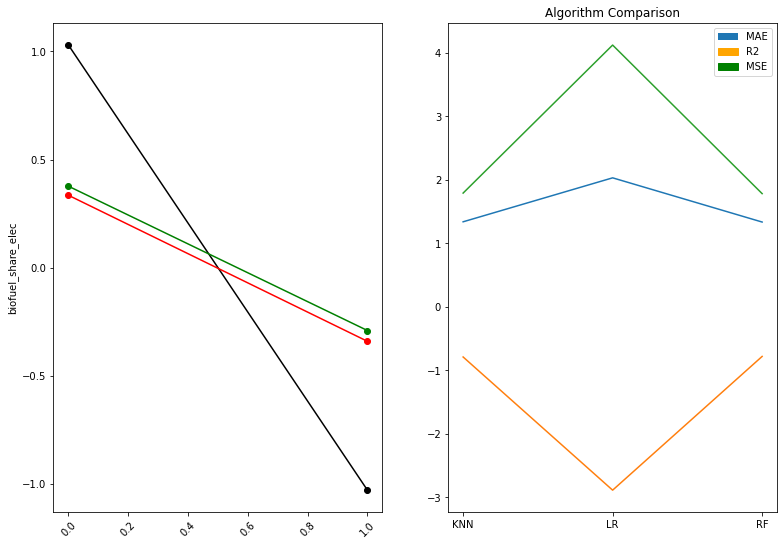

 
RF: Predicted Value from model for : India and  coal_share_elec
[ 1.52029461 -0.60629982]
 
country  India  Energy Source  coal_share_elec MSE: 0.21
country  India  Energy Source  coal_share_elec r2: 0.79
country  India  Energy Source  coal_share_elec Mean absolute error: 0.46
 
KNN: Predicted Value from model for : India and  coal_share_elec
[ 1.5986223  -0.62955959]
 
country  India  Energy Source  coal_share_elec MSE: 0.25
country  India  Energy Source  coal_share_elec r2: 0.75
country  India  Energy Source  coal_share_elec Mean absolute error: 0.48
Coefficients: [0.98182219 0.00517752]
Intercept: 4.7221315976926495e-17
 
LR: Predicted Value from model for : India and  coal_share_elec
 
[ 0.98699971 -0.98699971]
 
country  India  Energy Source  coal_share_elec Mean absolute error: 0.01
country  India  Energy Source  coal_share_elec Residual sum of squares (MSE): 0.00
country  India  Energy Source  coal_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.48 0.75 0.25
LR  0.01 1.00 0

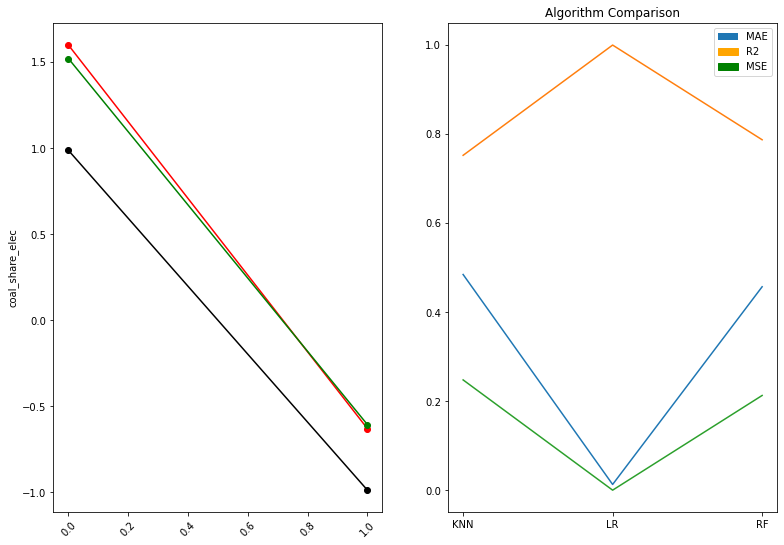

 
RF: Predicted Value from model for : India and  fossil_share_elec
[ 1.45693157 -0.6068163 ]
 
country  India  Energy Source  fossil_share_elec MSE: 0.18
country  India  Energy Source  fossil_share_elec r2: 0.82
country  India  Energy Source  fossil_share_elec Mean absolute error: 0.43
 
KNN: Predicted Value from model for : India and  fossil_share_elec
[ 1.55422093 -0.62990197]
 
country  India  Energy Source  fossil_share_elec MSE: 0.22
country  India  Energy Source  fossil_share_elec r2: 0.78
country  India  Energy Source  fossil_share_elec Mean absolute error: 0.46
Coefficients: [0.9825957  0.00386832]
Intercept: -1.330864582645623e-16
 
LR: Predicted Value from model for : India and  fossil_share_elec
 
[ 0.98646402 -0.98646402]
 
country  India  Energy Source  fossil_share_elec Mean absolute error: 0.01
country  India  Energy Source  fossil_share_elec Residual sum of squares (MSE): 0.00
country  India  Energy Source  fossil_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.46 0

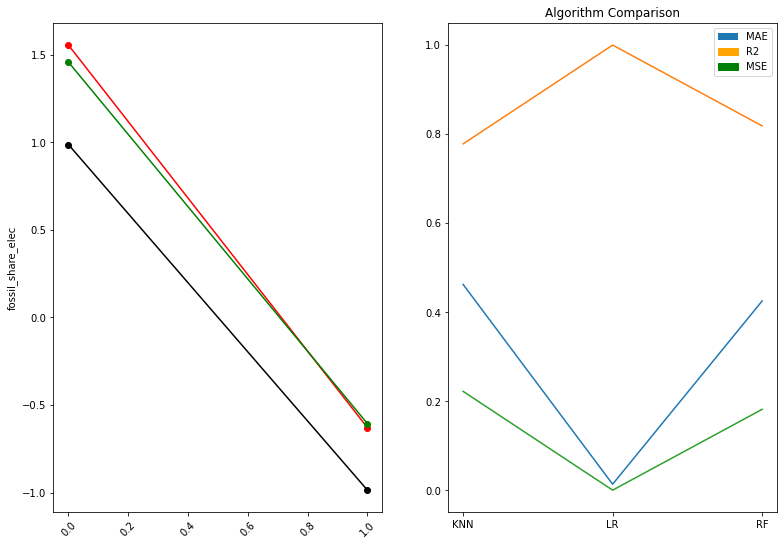

 
RF: Predicted Value from model for : India and  gas_share_elec
[ 1.30463992 -0.49379825]
 
country  India  Energy Source  gas_share_elec MSE: 3.77
country  India  Energy Source  gas_share_elec r2: -2.77
country  India  Energy Source  gas_share_elec Mean absolute error: 1.90
 
KNN: Predicted Value from model for : India and  gas_share_elec
[ 1.05551932 -0.42426975]
 
country  India  Energy Source  gas_share_elec MSE: 3.13
country  India  Energy Source  gas_share_elec r2: -2.13
country  India  Energy Source  gas_share_elec Mean absolute error: 1.74
Coefficients: [0.97719492 0.09316084]
Intercept: 2.498411004078622e-17
 
LR: Predicted Value from model for : India and  gas_share_elec
 
[ 0.88403408 -0.88403408]
 
country  India  Energy Source  gas_share_elec Mean absolute error: 1.88
country  India  Energy Source  gas_share_elec Residual sum of squares (MSE): 3.55
country  India  Energy Source  gas_share_elec R2-score: -3.54
     MAE    R2  MSE
KNN 1.74 -2.13 3.13
LR  1.88 -3.54 3.55
RF 

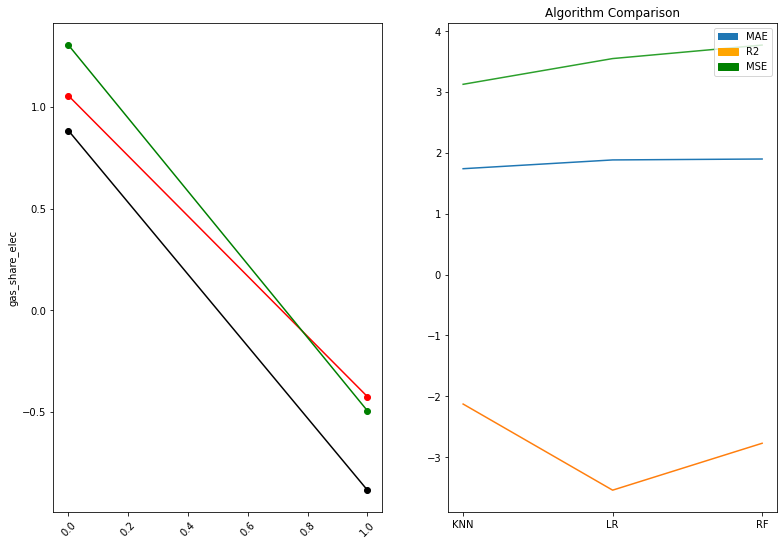

 
RF: Predicted Value from model for : India and  hydro_share_elec
[-0.56120624  1.05895973]
 
country  India  Energy Source  hydro_share_elec MSE: 0.10
country  India  Energy Source  hydro_share_elec r2: 0.90
country  India  Energy Source  hydro_share_elec Mean absolute error: 0.25
 
KNN: Predicted Value from model for : India and  hydro_share_elec
[-0.60202024  1.18893464]
 
country  India  Energy Source  hydro_share_elec MSE: 0.10
country  India  Energy Source  hydro_share_elec r2: 0.90
country  India  Energy Source  hydro_share_elec Mean absolute error: 0.29
Coefficients: [ 0.94456016 -0.00919815]
Intercept: -1.7840537539982447e-18
 
LR: Predicted Value from model for : India and  hydro_share_elec
 
[-0.93536201  0.93536201]
 
country  India  Energy Source  hydro_share_elec Mean absolute error: 0.06
country  India  Energy Source  hydro_share_elec Residual sum of squares (MSE): 0.00
country  India  Energy Source  hydro_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.29 0.90 0.10


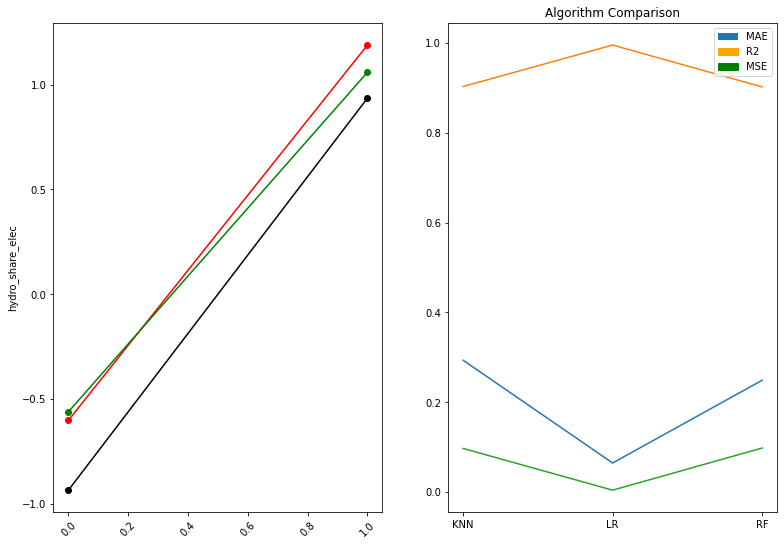

 
RF: Predicted Value from model for : India and  nuclear_share_elec
[-0.57163475  0.960458  ]
 
country  India  Energy Source  nuclear_share_elec MSE: 0.09
country  India  Energy Source  nuclear_share_elec r2: 0.91
country  India  Energy Source  nuclear_share_elec Mean absolute error: 0.23
 
KNN: Predicted Value from model for : India and  nuclear_share_elec
[-0.60581283  1.10349774]
 
country  India  Energy Source  nuclear_share_elec MSE: 0.08
country  India  Energy Source  nuclear_share_elec r2: 0.92
country  India  Energy Source  nuclear_share_elec Mean absolute error: 0.25
Coefficients: [ 0.96808287 -0.00994991]
Intercept: 8.93939337670653e-17
 
LR: Predicted Value from model for : India and  nuclear_share_elec
 
[-0.95813295  0.95813295]
 
country  India  Energy Source  nuclear_share_elec Mean absolute error: 0.04
country  India  Energy Source  nuclear_share_elec Residual sum of squares (MSE): 0.00
country  India  Energy Source  nuclear_share_elec R2-score: 1.00
     MAE   R2  MS

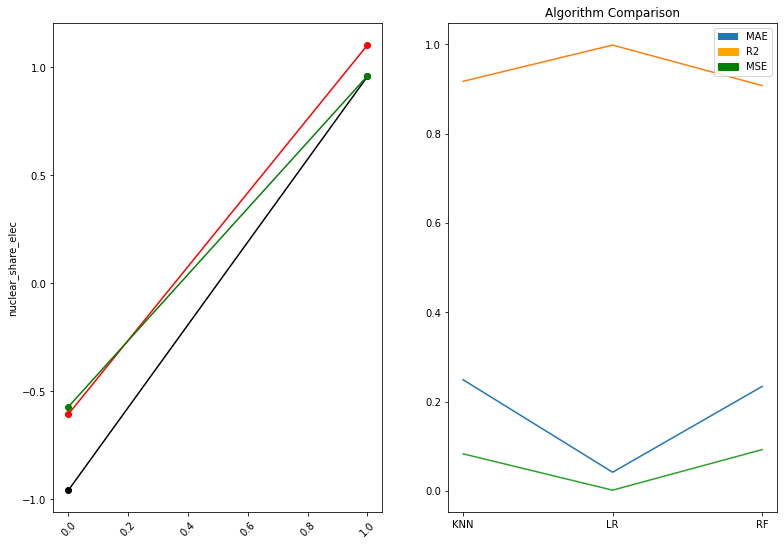

 
RF: Predicted Value from model for : India and  oil_share_elec
[ 0.01611337 -0.38148162]
 
country  India  Energy Source  oil_share_elec MSE: 1.47
country  India  Energy Source  oil_share_elec r2: -0.47
country  India  Energy Source  oil_share_elec Mean absolute error: 1.20
 
KNN: Predicted Value from model for : India and  oil_share_elec
[ 0.82690549 -0.35151209]
 
country  India  Energy Source  oil_share_elec MSE: 2.58
country  India  Energy Source  oil_share_elec r2: -1.58
country  India  Energy Source  oil_share_elec Mean absolute error: 1.59
Coefficients: [ 0.90299119 -0.02124412]
Intercept: -4.47529952747067e-17
 
LR: Predicted Value from model for : India and  oil_share_elec
 
[ 0.88174707 -0.88174707]
 
country  India  Energy Source  oil_share_elec Mean absolute error: 1.88
country  India  Energy Source  oil_share_elec Residual sum of squares (MSE): 3.54
country  India  Energy Source  oil_share_elec R2-score: -3.55
     MAE    R2  MSE
KNN 1.59 -1.58 2.58
LR  1.88 -3.55 3.54
R

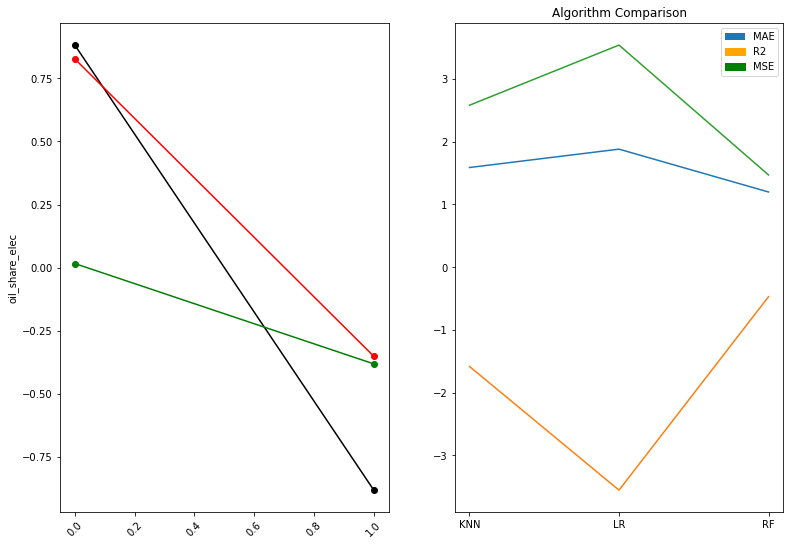

 
RF: Predicted Value from model for : India and  other_renewables_share_elec
[ 0.39291437 -0.33718394]
 
country  India  Energy Source  other_renewables_share_elec MSE: 1.86
country  India  Energy Source  other_renewables_share_elec r2: -0.86
country  India  Energy Source  other_renewables_share_elec Mean absolute error: 1.37
 
KNN: Predicted Value from model for : India and  other_renewables_share_elec
[ 0.21473352 -0.36533276]
 
country  India  Energy Source  other_renewables_share_elec MSE: 1.67
country  India  Energy Source  other_renewables_share_elec r2: -0.67
country  India  Energy Source  other_renewables_share_elec Mean absolute error: 1.29
Coefficients: [0.94548873 0.085322  ]
Intercept: 1.3033647373661055e-16
 
LR: Predicted Value from model for : India and  other_renewables_share_elec
 
[ 1.03081073 -1.03081073]
 
country  India  Energy Source  other_renewables_share_elec Mean absolute error: 2.03
country  India  Energy Source  other_renewables_share_elec Residual sum of s

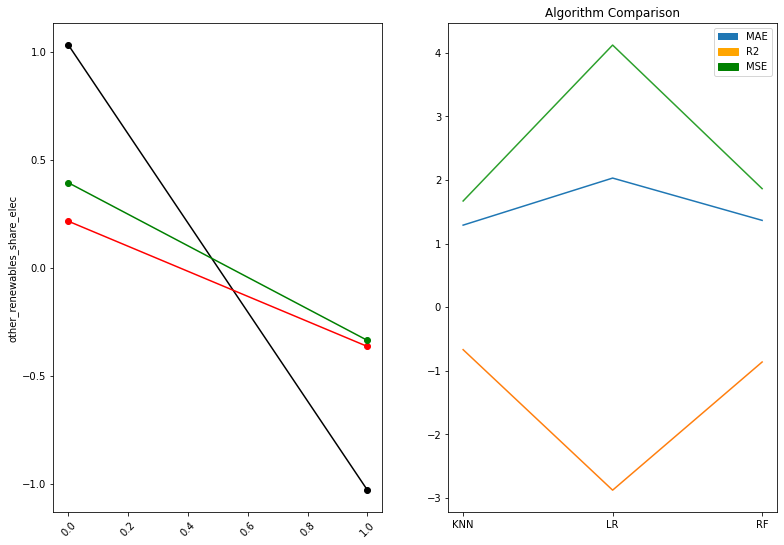

 
RF: Predicted Value from model for : India and  renewables_share_elec
[-0.58046634  1.13699338]
 
country  India  Energy Source  renewables_share_elec MSE: 0.10
country  India  Energy Source  renewables_share_elec r2: 0.90
country  India  Energy Source  renewables_share_elec Mean absolute error: 0.28
 
KNN: Predicted Value from model for : India and  renewables_share_elec
[-0.61811127  1.37037828]
 
country  India  Energy Source  renewables_share_elec MSE: 0.14
country  India  Energy Source  renewables_share_elec r2: 0.86
country  India  Energy Source  renewables_share_elec Mean absolute error: 0.38
Coefficients: [ 0.95348125 -0.01130886]
Intercept: 1.2231532419172578e-16
 
LR: Predicted Value from model for : India and  renewables_share_elec
 
[-0.94217238  0.94217238]
 
country  India  Energy Source  renewables_share_elec Mean absolute error: 0.06
country  India  Energy Source  renewables_share_elec Residual sum of squares (MSE): 0.00
country  India  Energy Source  renewables_share

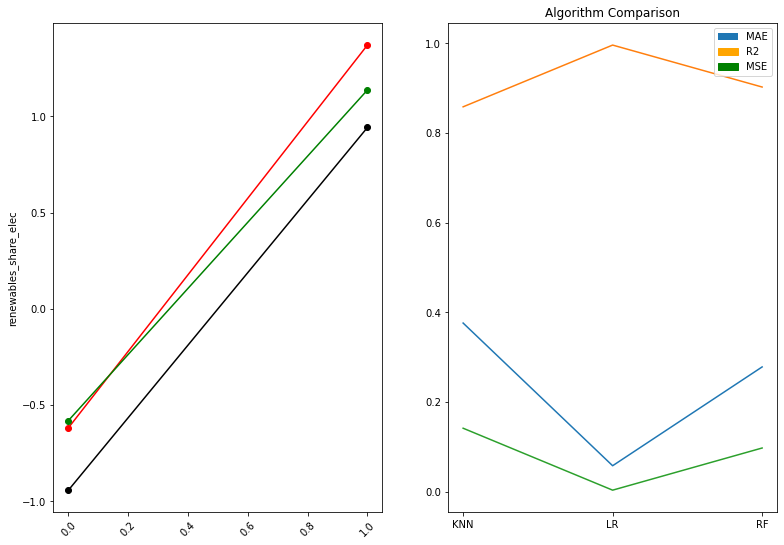

 
RF: Predicted Value from model for : India and  solar_share_elec
[0.22798423 0.85671159]
 
country  India  Energy Source  solar_share_elec MSE: 0.76
country  India  Energy Source  solar_share_elec r2: 0.24
country  India  Energy Source  solar_share_elec Mean absolute error: 0.69
 
KNN: Predicted Value from model for : India and  solar_share_elec
[-0.09178213 -0.07656275]
 
country  India  Energy Source  solar_share_elec MSE: 0.99
country  India  Energy Source  solar_share_elec r2: 0.01
country  India  Energy Source  solar_share_elec Mean absolute error: 0.99
Coefficients: [0.85664855 0.14093749]
Intercept: 1.9677329856320175e-17
 
LR: Predicted Value from model for : India and  solar_share_elec
 
[-0.71571106  0.71571106]
 
country  India  Energy Source  solar_share_elec Mean absolute error: 0.28
country  India  Energy Source  solar_share_elec Residual sum of squares (MSE): 0.08
country  India  Energy Source  solar_share_elec R2-score: 0.84
     MAE   R2  MSE
KNN 0.99 0.01 0.99
LR  0

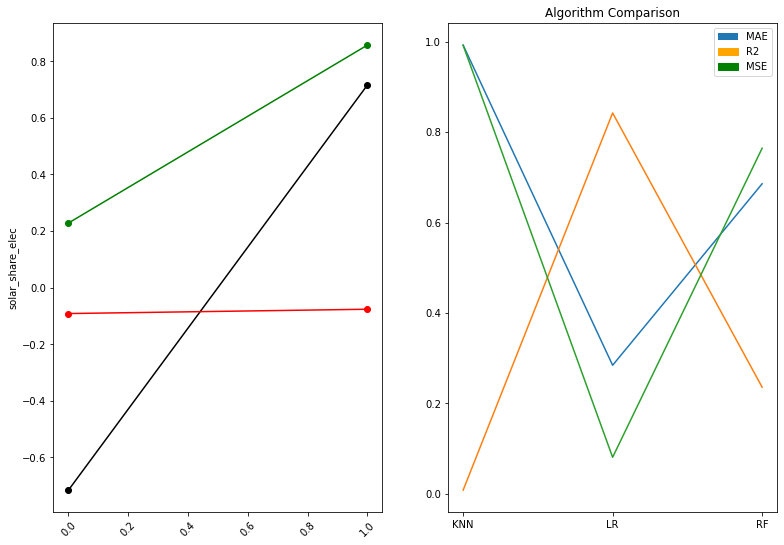

 
RF: Predicted Value from model for : India and  wind_share_elec
[-0.2443734   1.00398645]
 
country  India  Energy Source  wind_share_elec MSE: 2.78
country  India  Energy Source  wind_share_elec r2: -1.78
country  India  Energy Source  wind_share_elec Mean absolute error: 1.62
 
KNN: Predicted Value from model for : India and  wind_share_elec
[-0.0579239  -0.23926612]
 
country  India  Energy Source  wind_share_elec MSE: 0.85
country  India  Energy Source  wind_share_elec r2: 0.15
country  India  Energy Source  wind_share_elec Mean absolute error: 0.91
Coefficients: [0.99045259 0.00419602]
Intercept: -1.5235337217950715e-16
 
LR: Predicted Value from model for : India and  wind_share_elec
 
[-0.98625657  0.98625657]
 
country  India  Energy Source  wind_share_elec Mean absolute error: 1.99
country  India  Energy Source  wind_share_elec Residual sum of squares (MSE): 3.95
country  India  Energy Source  wind_share_elec R2-score: -3.06
     MAE    R2  MSE
KNN 0.91  0.15 0.85
LR  1.99 -

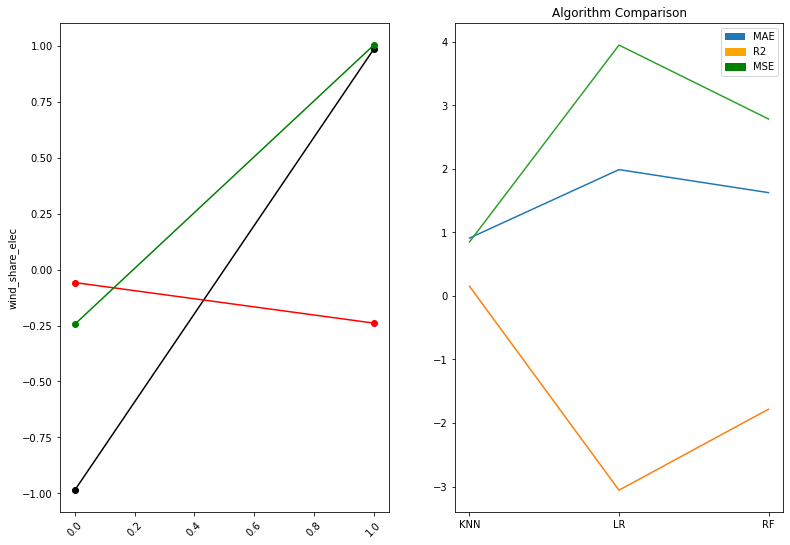

 
RF: Predicted Value from model for : Germany and  biofuel_share_elec
[-0.35923496  1.17850858]
 
country  Germany  Energy Source  biofuel_share_elec MSE: 0.22
country  Germany  Energy Source  biofuel_share_elec r2: 0.78
country  Germany  Energy Source  biofuel_share_elec Mean absolute error: 0.41
 
KNN: Predicted Value from model for : Germany and  biofuel_share_elec
[-0.30099449  0.77609245]
 
country  Germany  Energy Source  biofuel_share_elec MSE: 0.27
country  Germany  Energy Source  biofuel_share_elec r2: 0.73
country  Germany  Energy Source  biofuel_share_elec Mean absolute error: 0.46
Coefficients: [0.95231051 0.06345627]
Intercept: -1.479153506113499e-17
 
LR: Predicted Value from model for : Germany and  biofuel_share_elec
 
[-1.01576678  1.01576678]
 
country  Germany  Energy Source  biofuel_share_elec Mean absolute error: 0.02
country  Germany  Energy Source  biofuel_share_elec Residual sum of squares (MSE): 0.00
country  Germany  Energy Source  biofuel_share_elec R2-score

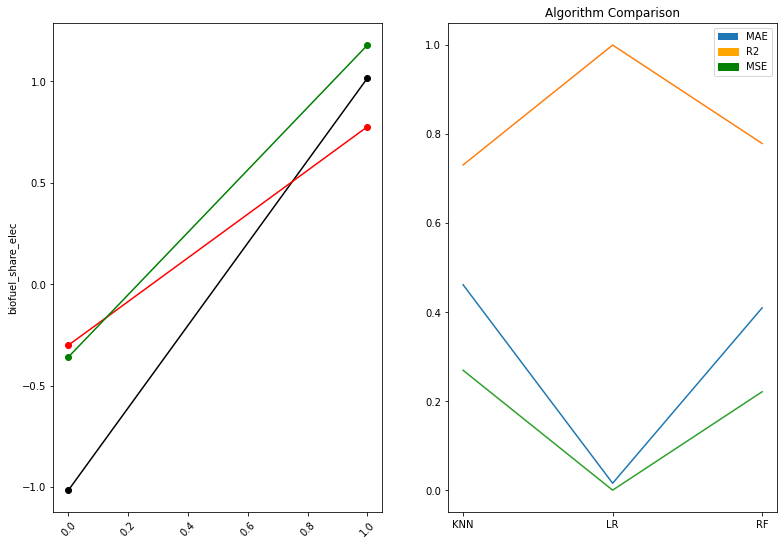

 
RF: Predicted Value from model for : Germany and  coal_share_elec
[ 1.12766631 -0.59330299]
 
country  Germany  Energy Source  coal_share_elec MSE: 0.09
country  Germany  Energy Source  coal_share_elec r2: 0.91
country  Germany  Energy Source  coal_share_elec Mean absolute error: 0.27
 
KNN: Predicted Value from model for : Germany and  coal_share_elec
[ 1.37109625 -0.62420702]
 
country  Germany  Energy Source  coal_share_elec MSE: 0.14
country  Germany  Energy Source  coal_share_elec r2: 0.86
country  Germany  Energy Source  coal_share_elec Mean absolute error: 0.37
Coefficients: [0.96883362 0.00514154]
Intercept: -3.7744261836254426e-18
 
LR: Predicted Value from model for : Germany and  coal_share_elec
 
[ 0.97397515 -0.97397515]
 
country  Germany  Energy Source  coal_share_elec Mean absolute error: 0.03
country  Germany  Energy Source  coal_share_elec Residual sum of squares (MSE): 0.00
country  Germany  Energy Source  coal_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.37 

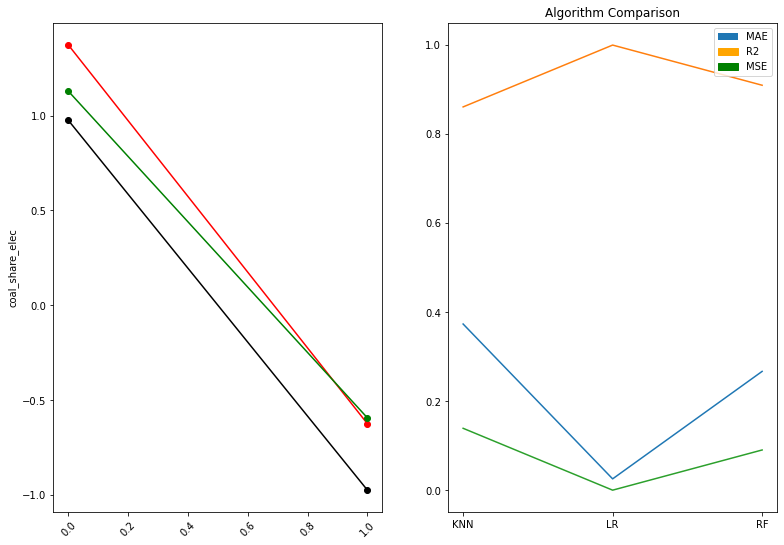

 
RF: Predicted Value from model for : Germany and  fossil_share_elec
[ 1.3427684  -0.60177958]
 
country  Germany  Energy Source  fossil_share_elec MSE: 0.14
country  Germany  Energy Source  fossil_share_elec r2: 0.86
country  Germany  Energy Source  fossil_share_elec Mean absolute error: 0.37
 
KNN: Predicted Value from model for : Germany and  fossil_share_elec
[ 1.50570291 -0.62958374]
 
country  Germany  Energy Source  fossil_share_elec MSE: 0.20
country  Germany  Energy Source  fossil_share_elec r2: 0.80
country  Germany  Energy Source  fossil_share_elec Mean absolute error: 0.44
Coefficients: [0.97471568 0.00524768]
Intercept: -8.411615068913666e-17
 
LR: Predicted Value from model for : Germany and  fossil_share_elec
 
[ 0.97996336 -0.97996336]
 
country  Germany  Energy Source  fossil_share_elec Mean absolute error: 0.02
country  Germany  Energy Source  fossil_share_elec Residual sum of squares (MSE): 0.00
country  Germany  Energy Source  fossil_share_elec R2-score: 1.00
     

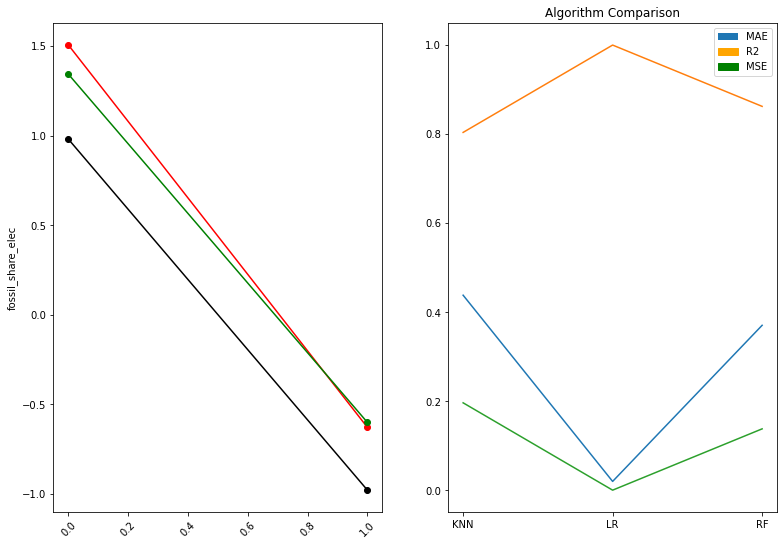

 
RF: Predicted Value from model for : Germany and  gas_share_elec
[-0.58287714  0.91208084]
 
country  Germany  Energy Source  gas_share_elec MSE: 0.09
country  Germany  Energy Source  gas_share_elec r2: 0.91
country  Germany  Energy Source  gas_share_elec Mean absolute error: 0.25
 
KNN: Predicted Value from model for : Germany and  gas_share_elec
[-0.59671549  1.01869478]
 
country  Germany  Energy Source  gas_share_elec MSE: 0.08
country  Germany  Energy Source  gas_share_elec r2: 0.92
country  Germany  Energy Source  gas_share_elec Mean absolute error: 0.21
Coefficients: [0.98478767 0.01804677]
Intercept: 9.172751397483236e-17
 
LR: Predicted Value from model for : Germany and  gas_share_elec
 
[-1.00283444  1.00283444]
 
country  Germany  Energy Source  gas_share_elec Mean absolute error: 0.00
country  Germany  Energy Source  gas_share_elec Residual sum of squares (MSE): 0.00
country  Germany  Energy Source  gas_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.21 0.92 0.08
LR  

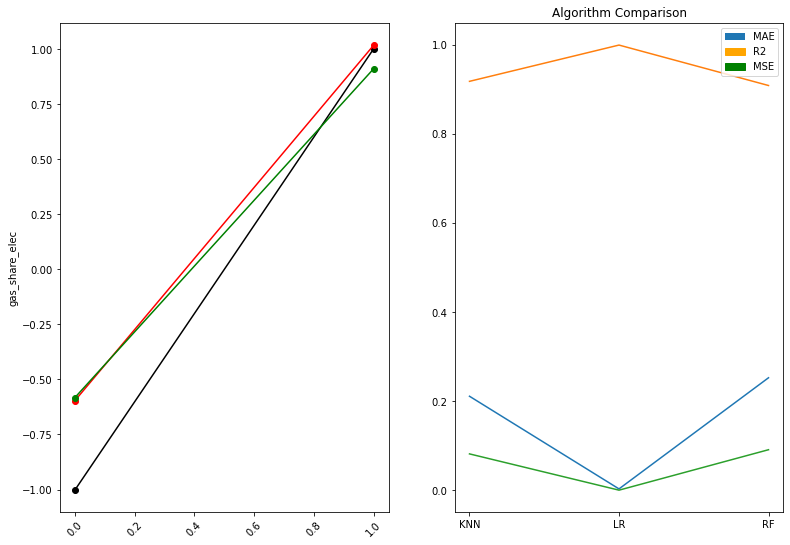

 
RF: Predicted Value from model for : Germany and  hydro_share_elec
[-0.60087551  1.5685795 ]
 
country  Germany  Energy Source  hydro_share_elec MSE: 0.24
country  Germany  Energy Source  hydro_share_elec r2: 0.76
country  Germany  Energy Source  hydro_share_elec Mean absolute error: 0.48
 
KNN: Predicted Value from model for : Germany and  hydro_share_elec
[-0.62598793  1.58534025]
 
country  Germany  Energy Source  hydro_share_elec MSE: 0.24
country  Germany  Energy Source  hydro_share_elec r2: 0.76
country  Germany  Energy Source  hydro_share_elec Mean absolute error: 0.48
Coefficients: [ 9.72980492e-01 -5.13455424e-04]
Intercept: 3.496306167370139e-17
 
LR: Predicted Value from model for : Germany and  hydro_share_elec
 
[-0.97246704  0.97246704]
 
country  Germany  Energy Source  hydro_share_elec Mean absolute error: 0.03
country  Germany  Energy Source  hydro_share_elec Residual sum of squares (MSE): 0.00
country  Germany  Energy Source  hydro_share_elec R2-score: 1.00
     MAE

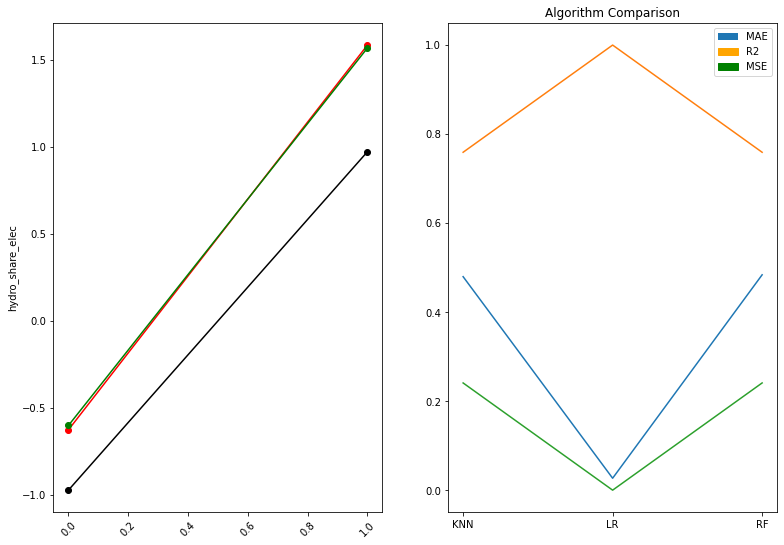

 
RF: Predicted Value from model for : Germany and  nuclear_share_elec
[-0.25891655  0.7007479 ]
 
country  Germany  Energy Source  nuclear_share_elec MSE: 2.24
country  Germany  Energy Source  nuclear_share_elec r2: -1.24
country  Germany  Energy Source  nuclear_share_elec Mean absolute error: 1.48
 
KNN: Predicted Value from model for : Germany and  nuclear_share_elec
[-0.60897986  1.53894963]
 
country  Germany  Energy Source  nuclear_share_elec MSE: 4.52
country  Germany  Energy Source  nuclear_share_elec r2: -3.52
country  Germany  Energy Source  nuclear_share_elec Mean absolute error: 2.07
Coefficients: [ 0.97574231 -0.00900813]
Intercept: -1.348351329210212e-17
 
LR: Predicted Value from model for : Germany and  nuclear_share_elec
 
[-0.96673419  0.96673419]
 
country  Germany  Energy Source  nuclear_share_elec Mean absolute error: 1.97
country  Germany  Energy Source  nuclear_share_elec Residual sum of squares (MSE): 3.87
country  Germany  Energy Source  nuclear_share_elec R2-s

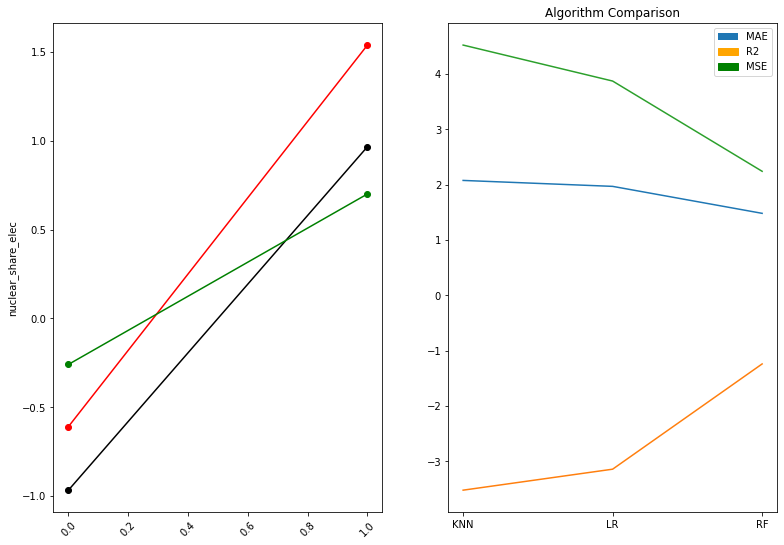

 
RF: Predicted Value from model for : Germany and  oil_share_elec
[ 0.65494377 -0.55993788]
 
country  Germany  Energy Source  oil_share_elec MSE: 0.16
country  Germany  Energy Source  oil_share_elec r2: 0.84
country  Germany  Energy Source  oil_share_elec Mean absolute error: 0.39
 
KNN: Predicted Value from model for : Germany and  oil_share_elec
[ 0.59347028 -0.57338032]
 
country  Germany  Energy Source  oil_share_elec MSE: 0.17
country  Germany  Energy Source  oil_share_elec r2: 0.83
country  Germany  Energy Source  oil_share_elec Mean absolute error: 0.42
Coefficients: [0.97254641 0.00870109]
Intercept: 7.232042339210735e-17
 
LR: Predicted Value from model for : Germany and  oil_share_elec
 
[ 0.96384532 -0.96384532]
 
country  Germany  Energy Source  oil_share_elec Mean absolute error: 0.04
country  Germany  Energy Source  oil_share_elec Residual sum of squares (MSE): 0.00
country  Germany  Energy Source  oil_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.42 0.83 0.17
LR  

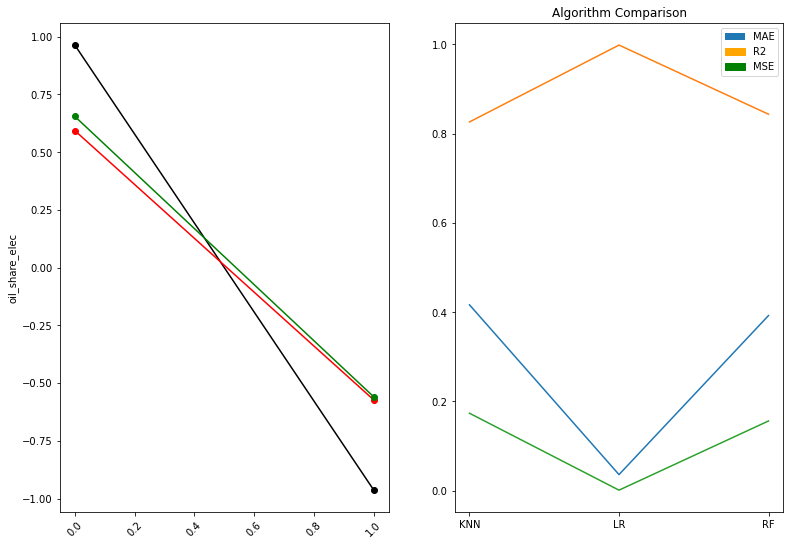

 
RF: Predicted Value from model for : Germany and  other_renewables_share_elec
[-0.38639914  1.1488571 ]
 
country  Germany  Energy Source  other_renewables_share_elec MSE: 0.20
country  Germany  Energy Source  other_renewables_share_elec r2: 0.80
country  Germany  Energy Source  other_renewables_share_elec Mean absolute error: 0.38
 
KNN: Predicted Value from model for : Germany and  other_renewables_share_elec
[-0.35911469  0.47516199]
 
country  Germany  Energy Source  other_renewables_share_elec MSE: 0.34
country  Germany  Energy Source  other_renewables_share_elec r2: 0.66
country  Germany  Energy Source  other_renewables_share_elec Mean absolute error: 0.58
Coefficients: [0.95385847 0.06029232]
Intercept: 9.189636139119852e-18
 
LR: Predicted Value from model for : Germany and  other_renewables_share_elec
 
[-1.01415078  1.01415078]
 
country  Germany  Energy Source  other_renewables_share_elec Mean absolute error: 0.01
country  Germany  Energy Source  other_renewables_share_ele

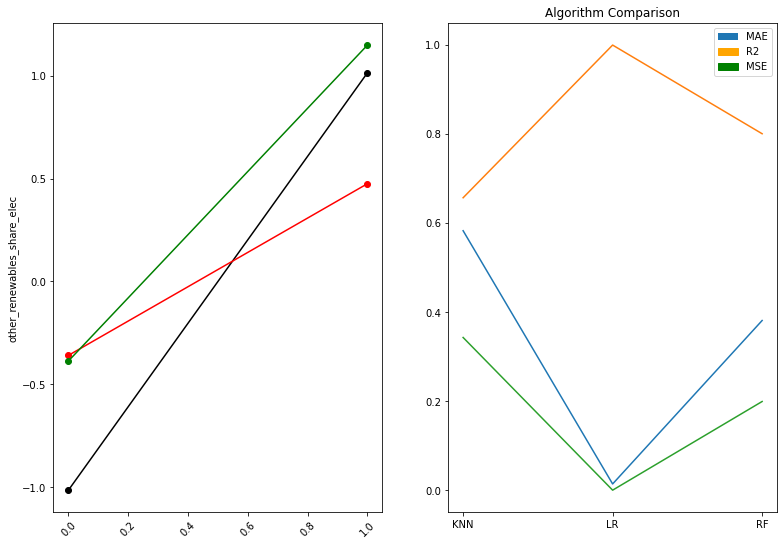

 
RF: Predicted Value from model for : Germany and  renewables_share_elec
[-0.44584874  1.01897142]
 
country  Germany  Energy Source  renewables_share_elec MSE: 0.15
country  Germany  Energy Source  renewables_share_elec r2: 0.85
country  Germany  Energy Source  renewables_share_elec Mean absolute error: 0.29
 
KNN: Predicted Value from model for : Germany and  renewables_share_elec
[-0.45662056  0.9952332 ]
 
country  Germany  Energy Source  renewables_share_elec MSE: 0.15
country  Germany  Energy Source  renewables_share_elec r2: 0.85
country  Germany  Energy Source  renewables_share_elec Mean absolute error: 0.27
Coefficients: [ 1.01729556 -0.02918413]
Intercept: 4.7099432920599805e-17
 
LR: Predicted Value from model for : Germany and  renewables_share_elec
 
[-0.98811143  0.98811143]
 
country  Germany  Energy Source  renewables_share_elec Mean absolute error: 0.01
country  Germany  Energy Source  renewables_share_elec Residual sum of squares (MSE): 0.00
country  Germany  Energy 

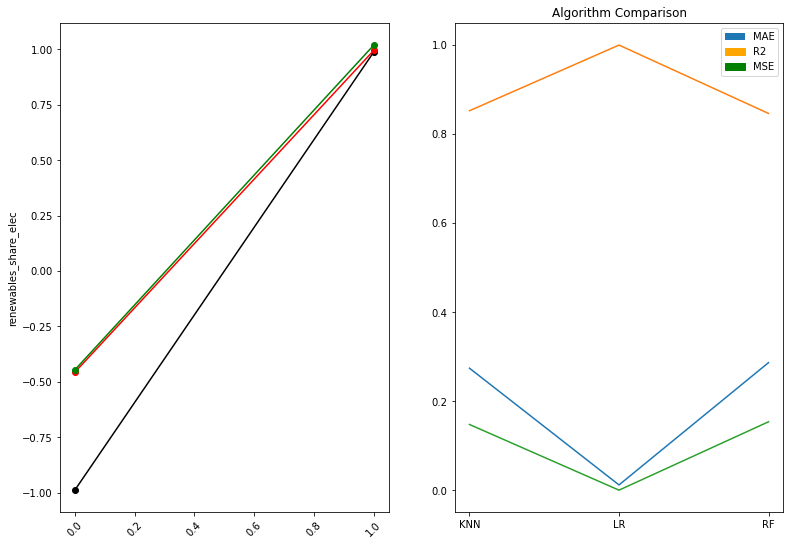

 
RF: Predicted Value from model for : Germany and  solar_share_elec
[0.1941005  0.79853329]
 
country  Germany  Energy Source  solar_share_elec MSE: 0.73
country  Germany  Energy Source  solar_share_elec r2: 0.27
country  Germany  Energy Source  solar_share_elec Mean absolute error: 0.70
 
KNN: Predicted Value from model for : Germany and  solar_share_elec
[ 0.16245873 -0.27611792]
 
country  Germany  Energy Source  solar_share_elec MSE: 1.49
country  Germany  Energy Source  solar_share_elec r2: -0.49
country  Germany  Energy Source  solar_share_elec Mean absolute error: 1.22
Coefficients: [0.89349221 0.1434017 ]
Intercept: -3.281759519547168e-17
 
LR: Predicted Value from model for : Germany and  solar_share_elec
 
[-0.75009052  0.75009052]
 
country  Germany  Energy Source  solar_share_elec Mean absolute error: 0.25
country  Germany  Energy Source  solar_share_elec Residual sum of squares (MSE): 0.06
country  Germany  Energy Source  solar_share_elec R2-score: 0.89
     MAE    R2  MS

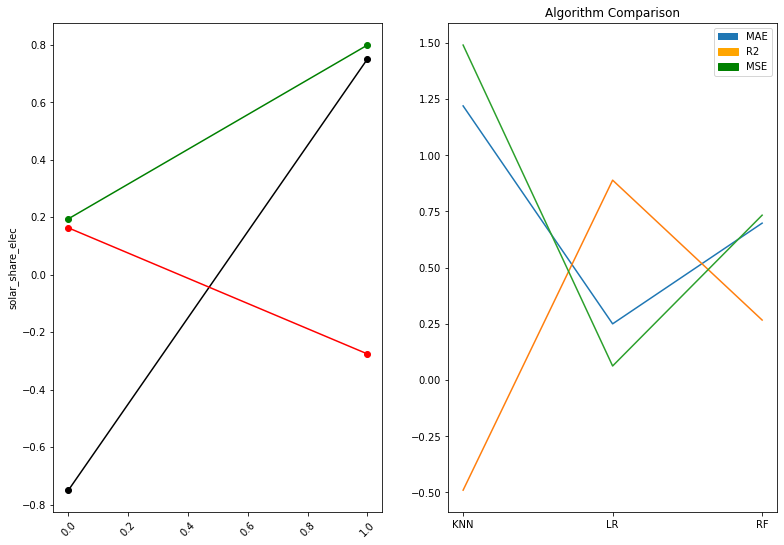

 
RF: Predicted Value from model for : Germany and  wind_share_elec
[-0.37769531  1.04385077]
 
country  Germany  Energy Source  wind_share_elec MSE: 0.19
country  Germany  Energy Source  wind_share_elec r2: 0.81
country  Germany  Energy Source  wind_share_elec Mean absolute error: 0.33
 
KNN: Predicted Value from model for : Germany and  wind_share_elec
[-0.37769913  1.09607347]
 
country  Germany  Energy Source  wind_share_elec MSE: 0.20
country  Germany  Energy Source  wind_share_elec r2: 0.80
country  Germany  Energy Source  wind_share_elec Mean absolute error: 0.36
Coefficients: [ 1.04602171 -0.09067307]
Intercept: -5.942711828265187e-17
 
LR: Predicted Value from model for : Germany and  wind_share_elec
 
[-0.95534864  0.95534864]
 
country  Germany  Energy Source  wind_share_elec Mean absolute error: 0.04
country  Germany  Energy Source  wind_share_elec Residual sum of squares (MSE): 0.00
country  Germany  Energy Source  wind_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.36

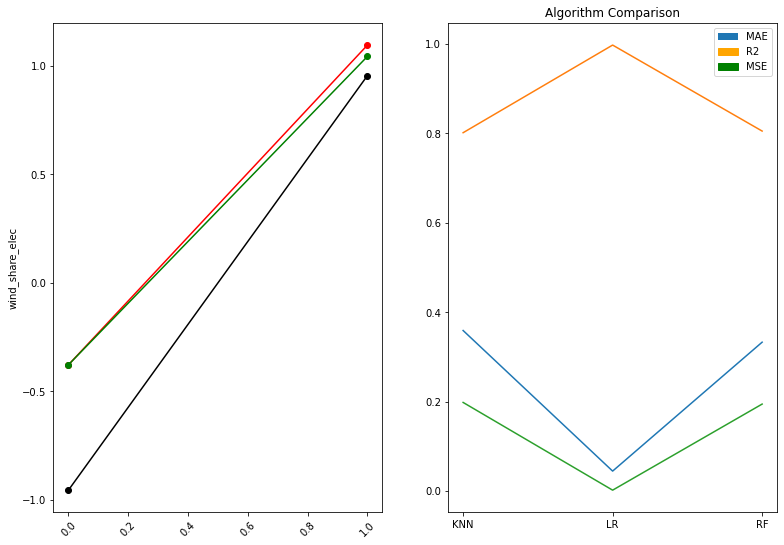

 
RF: Predicted Value from model for : France and  biofuel_share_elec
[-0.17886965  1.30544868]
 
country  France  Energy Source  biofuel_share_elec MSE: 0.38
country  France  Energy Source  biofuel_share_elec r2: 0.62
country  France  Energy Source  biofuel_share_elec Mean absolute error: 0.56
 
KNN: Predicted Value from model for : France and  biofuel_share_elec
[-0.4020602  1.5446986]
 
country  France  Energy Source  biofuel_share_elec MSE: 0.33
country  France  Energy Source  biofuel_share_elec r2: 0.67
country  France  Energy Source  biofuel_share_elec Mean absolute error: 0.57
Coefficients: [0.98768257 0.00246374]
Intercept: -1.1505961283309579e-18
 
LR: Predicted Value from model for : France and  biofuel_share_elec
 
[-0.98521883  0.98521883]
 
country  France  Energy Source  biofuel_share_elec Mean absolute error: 0.01
country  France  Energy Source  biofuel_share_elec Residual sum of squares (MSE): 0.00
country  France  Energy Source  biofuel_share_elec R2-score: 1.00
     M

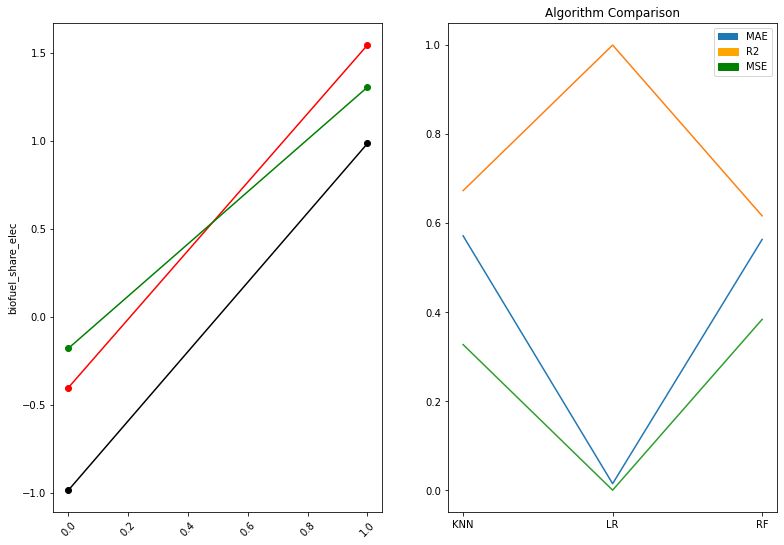

 
RF: Predicted Value from model for : France and  coal_share_elec
[ 1.09555027 -0.2747462 ]
 
country  France  Energy Source  coal_share_elec MSE: 3.01
country  France  Energy Source  coal_share_elec r2: -2.01
country  France  Energy Source  coal_share_elec Mean absolute error: 1.69
 
KNN: Predicted Value from model for : France and  coal_share_elec
[ 1.72933152 -0.41202332]
 
country  France  Energy Source  coal_share_elec MSE: 4.72
country  France  Energy Source  coal_share_elec r2: -3.72
country  France  Energy Source  coal_share_elec Mean absolute error: 2.07
Coefficients: [ 0.94193444 -0.09804574]
Intercept: 1.4333129679357305e-16
 
LR: Predicted Value from model for : France and  coal_share_elec
 
[ 1.03998019 -1.03998019]
 
country  France  Energy Source  coal_share_elec Mean absolute error: 2.04
country  France  Energy Source  coal_share_elec Residual sum of squares (MSE): 4.16
country  France  Energy Source  coal_share_elec R2-score: -2.85
     MAE    R2  MSE
KNN 2.07 -3.72 4

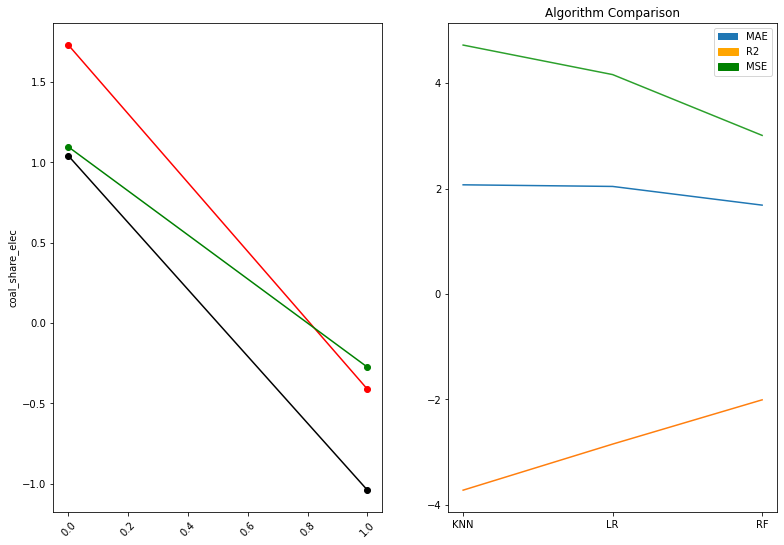

 
RF: Predicted Value from model for : France and  fossil_share_elec
[-0.39982681  2.14329621]
 
country  France  Energy Source  fossil_share_elec MSE: 5.92
country  France  Energy Source  fossil_share_elec r2: -4.92
country  France  Energy Source  fossil_share_elec Mean absolute error: 2.27
 
KNN: Predicted Value from model for : France and  fossil_share_elec
[-0.42487373  1.99564005]
 
country  France  Energy Source  fossil_share_elec MSE: 5.50
country  France  Energy Source  fossil_share_elec r2: -4.50
country  France  Energy Source  fossil_share_elec Mean absolute error: 2.21
Coefficients: [ 0.96428216 -0.01791188]
Intercept: 3.2132012393853932e-18
 
LR: Predicted Value from model for : France and  fossil_share_elec
 
[-0.94637028  0.94637028]
 
country  France  Energy Source  fossil_share_elec Mean absolute error: 1.95
country  France  Energy Source  fossil_share_elec Residual sum of squares (MSE): 3.79
country  France  Energy Source  fossil_share_elec R2-score: -3.23
     MAE    

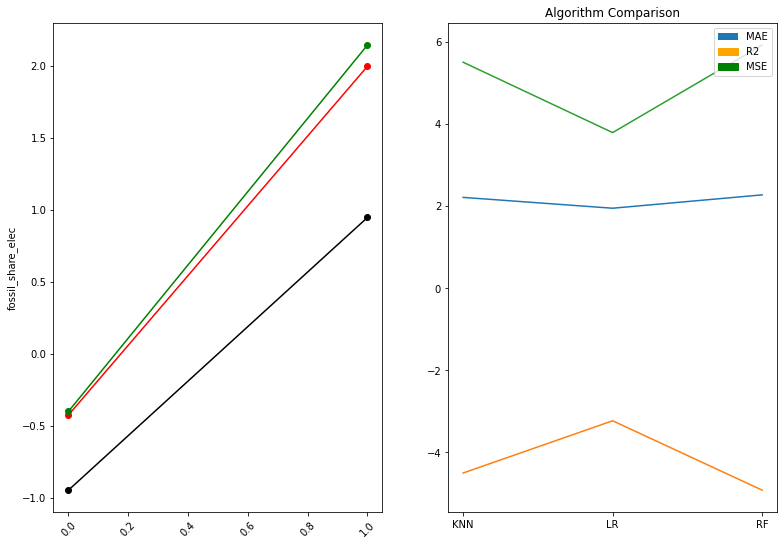

 
RF: Predicted Value from model for : France and  gas_share_elec
[-0.39291128  1.71564887]
 
country  France  Energy Source  gas_share_elec MSE: 4.66
country  France  Energy Source  gas_share_elec r2: -3.66
country  France  Energy Source  gas_share_elec Mean absolute error: 2.05
 
KNN: Predicted Value from model for : France and  gas_share_elec
[-0.40627278  1.98642509]
 
country  France  Energy Source  gas_share_elec MSE: 5.45
country  France  Energy Source  gas_share_elec r2: -4.45
country  France  Energy Source  gas_share_elec Mean absolute error: 2.20
Coefficients: [0.92510843 0.10036651]
Intercept: -1.4126848405041e-16
 
LR: Predicted Value from model for : France and  gas_share_elec
 
[-1.02547494  1.02547494]
 
country  France  Energy Source  gas_share_elec Mean absolute error: 2.03
country  France  Energy Source  gas_share_elec Residual sum of squares (MSE): 4.10
country  France  Energy Source  gas_share_elec R2-score: -2.90
     MAE    R2  MSE
KNN 2.20 -4.45 5.45
LR  2.03 -2.

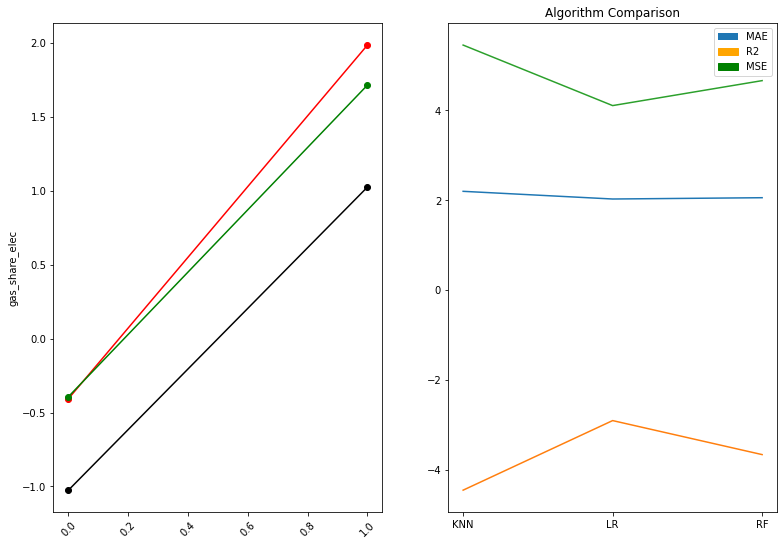

 
RF: Predicted Value from model for : France and  hydro_share_elec
[ 1.36844986 -0.57245798]
 
country  France  Energy Source  hydro_share_elec MSE: 4.04
country  France  Energy Source  hydro_share_elec r2: -3.04
country  France  Energy Source  hydro_share_elec Mean absolute error: 1.97
 
KNN: Predicted Value from model for : France and  hydro_share_elec
[ 1.2673781  -0.60885386]
 
country  France  Energy Source  hydro_share_elec MSE: 3.86
country  France  Energy Source  hydro_share_elec r2: -2.86
country  France  Energy Source  hydro_share_elec Mean absolute error: 1.94
Coefficients: [ 0.94715927 -0.03203723]
Intercept: 1.3294333616623743e-17
 
LR: Predicted Value from model for : France and  hydro_share_elec
 
[ 0.91512204 -0.91512204]
 
country  France  Energy Source  hydro_share_elec Mean absolute error: 1.92
country  France  Energy Source  hydro_share_elec Residual sum of squares (MSE): 3.67
country  France  Energy Source  hydro_share_elec R2-score: -3.38
     MAE    R2  MSE
KNN 

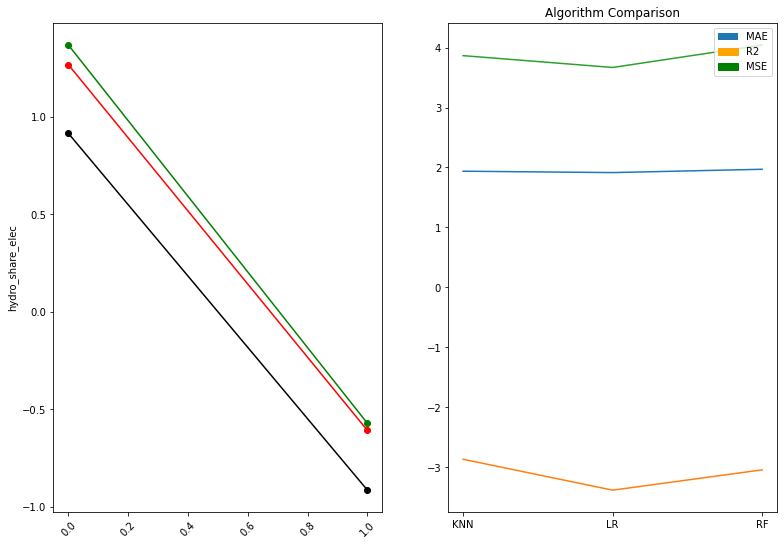

 
RF: Predicted Value from model for : France and  nuclear_share_elec
[ 1.44755576 -0.60726606]
 
country  France  Energy Source  nuclear_share_elec MSE: 0.18
country  France  Energy Source  nuclear_share_elec r2: 0.82
country  France  Energy Source  nuclear_share_elec Mean absolute error: 0.42
 
KNN: Predicted Value from model for : France and  nuclear_share_elec
[ 1.55140714 -0.62975857]
 
country  France  Energy Source  nuclear_share_elec MSE: 0.22
country  France  Energy Source  nuclear_share_elec r2: 0.78
country  France  Energy Source  nuclear_share_elec Mean absolute error: 0.46
Coefficients: [0.98207854 0.01193578]
Intercept: 3.2721459937514545e-16
 
LR: Predicted Value from model for : France and  nuclear_share_elec
 
[ 0.99401432 -0.99401432]
 
country  France  Energy Source  nuclear_share_elec Mean absolute error: 0.01
country  France  Energy Source  nuclear_share_elec Residual sum of squares (MSE): 0.00
country  France  Energy Source  nuclear_share_elec R2-score: 1.00
     

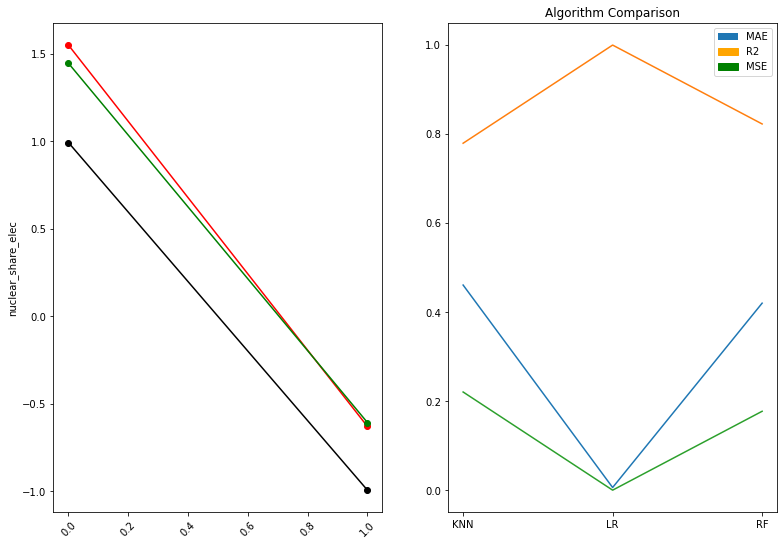

 
RF: Predicted Value from model for : France and  oil_share_elec
[-0.39864141  2.39767418]
 
country  France  Energy Source  oil_share_elec MSE: 1.16
country  France  Energy Source  oil_share_elec r2: -0.16
country  France  Energy Source  oil_share_elec Mean absolute error: 1.00
 
KNN: Predicted Value from model for : France and  oil_share_elec
[-0.4274323   2.36889989]
 
country  France  Energy Source  oil_share_elec MSE: 1.10
country  France  Energy Source  oil_share_elec r2: -0.10
country  France  Energy Source  oil_share_elec Mean absolute error: 0.97
Coefficients: [ 0.96296713 -0.03368037]
Intercept: 2.5590265186350376e-17
 
LR: Predicted Value from model for : France and  oil_share_elec
 
[-0.92928676  0.92928676]
 
country  France  Energy Source  oil_share_elec Mean absolute error: 0.07
country  France  Energy Source  oil_share_elec Residual sum of squares (MSE): 0.01
country  France  Energy Source  oil_share_elec R2-score: 0.99
     MAE    R2  MSE
KNN 0.97 -0.10 1.10
LR  0.07 

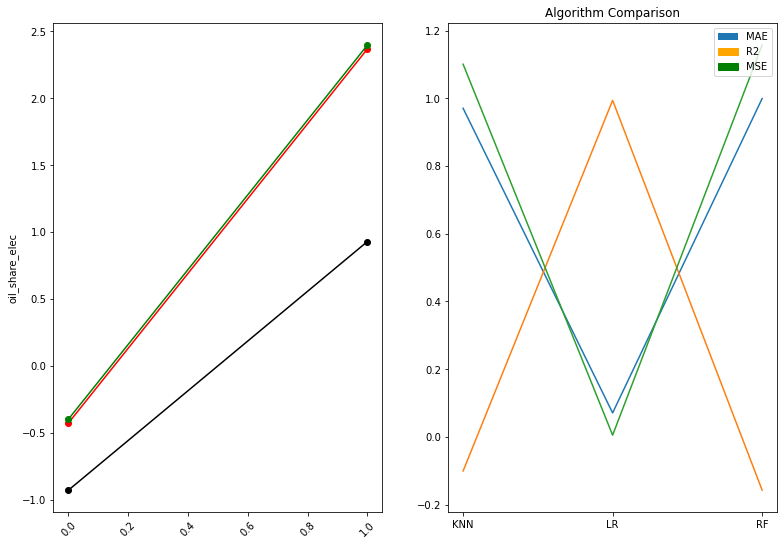

 
RF: Predicted Value from model for : France and  other_renewables_share_elec
[-0.54837065  0.96855382]
 
country  France  Energy Source  other_renewables_share_elec MSE: 0.10
country  France  Energy Source  other_renewables_share_elec r2: 0.90
country  France  Energy Source  other_renewables_share_elec Mean absolute error: 0.24
 
KNN: Predicted Value from model for : France and  other_renewables_share_elec
[-0.56428273  0.74900802]
 
country  France  Energy Source  other_renewables_share_elec MSE: 0.13
country  France  Energy Source  other_renewables_share_elec r2: 0.87
country  France  Energy Source  other_renewables_share_elec Mean absolute error: 0.34
Coefficients: [ 0.99664271 -0.01360155]
Intercept: -1.5394956816818094e-16
 
LR: Predicted Value from model for : France and  other_renewables_share_elec
 
[-1.01024425  1.01024425]
 
country  France  Energy Source  other_renewables_share_elec Mean absolute error: 0.01
country  France  Energy Source  other_renewables_share_elec Resid

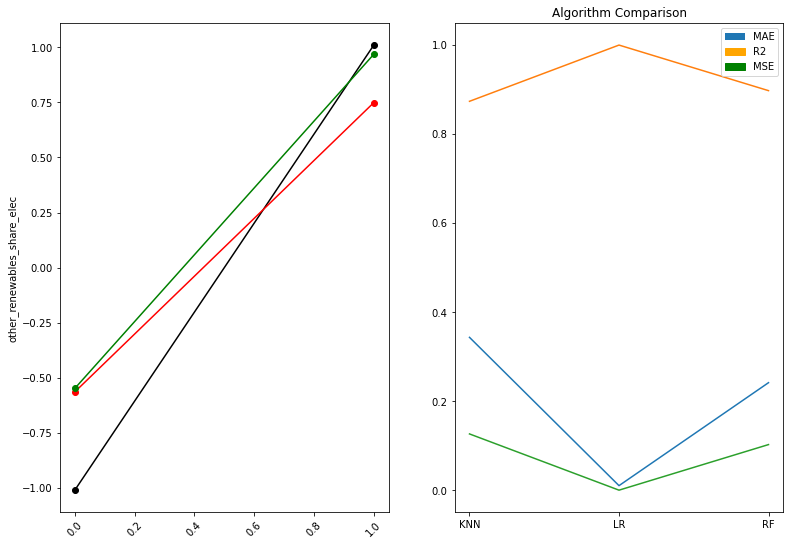

 
RF: Predicted Value from model for : France and  renewables_share_elec
[-0.5835357   1.09504313]
 
country  France  Energy Source  renewables_share_elec MSE: 0.09
country  France  Energy Source  renewables_share_elec r2: 0.91
country  France  Energy Source  renewables_share_elec Mean absolute error: 0.26
 
KNN: Predicted Value from model for : France and  renewables_share_elec
[-0.61660166  1.3393698 ]
 
country  France  Energy Source  renewables_share_elec MSE: 0.13
country  France  Energy Source  renewables_share_elec r2: 0.87
country  France  Energy Source  renewables_share_elec Mean absolute error: 0.36
Coefficients: [ 0.95812159 -0.02916596]
Intercept: 1.7959074849744554e-17
 
LR: Predicted Value from model for : France and  renewables_share_elec
 
[-0.98728755  0.98728755]
 
country  France  Energy Source  renewables_share_elec Mean absolute error: 0.01
country  France  Energy Source  renewables_share_elec Residual sum of squares (MSE): 0.00
country  France  Energy Source  rene

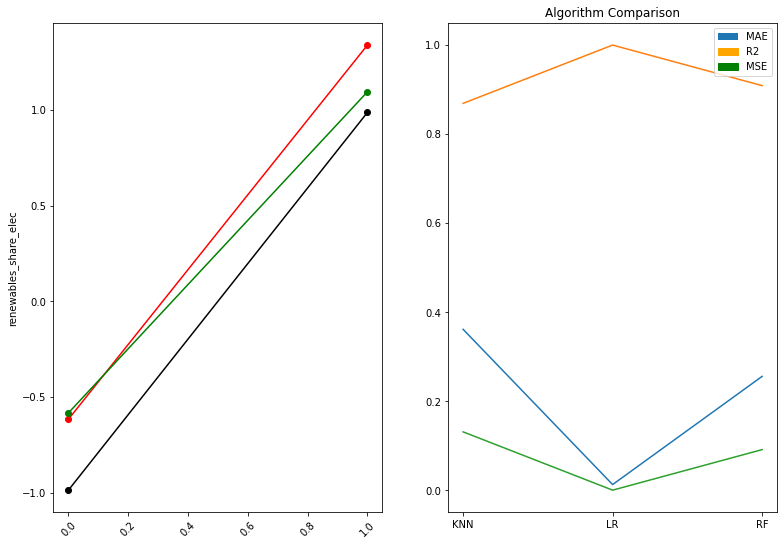

 
RF: Predicted Value from model for : France and  solar_share_elec
[-0.24102798  1.63674893]
 
country  France  Energy Source  solar_share_elec MSE: 0.49
country  France  Energy Source  solar_share_elec r2: 0.51
country  France  Energy Source  solar_share_elec Mean absolute error: 0.70
 
KNN: Predicted Value from model for : France and  solar_share_elec
[-0.2410654   0.34279454]
 
country  France  Energy Source  solar_share_elec MSE: 0.50
country  France  Energy Source  solar_share_elec r2: 0.50
country  France  Energy Source  solar_share_elec Mean absolute error: 0.71
Coefficients: [0.86793816 0.14708781]
Intercept: -2.0602664399374082e-17
 
LR: Predicted Value from model for : France and  solar_share_elec
 
[-1.01502598  1.01502598]
 
country  France  Energy Source  solar_share_elec Mean absolute error: 0.02
country  France  Energy Source  solar_share_elec Residual sum of squares (MSE): 0.00
country  France  Energy Source  solar_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.71 

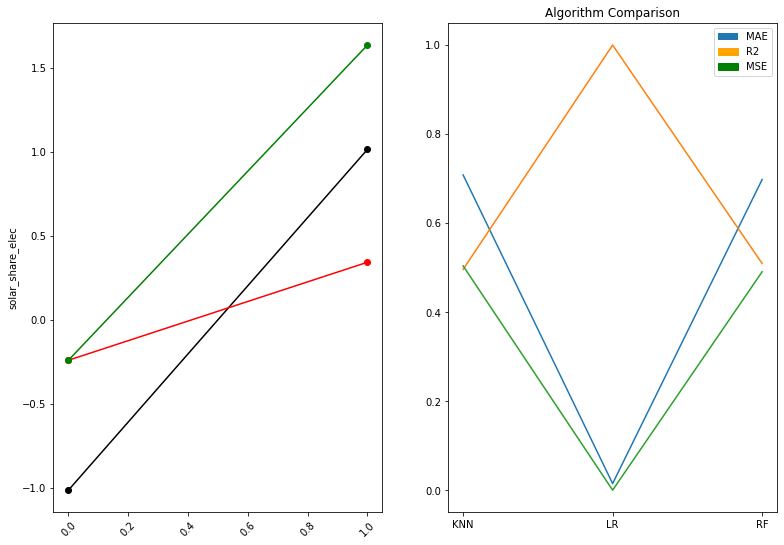

 
RF: Predicted Value from model for : France and  wind_share_elec
[-0.30092123  1.28023198]
 
country  France  Energy Source  wind_share_elec MSE: 0.28
country  France  Energy Source  wind_share_elec r2: 0.72
country  France  Energy Source  wind_share_elec Mean absolute error: 0.49
 
KNN: Predicted Value from model for : France and  wind_share_elec
[-0.30093593  0.45821526]
 
country  France  Energy Source  wind_share_elec MSE: 0.39
country  France  Energy Source  wind_share_elec r2: 0.61
country  France  Energy Source  wind_share_elec Mean absolute error: 0.62
Coefficients: [0.98555075 0.01274277]
Intercept: 6.862292730862519e-17
 
LR: Predicted Value from model for : France and  wind_share_elec
 
[-0.99829353  0.99829353]
 
country  France  Energy Source  wind_share_elec Mean absolute error: 0.00
country  France  Energy Source  wind_share_elec Residual sum of squares (MSE): 0.00
country  France  Energy Source  wind_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.62 0.61 0.39
LR  

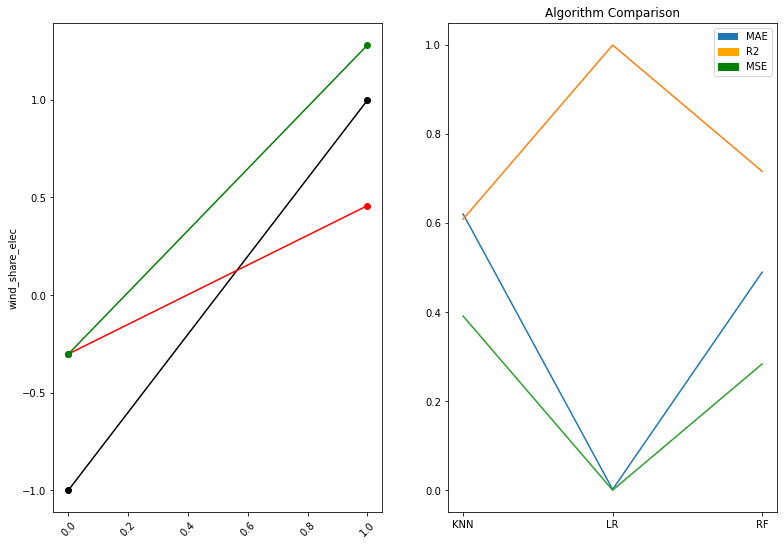

 
RF: Predicted Value from model for : Brazil and  biofuel_share_elec
[ 1.02278994 -0.37928841]
 
country  Brazil  Energy Source  biofuel_share_elec MSE: 3.00
country  Brazil  Energy Source  biofuel_share_elec r2: -2.00
country  Brazil  Energy Source  biofuel_share_elec Mean absolute error: 1.70
 
KNN: Predicted Value from model for : Brazil and  biofuel_share_elec
[ 1.18997069 -0.38935603]
 
country  Brazil  Energy Source  biofuel_share_elec MSE: 3.36
country  Brazil  Energy Source  biofuel_share_elec r2: -2.36
country  Brazil  Energy Source  biofuel_share_elec Mean absolute error: 1.79
Coefficients: [0.98393408 0.01554071]
Intercept: 4.95567494360657e-17
 
LR: Predicted Value from model for : Brazil and  biofuel_share_elec
 
[ 0.99947479 -0.99947479]
 
country  Brazil  Energy Source  biofuel_share_elec Mean absolute error: 2.00
country  Brazil  Energy Source  biofuel_share_elec Residual sum of squares (MSE): 4.00
country  Brazil  Energy Source  biofuel_share_elec R2-score: -3.00
    

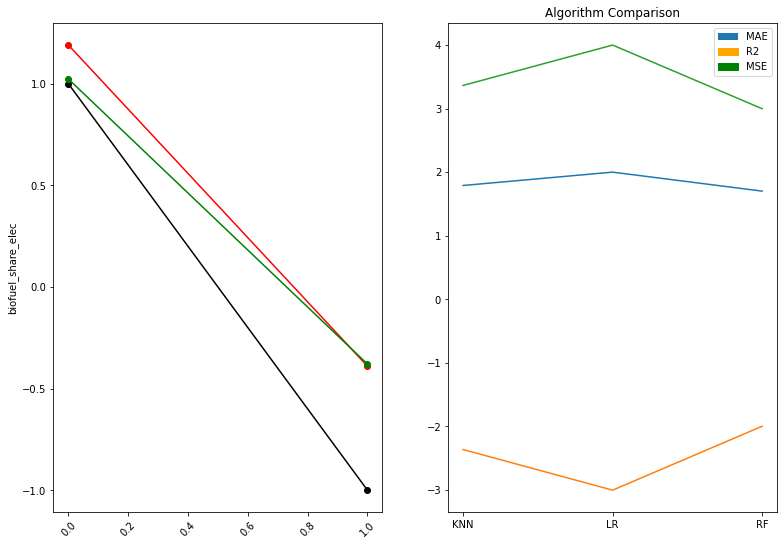

 
RF: Predicted Value from model for : Brazil and  coal_share_elec
[-0.57684429  1.09811623]
 
country  Brazil  Energy Source  coal_share_elec MSE: 3.44
country  Brazil  Energy Source  coal_share_elec r2: -2.44
country  Brazil  Energy Source  coal_share_elec Mean absolute error: 1.84
 
KNN: Predicted Value from model for : Brazil and  coal_share_elec
[-0.60016695  1.27428723]
 
country  Brazil  Energy Source  coal_share_elec MSE: 3.87
country  Brazil  Energy Source  coal_share_elec r2: -2.87
country  Brazil  Energy Source  coal_share_elec Mean absolute error: 1.94
Coefficients: [0.96038527 0.03743082]
Intercept: -2.8970799857759937e-16
 
LR: Predicted Value from model for : Brazil and  coal_share_elec
 
[-0.99781609  0.99781609]
 
country  Brazil  Energy Source  coal_share_elec Mean absolute error: 2.00
country  Brazil  Energy Source  coal_share_elec Residual sum of squares (MSE): 3.99
country  Brazil  Energy Source  coal_share_elec R2-score: -3.01
     MAE    R2  MSE
KNN 1.94 -2.87 3.

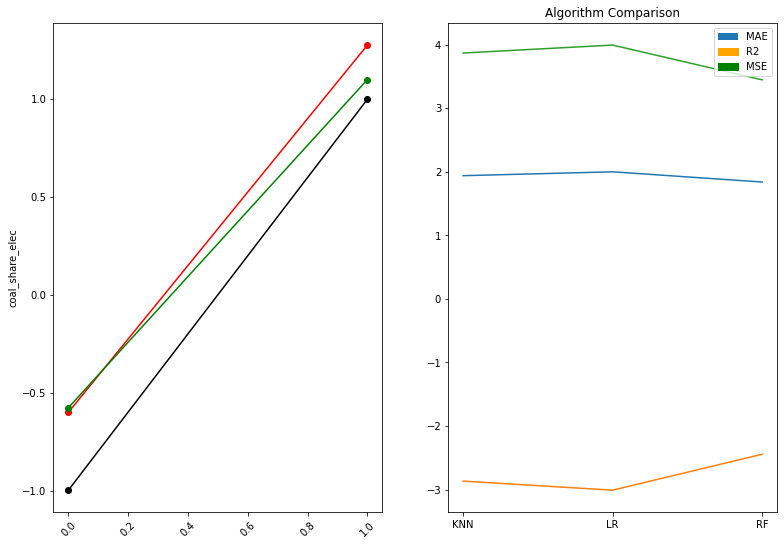

 
RF: Predicted Value from model for : Brazil and  fossil_share_elec
[-0.49493883  1.1932661 ]
 
country  Brazil  Energy Source  fossil_share_elec MSE: 3.52
country  Brazil  Energy Source  fossil_share_elec r2: -2.52
country  Brazil  Energy Source  fossil_share_elec Mean absolute error: 1.84
 
KNN: Predicted Value from model for : Brazil and  fossil_share_elec
[-0.53284778  1.04348217]
 
country  Brazil  Energy Source  fossil_share_elec MSE: 3.26
country  Brazil  Energy Source  fossil_share_elec r2: -2.26
country  Brazil  Energy Source  fossil_share_elec Mean absolute error: 1.79
Coefficients: [ 0.96661447 -0.01676341]
Intercept: 2.1819285525324052e-17
 
LR: Predicted Value from model for : Brazil and  fossil_share_elec
 
[-0.94985106  0.94985106]
 
country  Brazil  Energy Source  fossil_share_elec Mean absolute error: 1.95
country  Brazil  Energy Source  fossil_share_elec Residual sum of squares (MSE): 3.80
country  Brazil  Energy Source  fossil_share_elec R2-score: -3.21
     MAE    

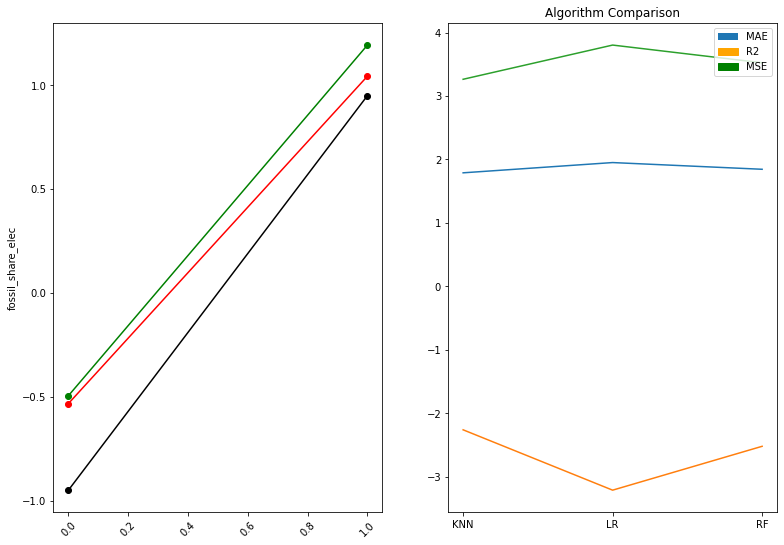

 
RF: Predicted Value from model for : Brazil and  gas_share_elec
[-0.37114925  0.99230726]
 
country  Brazil  Energy Source  gas_share_elec MSE: 2.92
country  Brazil  Energy Source  gas_share_elec r2: -1.92
country  Brazil  Energy Source  gas_share_elec Mean absolute error: 1.68
 
KNN: Predicted Value from model for : Brazil and  gas_share_elec
[-0.37115749  1.01458004]
 
country  Brazil  Energy Source  gas_share_elec MSE: 2.97
country  Brazil  Energy Source  gas_share_elec r2: -1.97
country  Brazil  Energy Source  gas_share_elec Mean absolute error: 1.69
Coefficients: [ 0.98039255 -0.11216514]
Intercept: 9.32228368184345e-17
 
LR: Predicted Value from model for : Brazil and  gas_share_elec
 
[-0.86822741  0.86822741]
 
country  Brazil  Energy Source  gas_share_elec Mean absolute error: 1.87
country  Brazil  Energy Source  gas_share_elec Residual sum of squares (MSE): 3.49
country  Brazil  Energy Source  gas_share_elec R2-score: -3.63
     MAE    R2  MSE
KNN 1.69 -1.97 2.97
LR  1.87 -

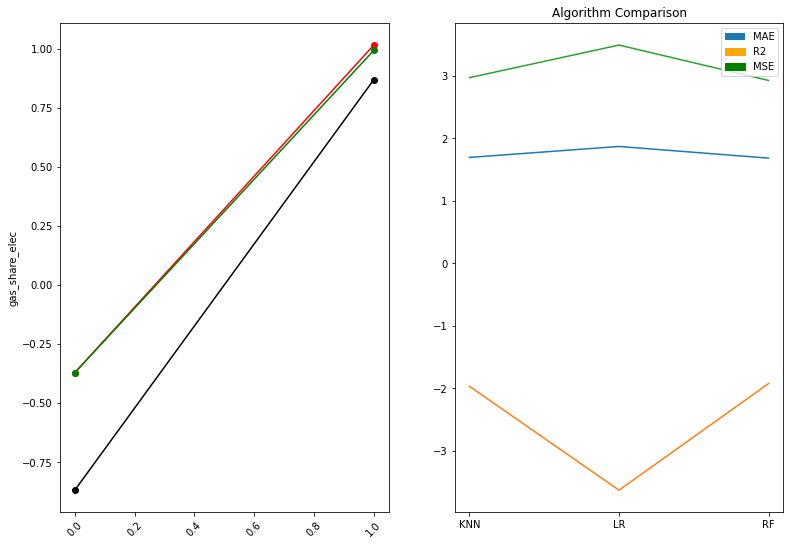

 
RF: Predicted Value from model for : Brazil and  hydro_share_elec
[ 1.08457216 -0.59694863]
 
country  Brazil  Energy Source  hydro_share_elec MSE: 3.45
country  Brazil  Energy Source  hydro_share_elec r2: -2.45
country  Brazil  Energy Source  hydro_share_elec Mean absolute error: 1.84
 
KNN: Predicted Value from model for : Brazil and  hydro_share_elec
[ 1.35259412 -0.62521441]
 
country  Brazil  Energy Source  hydro_share_elec MSE: 4.09
country  Brazil  Energy Source  hydro_share_elec r2: -3.09
country  Brazil  Energy Source  hydro_share_elec Mean absolute error: 1.99
Coefficients: [ 0.97470893 -0.00298087]
Intercept: 7.982540337645639e-17
 
LR: Predicted Value from model for : Brazil and  hydro_share_elec
 
[ 0.97172806 -0.97172806]
 
country  Brazil  Energy Source  hydro_share_elec Mean absolute error: 1.97
country  Brazil  Energy Source  hydro_share_elec Residual sum of squares (MSE): 3.89
country  Brazil  Energy Source  hydro_share_elec R2-score: -3.12
     MAE    R2  MSE
KNN 1

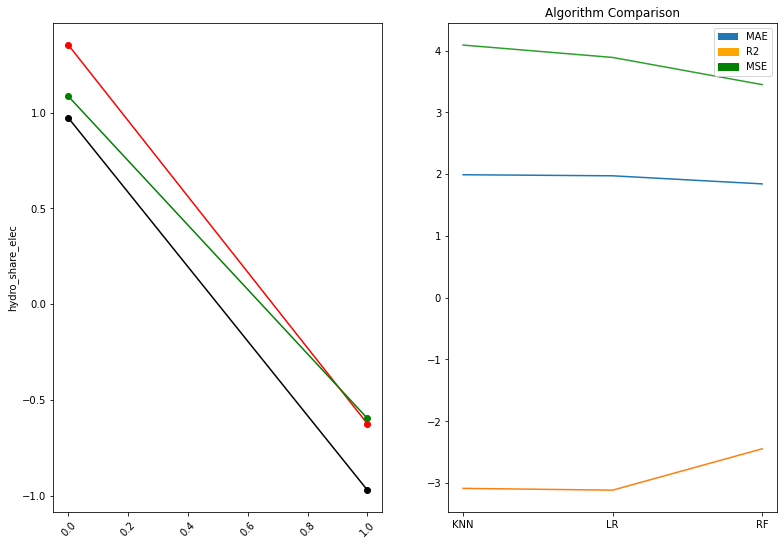

 
RF: Predicted Value from model for : Brazil and  nuclear_share_elec
[ 2.44314146 -0.40443268]
 
country  Brazil  Energy Source  nuclear_share_elec MSE: 1.22
country  Brazil  Energy Source  nuclear_share_elec r2: -0.22
country  Brazil  Energy Source  nuclear_share_elec Mean absolute error: 1.02
 
KNN: Predicted Value from model for : Brazil and  nuclear_share_elec
[ 1.41410493 -0.1439293 ]
 
country  Brazil  Energy Source  nuclear_share_elec MSE: 0.45
country  Brazil  Energy Source  nuclear_share_elec r2: 0.55
country  Brazil  Energy Source  nuclear_share_elec Mean absolute error: 0.64
Coefficients: [ 0.9471808  -0.08371549]
Intercept: -1.53677108401902e-16
 
LR: Predicted Value from model for : Brazil and  nuclear_share_elec
 
[ 0.86346531 -0.86346531]
 
country  Brazil  Energy Source  nuclear_share_elec Mean absolute error: 0.14
country  Brazil  Energy Source  nuclear_share_elec Residual sum of squares (MSE): 0.02
country  Brazil  Energy Source  nuclear_share_elec R2-score: 0.97
   

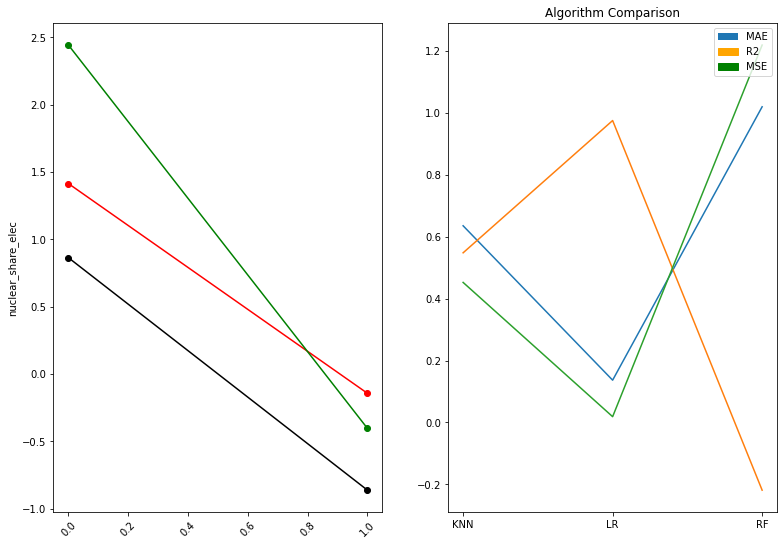

 
RF: Predicted Value from model for : Brazil and  oil_share_elec
[ 1.21216326 -0.58452266]
 
country  Brazil  Energy Source  oil_share_elec MSE: 3.70
country  Brazil  Energy Source  oil_share_elec r2: -2.70
country  Brazil  Energy Source  oil_share_elec Mean absolute error: 1.90
 
KNN: Predicted Value from model for : Brazil and  oil_share_elec
[ 1.39042944 -0.59982127]
 
country  Brazil  Energy Source  oil_share_elec MSE: 4.14
country  Brazil  Energy Source  oil_share_elec r2: -3.14
country  Brazil  Energy Source  oil_share_elec Mean absolute error: 2.00
Coefficients: [0.93348532 0.05977333]
Intercept: -1.1079393027286098e-16
 
LR: Predicted Value from model for : Brazil and  oil_share_elec
 
[ 0.99325865 -0.99325865]
 
country  Brazil  Energy Source  oil_share_elec Mean absolute error: 1.99
country  Brazil  Energy Source  oil_share_elec Residual sum of squares (MSE): 3.97
country  Brazil  Energy Source  oil_share_elec R2-score: -3.03
     MAE    R2  MSE
KNN 2.00 -3.14 4.14
LR  1.99 

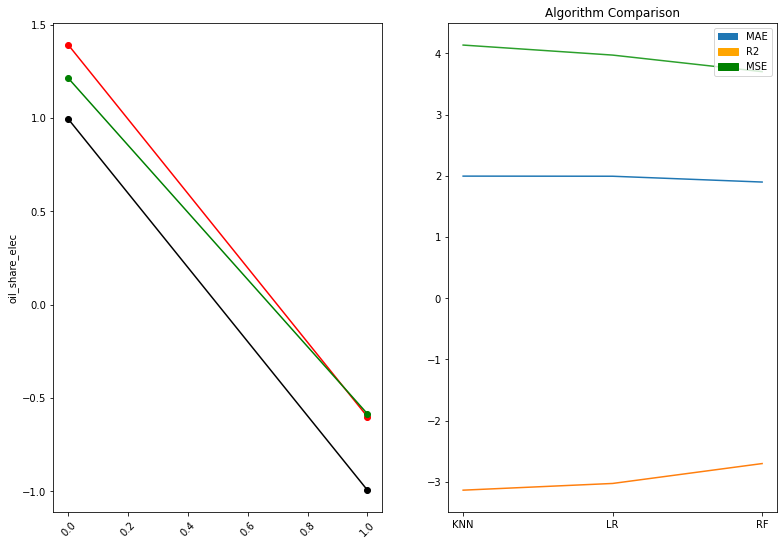

 
RF: Predicted Value from model for : Brazil and  other_renewables_share_elec
[ 1.01842222 -0.4973059 ]
 
country  Brazil  Energy Source  other_renewables_share_elec MSE: 3.16
country  Brazil  Energy Source  other_renewables_share_elec r2: -2.16
country  Brazil  Energy Source  other_renewables_share_elec Mean absolute error: 1.76
 
KNN: Predicted Value from model for : Brazil and  other_renewables_share_elec
[ 0.82880192 -0.50602169]
 
country  Brazil  Energy Source  other_renewables_share_elec MSE: 2.81
country  Brazil  Energy Source  other_renewables_share_elec r2: -1.81
country  Brazil  Energy Source  other_renewables_share_elec Mean absolute error: 1.67
Coefficients: [ 1.0007677  -0.00877639]
Intercept: 9.892993011675575e-17
 
LR: Predicted Value from model for : Brazil and  other_renewables_share_elec
 
[ 0.9919913 -0.9919913]
 
country  Brazil  Energy Source  other_renewables_share_elec Mean absolute error: 1.99
country  Brazil  Energy Source  other_renewables_share_elec Residua

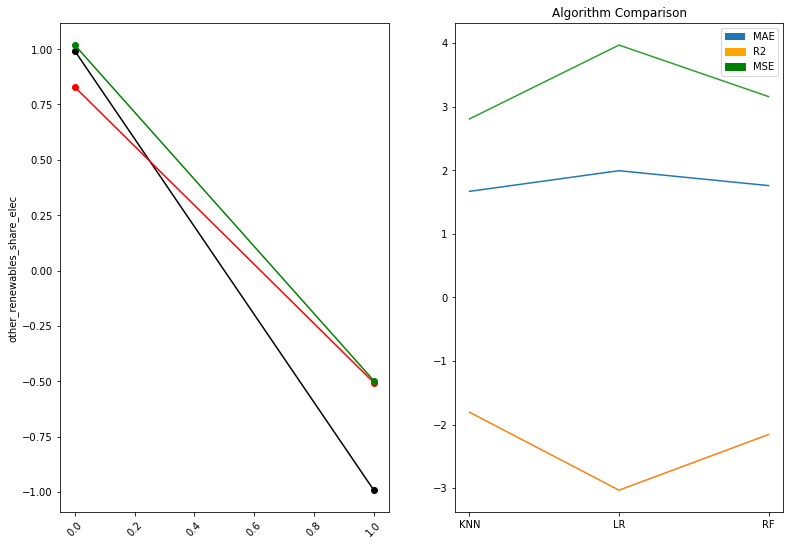

 
RF: Predicted Value from model for : Brazil and  renewables_share_elec
[-0.60120479  1.25543433]
 
country  Brazil  Energy Source  renewables_share_elec MSE: 0.11
country  Brazil  Energy Source  renewables_share_elec r2: 0.89
country  Brazil  Energy Source  renewables_share_elec Mean absolute error: 0.33
 
KNN: Predicted Value from model for : Brazil and  renewables_share_elec
[-0.62864682  1.35615436]
 
country  Brazil  Energy Source  renewables_share_elec MSE: 0.13
country  Brazil  Energy Source  renewables_share_elec r2: 0.87
country  Brazil  Energy Source  renewables_share_elec Mean absolute error: 0.36
Coefficients: [ 0.97647201 -0.00405444]
Intercept: 1.726753159047519e-16
 
LR: Predicted Value from model for : Brazil and  renewables_share_elec
 
[-0.98052644  0.98052644]
 
country  Brazil  Energy Source  renewables_share_elec Mean absolute error: 0.02
country  Brazil  Energy Source  renewables_share_elec Residual sum of squares (MSE): 0.00
country  Brazil  Energy Source  renew

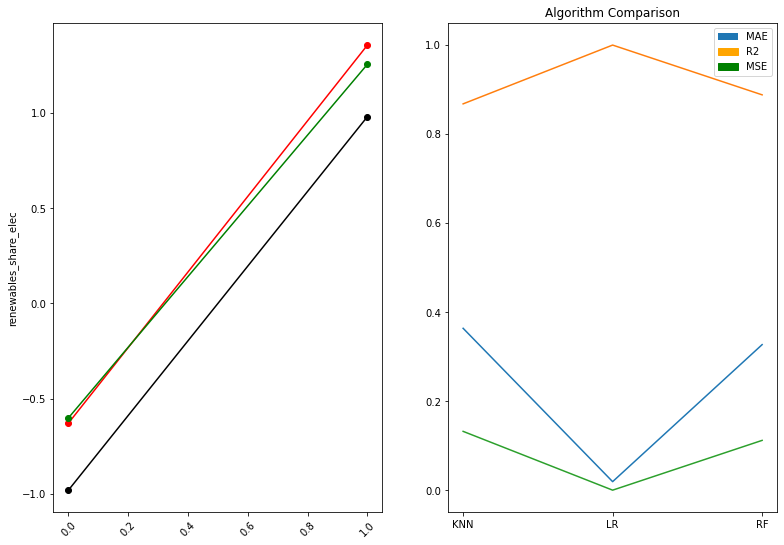

 
RF: Predicted Value from model for : Brazil and  solar_share_elec
[-0.11136901  0.00974556]
 
country  Brazil  Energy Source  solar_share_elec MSE: 0.89
country  Brazil  Energy Source  solar_share_elec r2: 0.11
country  Brazil  Energy Source  solar_share_elec Mean absolute error: 0.94
 
KNN: Predicted Value from model for : Brazil and  solar_share_elec
[-0.09705678  0.07259293]
 
country  Brazil  Energy Source  solar_share_elec MSE: 0.84
country  Brazil  Energy Source  solar_share_elec r2: 0.16
country  Brazil  Energy Source  solar_share_elec Mean absolute error: 0.92
Coefficients: [ 2.06594234 -1.27379217]
Intercept: 8.435145573206362e-17
 
LR: Predicted Value from model for : Brazil and  solar_share_elec
 
[-0.79215017  0.79215017]
 
country  Brazil  Energy Source  solar_share_elec Mean absolute error: 0.21
country  Brazil  Energy Source  solar_share_elec Residual sum of squares (MSE): 0.04
country  Brazil  Energy Source  solar_share_elec R2-score: 0.93
     MAE   R2  MSE
KNN 0.92 

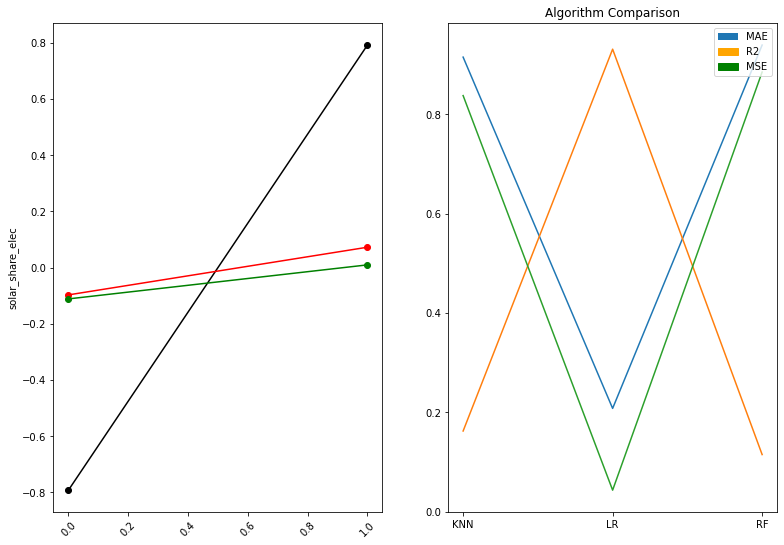

 
RF: Predicted Value from model for : Brazil and  wind_share_elec
[-0.20703624  1.16925257]
 
country  Brazil  Energy Source  wind_share_elec MSE: 0.33
country  Brazil  Energy Source  wind_share_elec r2: 0.67
country  Brazil  Energy Source  wind_share_elec Mean absolute error: 0.48
 
KNN: Predicted Value from model for : Brazil and  wind_share_elec
[-0.20700523  1.01273775]
 
country  Brazil  Energy Source  wind_share_elec MSE: 0.31
country  Brazil  Energy Source  wind_share_elec r2: 0.69
country  Brazil  Energy Source  wind_share_elec Mean absolute error: 0.40
Coefficients: [0.52694177 0.46741531]
Intercept: 7.797764195832892e-17
 
LR: Predicted Value from model for : Brazil and  wind_share_elec
 
[-0.99435708  0.99435708]
 
country  Brazil  Energy Source  wind_share_elec Mean absolute error: 0.01
country  Brazil  Energy Source  wind_share_elec Residual sum of squares (MSE): 0.00
country  Brazil  Energy Source  wind_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.40 0.69 0.31
LR  

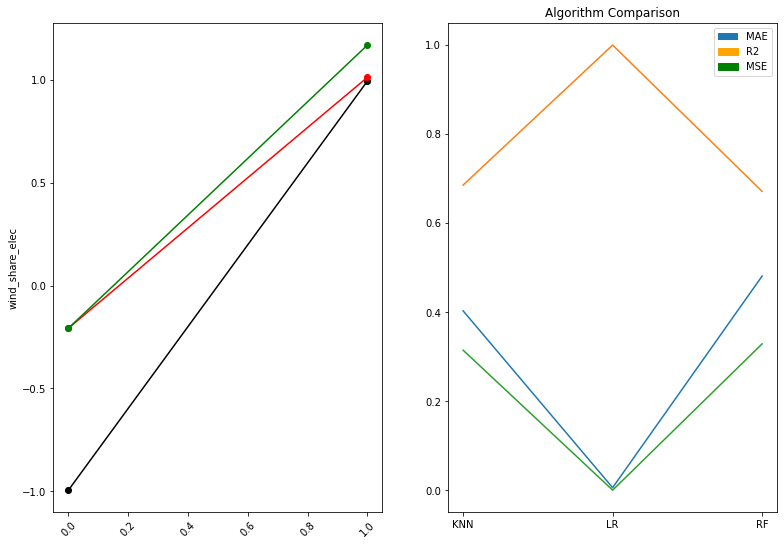

 
RF: Predicted Value from model for : Mexico and  biofuel_share_elec
[-0.19153594  1.24581991]
 
country  Mexico  Energy Source  biofuel_share_elec MSE: 0.36
country  Mexico  Energy Source  biofuel_share_elec r2: 0.64
country  Mexico  Energy Source  biofuel_share_elec Mean absolute error: 0.53
 
KNN: Predicted Value from model for : Mexico and  biofuel_share_elec
[-0.37301788  1.20947922]
 
country  Mexico  Energy Source  biofuel_share_elec MSE: 0.22
country  Mexico  Energy Source  biofuel_share_elec r2: 0.78
country  Mexico  Energy Source  biofuel_share_elec Mean absolute error: 0.42
Coefficients: [0.90595335 0.08596631]
Intercept: 5.572648033056395e-17
 
LR: Predicted Value from model for : Mexico and  biofuel_share_elec
 
[-0.99191966  0.99191966]
 
country  Mexico  Energy Source  biofuel_share_elec Mean absolute error: 0.01
country  Mexico  Energy Source  biofuel_share_elec Residual sum of squares (MSE): 0.00
country  Mexico  Energy Source  biofuel_share_elec R2-score: 1.00
     M

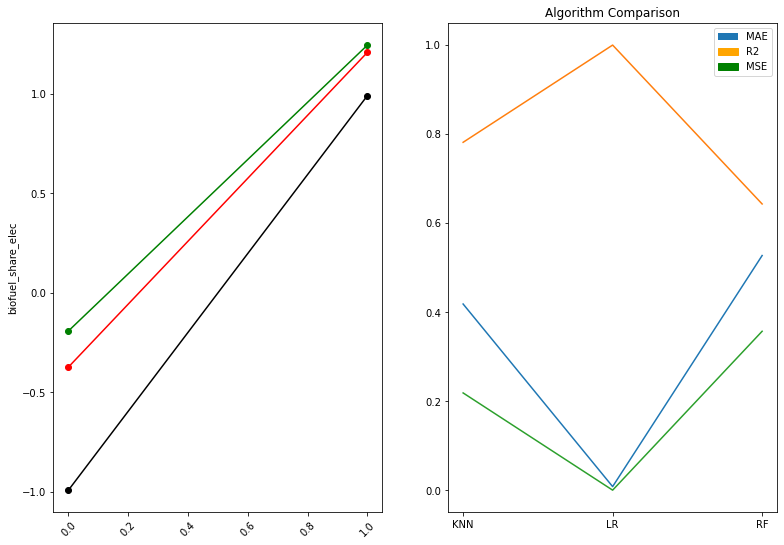

 
RF: Predicted Value from model for : Mexico and  coal_share_elec
[ 1.0025636 -0.5990801]
 
country  Mexico  Energy Source  coal_share_elec MSE: 0.08
country  Mexico  Energy Source  coal_share_elec r2: 0.92
country  Mexico  Energy Source  coal_share_elec Mean absolute error: 0.20
 
KNN: Predicted Value from model for : Mexico and  coal_share_elec
[ 1.1879583  -0.60945717]
 
country  Mexico  Energy Source  coal_share_elec MSE: 0.09
country  Mexico  Energy Source  coal_share_elec r2: 0.91
country  Mexico  Energy Source  coal_share_elec Mean absolute error: 0.29
Coefficients: [ 0.98564278 -0.02335544]
Intercept: -1.1869661948748033e-16
 
LR: Predicted Value from model for : Mexico and  coal_share_elec
 
[ 0.96228734 -0.96228734]
 
country  Mexico  Energy Source  coal_share_elec Mean absolute error: 0.04
country  Mexico  Energy Source  coal_share_elec Residual sum of squares (MSE): 0.00
country  Mexico  Energy Source  coal_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.29 0.91 0.09
LR

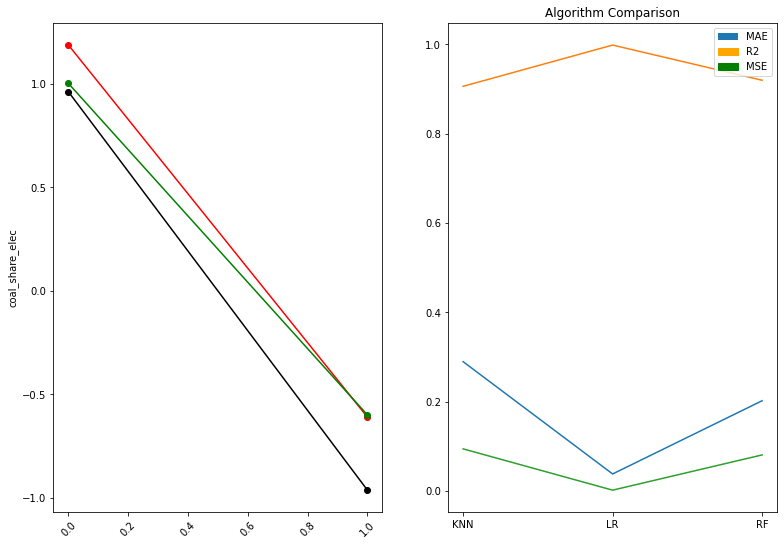

 
RF: Predicted Value from model for : Mexico and  fossil_share_elec
[-0.60641988  1.55183036]
 
country  Mexico  Energy Source  fossil_share_elec MSE: 4.55
country  Mexico  Energy Source  fossil_share_elec r2: -3.55
country  Mexico  Energy Source  fossil_share_elec Mean absolute error: 2.08
 
KNN: Predicted Value from model for : Mexico and  fossil_share_elec
[-0.6295413   1.55664629]
 
country  Mexico  Energy Source  fossil_share_elec MSE: 4.60
country  Mexico  Energy Source  fossil_share_elec r2: -3.60
country  Mexico  Energy Source  fossil_share_elec Mean absolute error: 2.09
Coefficients: [0.98026383 0.01348827]
Intercept: 5.971176139293722e-17
 
LR: Predicted Value from model for : Mexico and  fossil_share_elec
 
[-0.9937521  0.9937521]
 
country  Mexico  Energy Source  fossil_share_elec Mean absolute error: 1.99
country  Mexico  Energy Source  fossil_share_elec Residual sum of squares (MSE): 3.98
country  Mexico  Energy Source  fossil_share_elec R2-score: -3.03
     MAE    R2  M

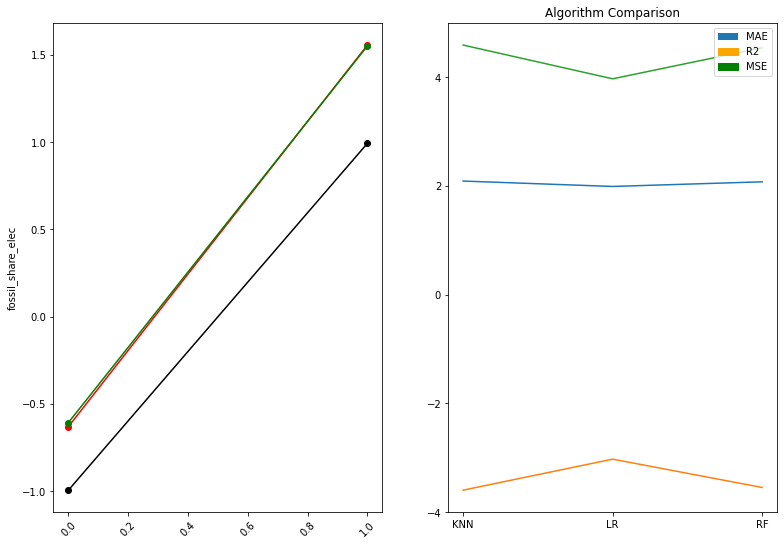

 
RF: Predicted Value from model for : Mexico and  gas_share_elec
[-0.50292219  1.36332967]
 
country  Mexico  Energy Source  gas_share_elec MSE: 3.92
country  Mexico  Energy Source  gas_share_elec r2: -2.92
country  Mexico  Energy Source  gas_share_elec Mean absolute error: 1.93
 
KNN: Predicted Value from model for : Mexico and  gas_share_elec
[-0.50809922  0.79233968]
 
country  Mexico  Energy Source  gas_share_elec MSE: 2.74
country  Mexico  Energy Source  gas_share_elec r2: -1.74
country  Mexico  Energy Source  gas_share_elec Mean absolute error: 1.65
Coefficients: [9.95185075e-01 5.92635263e-04]
Intercept: 1.5591763121184688e-17
 
LR: Predicted Value from model for : Mexico and  gas_share_elec
 
[-0.99577771  0.99577771]
 
country  Mexico  Energy Source  gas_share_elec Mean absolute error: 2.00
country  Mexico  Energy Source  gas_share_elec Residual sum of squares (MSE): 3.98
country  Mexico  Energy Source  gas_share_elec R2-score: -3.02
     MAE    R2  MSE
KNN 1.65 -1.74 2.74
LR

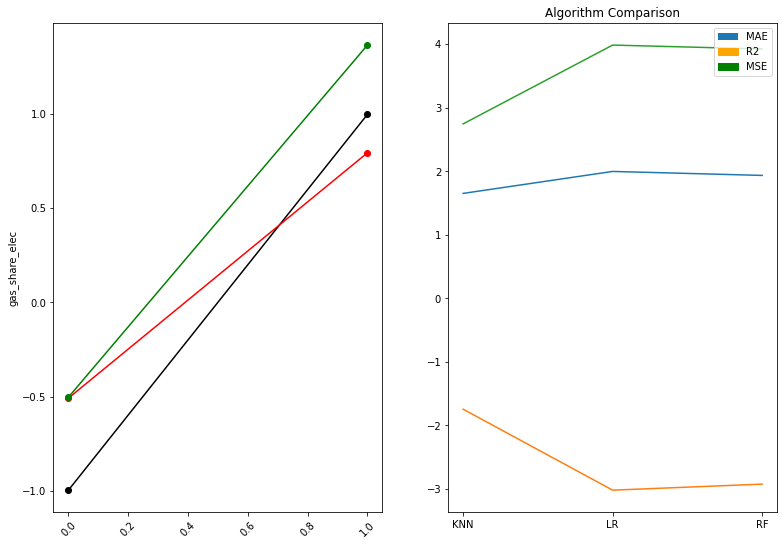

 
RF: Predicted Value from model for : Mexico and  hydro_share_elec
[ 1.07344287 -0.54751922]
 
country  Mexico  Energy Source  hydro_share_elec MSE: 3.35
country  Mexico  Energy Source  hydro_share_elec r2: -2.35
country  Mexico  Energy Source  hydro_share_elec Mean absolute error: 1.81
 
KNN: Predicted Value from model for : Mexico and  hydro_share_elec
[ 0.95584123 -0.59499167]
 
country  Mexico  Energy Source  hydro_share_elec MSE: 3.18
country  Mexico  Energy Source  hydro_share_elec r2: -2.18
country  Mexico  Energy Source  hydro_share_elec Mean absolute error: 1.78
Coefficients: [ 0.92638996 -0.09674097]
Intercept: -1.4904399566356595e-16
 
LR: Predicted Value from model for : Mexico and  hydro_share_elec
 
[ 0.82964899 -0.82964899]
 
country  Mexico  Energy Source  hydro_share_elec Mean absolute error: 1.83
country  Mexico  Energy Source  hydro_share_elec Residual sum of squares (MSE): 3.35
country  Mexico  Energy Source  hydro_share_elec R2-score: -3.86
     MAE    R2  MSE
KNN

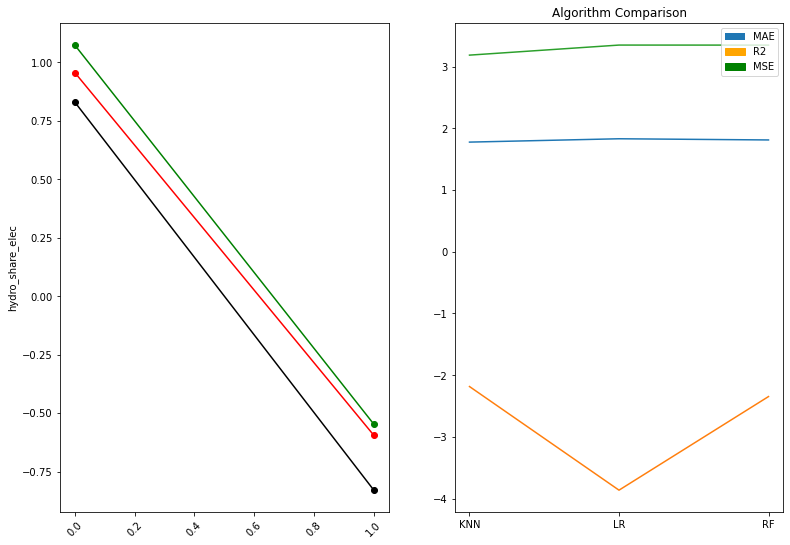

 
RF: Predicted Value from model for : Mexico and  nuclear_share_elec
[ 1.21764812 -0.54400593]
 
country  Mexico  Energy Source  nuclear_share_elec MSE: 3.65
country  Mexico  Energy Source  nuclear_share_elec r2: -2.65
country  Mexico  Energy Source  nuclear_share_elec Mean absolute error: 1.88
 
KNN: Predicted Value from model for : Mexico and  nuclear_share_elec
[ 1.22834373 -0.54614308]
 
country  Mexico  Energy Source  nuclear_share_elec MSE: 3.68
country  Mexico  Energy Source  nuclear_share_elec r2: -2.68
country  Mexico  Energy Source  nuclear_share_elec Mean absolute error: 1.89
Coefficients: [ 0.97823741 -0.10597363]
Intercept: -8.484892120800044e-17
 
LR: Predicted Value from model for : Mexico and  nuclear_share_elec
 
[ 0.87226377 -0.87226377]
 
country  Mexico  Energy Source  nuclear_share_elec Mean absolute error: 1.87
country  Mexico  Energy Source  nuclear_share_elec Residual sum of squares (MSE): 3.51
country  Mexico  Energy Source  nuclear_share_elec R2-score: -3.61


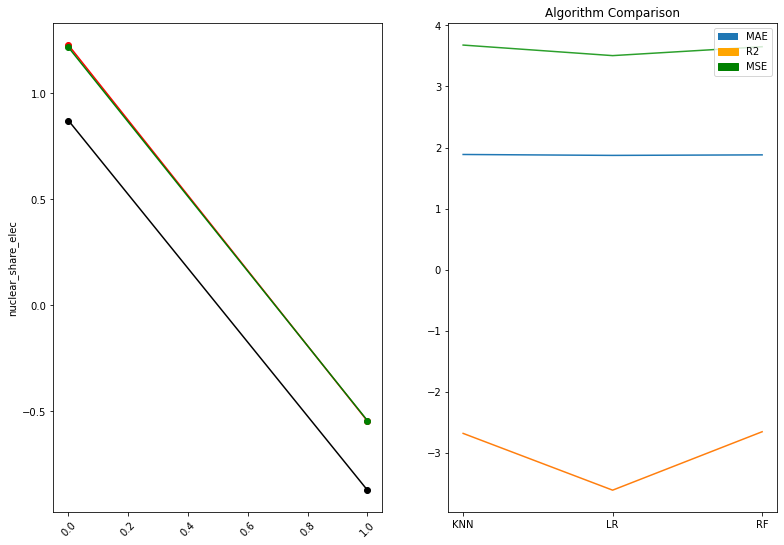

 
RF: Predicted Value from model for : Mexico and  oil_share_elec
[-0.5124026   0.80514656]
 
country  Mexico  Energy Source  oil_share_elec MSE: 0.14
country  Mexico  Energy Source  oil_share_elec r2: 0.86
country  Mexico  Energy Source  oil_share_elec Mean absolute error: 0.34
 
KNN: Predicted Value from model for : Mexico and  oil_share_elec
[-0.44113263  0.89500706]
 
country  Mexico  Energy Source  oil_share_elec MSE: 0.16
country  Mexico  Energy Source  oil_share_elec r2: 0.84
country  Mexico  Energy Source  oil_share_elec Mean absolute error: 0.33
Coefficients: [0.95246948 0.03025911]
Intercept: -5.357757020368029e-17
 
LR: Predicted Value from model for : Mexico and  oil_share_elec
 
[-0.98272859  0.98272859]
 
country  Mexico  Energy Source  oil_share_elec Mean absolute error: 0.02
country  Mexico  Energy Source  oil_share_elec Residual sum of squares (MSE): 0.00
country  Mexico  Energy Source  oil_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.33 0.84 0.16
LR  0.02 1.00 0

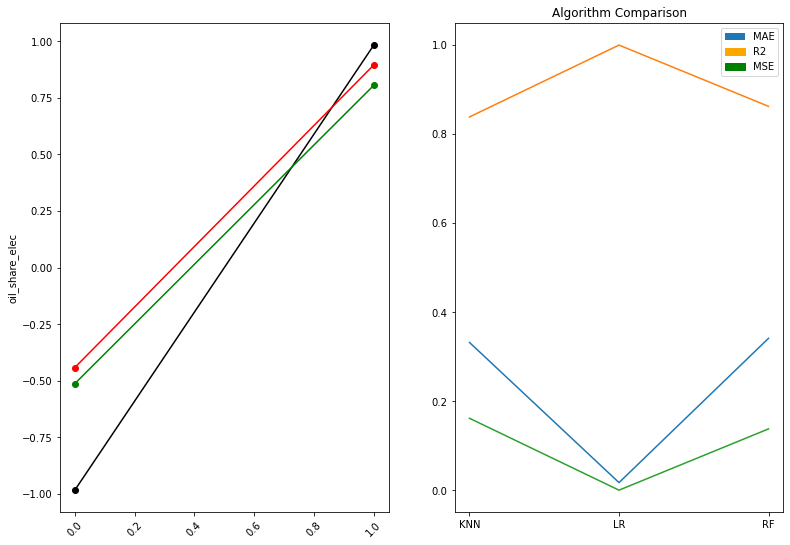

 
RF: Predicted Value from model for : Mexico and  other_renewables_share_elec
[-0.59588407  0.88312741]
 
country  Mexico  Energy Source  other_renewables_share_elec MSE: 3.05
country  Mexico  Energy Source  other_renewables_share_elec r2: -2.05
country  Mexico  Energy Source  other_renewables_share_elec Mean absolute error: 1.74
 
KNN: Predicted Value from model for : Mexico and  other_renewables_share_elec
[-0.607965    1.16300887]
 
country  Mexico  Energy Source  other_renewables_share_elec MSE: 3.63
country  Mexico  Energy Source  other_renewables_share_elec r2: -2.63
country  Mexico  Energy Source  other_renewables_share_elec Mean absolute error: 1.89
Coefficients: [0.97787485 0.06852989]
Intercept: 1.3671839868905366e-16
 
LR: Predicted Value from model for : Mexico and  other_renewables_share_elec
 
[-1.04640473  1.04640473]
 
country  Mexico  Energy Source  other_renewables_share_elec Mean absolute error: 2.05
country  Mexico  Energy Source  other_renewables_share_elec Residu

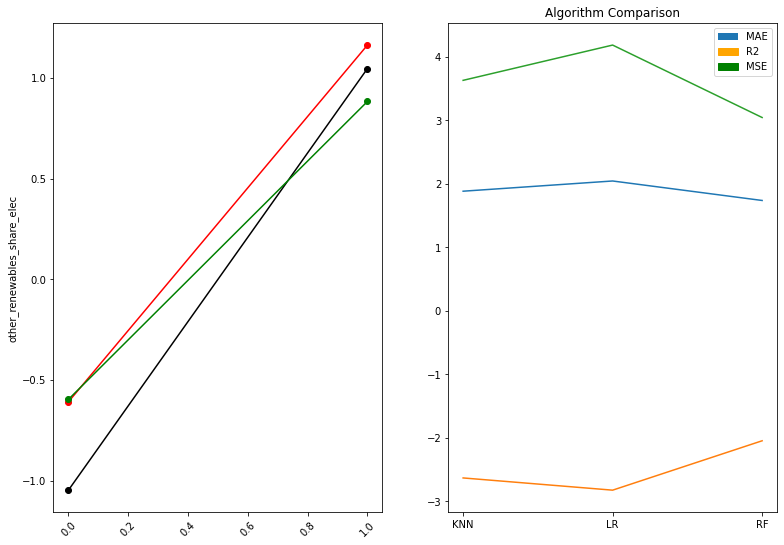

 
RF: Predicted Value from model for : Mexico and  renewables_share_elec
[-0.56939941  1.11999689]
 
country  Mexico  Energy Source  renewables_share_elec MSE: 0.10
country  Mexico  Energy Source  renewables_share_elec r2: 0.90
country  Mexico  Energy Source  renewables_share_elec Mean absolute error: 0.28
 
KNN: Predicted Value from model for : Mexico and  renewables_share_elec
[-0.61009699  1.18867598]
 
country  Mexico  Energy Source  renewables_share_elec MSE: 0.09
country  Mexico  Energy Source  renewables_share_elec r2: 0.91
country  Mexico  Energy Source  renewables_share_elec Mean absolute error: 0.29
Coefficients: [ 0.9471432 -0.0696322]
Intercept: 2.9098824019596596e-16
 
LR: Predicted Value from model for : Mexico and  renewables_share_elec
 
[-0.877511  0.877511]
 
country  Mexico  Energy Source  renewables_share_elec Mean absolute error: 0.12
country  Mexico  Energy Source  renewables_share_elec Residual sum of squares (MSE): 0.02
country  Mexico  Energy Source  renewables

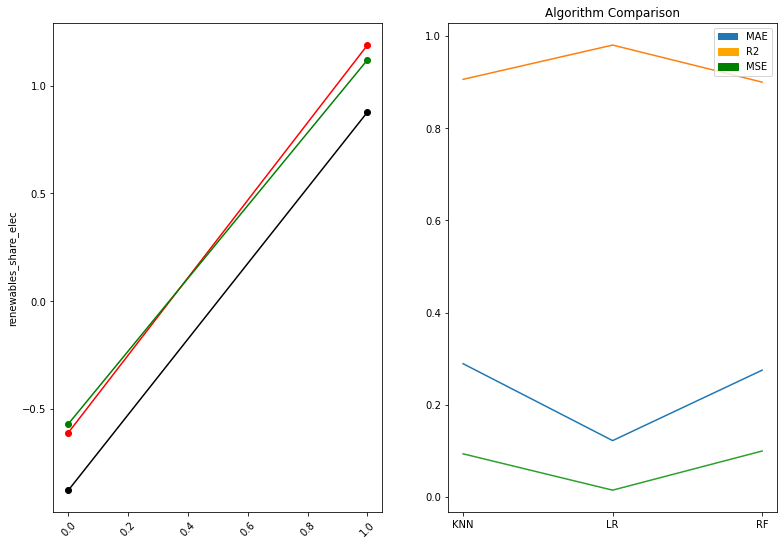

 
RF: Predicted Value from model for : Mexico and  solar_share_elec
[-0.19254091  0.83862611]
 
country  Mexico  Energy Source  solar_share_elec MSE: 0.34
country  Mexico  Energy Source  solar_share_elec r2: 0.66
country  Mexico  Energy Source  solar_share_elec Mean absolute error: 0.48
 
KNN: Predicted Value from model for : Mexico and  solar_share_elec
[-0.19285773  0.74036037]
 
country  Mexico  Energy Source  solar_share_elec MSE: 0.36
country  Mexico  Energy Source  solar_share_elec r2: 0.64
country  Mexico  Energy Source  solar_share_elec Mean absolute error: 0.53
Coefficients: [0.93948577 0.03812687]
Intercept: -4.38458775171334e-17
 
LR: Predicted Value from model for : Mexico and  solar_share_elec
 
[-0.97761264  0.97761264]
 
country  Mexico  Energy Source  solar_share_elec Mean absolute error: 0.02
country  Mexico  Energy Source  solar_share_elec Residual sum of squares (MSE): 0.00
country  Mexico  Energy Source  solar_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.53 0.

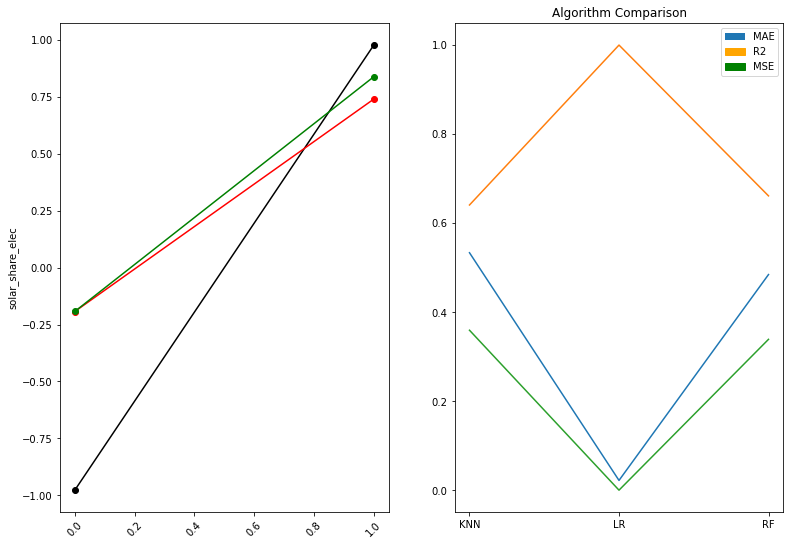

 
RF: Predicted Value from model for : Mexico and  wind_share_elec
[-0.24452197  1.39940371]
 
country  Mexico  Energy Source  wind_share_elec MSE: 0.37
country  Mexico  Energy Source  wind_share_elec r2: 0.63
country  Mexico  Energy Source  wind_share_elec Mean absolute error: 0.58
 
KNN: Predicted Value from model for : Mexico and  wind_share_elec
[-0.24498658  0.99870442]
 
country  Mexico  Energy Source  wind_share_elec MSE: 0.29
country  Mexico  Energy Source  wind_share_elec r2: 0.71
country  Mexico  Energy Source  wind_share_elec Mean absolute error: 0.38
Coefficients: [0.8874633  0.11122236]
Intercept: 1.1866777245792411e-17
 
LR: Predicted Value from model for : Mexico and  wind_share_elec
 
[-0.99868565  0.99868565]
 
country  Mexico  Energy Source  wind_share_elec Mean absolute error: 0.00
country  Mexico  Energy Source  wind_share_elec Residual sum of squares (MSE): 0.00
country  Mexico  Energy Source  wind_share_elec R2-score: 1.00
     MAE   R2  MSE
KNN 0.38 0.71 0.29
LR 

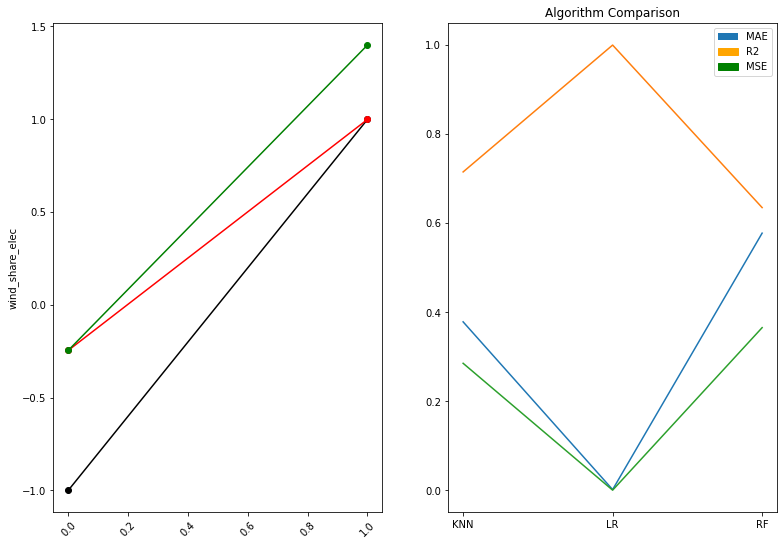

In [297]:
# Create the list of countries of interest

listofcountry= ['United States','United Kingdom','China','India','Germany','France','Brazil','Mexico']

# loop through the list of countries
for country in listofcountry:
    
    # Nested loop to iterate the sources of electricity
    for source in dfShare_Elec.columns[1:]:   

        # Extract country data as a split dataframe   
        dfShare_US =dfShare_Elec[[source]][dfShare_Elec['country']==country]

        # create the new column with last year's values
        dfShare_US.loc[:,'last year']=dfShare_US.loc[:,source].shift()


        # create the another  column with difference between last year's value and year before last year's value
        dfShare_US.loc[:,'last year_diff'] = dfShare_US.loc[:,'last year'].diff()
        
        # drop null values
        dfShare_US=dfShare_US.dropna()

        # Delete the years 1900-1999 from the data set
        #dfShare_Af = dfShare_Af.drop((pd.date_range('1902-01-01', '1999-01-01')), errors='ignore')

       # Split the dataset  
        X_traindf = dfShare_US[:116].drop([source], axis = 1)
        y_traindf = dfShare_US[source][0:116]
        X_testdf = dfShare_US[117:119].drop([source], axis = 1)
        y_testdf = dfShare_US[source][117:119]
        
        # We will convert the Pandas data frame to a Numpy array

        X_train= X_traindf[['last year', 'last year_diff']] .values
        X_test =X_testdf[['last year', 'last year_diff']] .values       
        y_train = y_traindf.values
        y_test = y_testdf.values        
        
      # Normalise the data for use with sklearn
        X_train=stats.zscore(X_train)
        X_test=stats.zscore(X_test)
        y_train=stats.zscore(y_train)
        y_test=stats.zscore(y_test)
          
        # Train the Modelfor RF, KNN & LR
        
        model =RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)
        model=model.fit(X_train,y_train)
        
        
         # Predict the value of y using the model
        y_preds = model.predict(X_test)
 
        # Display the predicted values for the subsequent years
        print(" ")
        print('RF: Predicted Value from model for :',country,'and ',source)
        print(y_preds[0:5])
        print(" ")

        # Display the model evaluation metrices for RandomForest
        print('country ',country,' Energy Source ',source,"MSE: %.2f" % metrics.mean_squared_error(y_test, y_preds))
        print('country ',country,' Energy Source ',source,"r2: %.2f" % metrics.r2_score(y_test, y_preds))
        print('country ',country,' Energy Source ',source,"Mean absolute error: %.2f" % np.mean(np.absolute(y_preds-y_test)))

        MAERF=np.mean(np.absolute(y_preds-y_test))
        R2RF=metrics.r2_score(y_test, y_preds)
        MSERF=metrics.mean_squared_error(y_test, y_preds)       
        
        
        k = 5
        neigh = KNeighborsRegressor(n_neighbors = k,weights='distance').fit(X_train,y_train)
        
        # Predict the value of y using the model
        y_pred = neigh.predict(X_test)
 
        # Display the predicted values for the subsequent years
        print(" ")
        print('KNN: Predicted Value from model for :',country,'and ',source)
        print(y_pred[0:5])
        print(" ")

        # Display the model evaluation metrices for KNN
        print('country ',country,' Energy Source ',source,"MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
        print('country ',country,' Energy Source ',source,"r2: %.2f" % metrics.r2_score(y_test, y_pred))
        print('country ',country,' Energy Source ',source,"Mean absolute error: %.2f" % np.mean(np.absolute(y_pred-y_test)))

        MAEKNN=np.mean(np.absolute(y_pred-y_test))
        R2KNN=metrics.r2_score(y_test, y_pred)
        MSEKNN=metrics.mean_squared_error(y_test, y_pred)

        # Use linear regression model to compare
        regr=LinearRegression()
        regr.fit(X_train,y_train)

        # The coefficients
        print('Coefficients:', regr.coef_)
        print('Intercept:', regr.intercept_)

        print(" ")
        # Print the LR predicted value for subsequent years
        y_prediction =  regr.predict(X_test)
        print('LR: Predicted Value from model for :',country,'and ',source)
        print(" ")
        print(y_prediction)
        
        

        print(" ")
        # Print the LR model evaluation metrices    
        print('country ',country,' Energy Source ',source,"Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction-y_test)))
        print('country ',country,' Energy Source ',source,"Residual sum of squares (MSE): %.2f" % np.mean((y_prediction-y_test)**2))
        print('country ',country,' Energy Source ',source,"R2-score: %.2f" % r2_score(y_prediction,y_test))
        
        MAELR=np.mean(np.absolute(y_prediction-y_test))
        R2LR=r2_score(y_prediction,y_test)
        MSELR=np.mean((y_prediction-y_test)**2)

        ModelResults={'MAE':[MAEKNN,MAELR,MAERF],'R2':[R2KNN,R2LR,R2RF],'MSE':[MSEKNN,MSELR,MSERF]}
        ModelResults=pd.DataFrame(ModelResults,index=['KNN','LR','RF'])
        print(ModelResults)
    
        # Plot the comparison of the algorithms
        print(" ")  
        
        plt.subplot(1,2,1)
        plt.plot(y_prediction,'k-o',label='LR')
        plt.plot(y_pred,'r-o',label='KNN')
        plt.plot(y_preds,'g-o',label='RF')
        plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
        plt.subplots_adjust(bottom=-0.80, right=1.8, top=0.9)
        plt.ylabel(source)
        plt.xticks(rotation = 45)
        
        plt.subplot(1,2,2)
        plt.plot(ModelResults)
        plt.title('Algorithm Comparison')
        
        MAE = mpatches.Patch(label='MAE')
        R2 = mpatches.Patch(color='orange', label='R2')
        MSE = mpatches.Patch(color='green', label='MSE')
        plt.legend(handles=[MAE,R2,MSE], loc=1)

        plt.show() 
        
        

To close, we have used the RandomForeset, KNN and Linear Regression Model to carry out a time series algorithm prediction of future values of energy sources. The analysis outcome is discussed in the attached reflective report.